In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
# CSV functions
def csv_to_dict(file):
    """
    read CSV file and create dict with key for each head containing a list of column entries for respective head
    
    :param file: path to CSV file to read
    :return: created dictionary
    """
    d = {}
    with open(file) as fin:
        reader = csv.reader(fin)
        headers = next(reader, None)
        for h in headers:
            d[h] = []
        for row in reader:
            for h, entry in zip(headers,row):
                d[h].append(entry)
    return d


def print_csv_dict(d):
    """
    print CSV dictionary in formatted way
    
    :param d: dict of CSV file to print
    :return:
    """
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(d)

In [3]:
# IMU data dict functions
def extract_acc(d):
    """
    extract acceleration vectors for IMU data run dict
    
    :param d: dict of CSV file of IMU data run
    :return: acc_x, acc_y, acc_z (numpy arrays)
    """
    acc_x = np.array(d['arx'], dtype='float32')
    acc_y = np.array(d['ary'], dtype='float32')
    acc_z = np.array(d['arz'], dtype='float32')
    return acc_x, acc_y, acc_z


def extract_corr_acc(d):
    """
    extract corrected acceleration vectors for IMU data run dict (subtracted gravity average)
    
    :param d: dict of CSV file of IMU data run
    :return: acc_cx, acc_cy, acc_cz (numpy arrays)
    """
    acc_cx = np.array(d['acx'], dtype='float32')
    acc_cy = np.array(d['acy'], dtype='float32')
    acc_cz = np.array(d['acz'], dtype='float32')
    return acc_cx, acc_cy, acc_cz

def extract_vel(d):
    """
    extract velocity vectors for IMU data run dict
    
    :param d: dict of CSV file of IMU data run
    :return: vel_x, vel_y, vel_z (numpy arrays)
    """
    vel_x = np.array(d['vx'], dtype='float32')
    vel_y = np.array(d['vy'], dtype='float32')
    vel_z = np.array(d['vz'], dtype='float32')
    return vel_x, vel_y, vel_z

def extract_pos(d):
    """
    extract position vectors for IMU data run dict
    
    :param d: dict of CSV file of IMU data run
    :return: pos_x, pos_y, pos_z (numpy arrays)
    """
    pos_x = np.array(d['sx'], dtype='float32')
    pos_y = np.array(d['sy'], dtype='float32')
    pos_z = np.array(d['sz'], dtype='float32')
    return pos_x, pos_y, pos_z

def extract_time(d):
    """
    extract time vector for IMU data run dict (in seconds)
    
    :param d: dict of CSV file of IMU data run
    :return: time
    """
    timestamps = np.array(d['t'], dtype='float32')
    times = []
    first_time_micro = timestamps[0]
    for t in timestamps:
        time_second = (t - first_time_micro)/1e6
        times.append(time_second)
    return np.array(times, dtype='float32')

In [4]:
# read all IMU files
imu_data = []
for orientation in range(5):
    orientation_data = []
    for run in range(5):
        run_name = 'run' + str(orientation + 1) + str(run + 1)
        run_data_file = 'IMU_data_orientations/orientation' + str(orientation + 1) + '/imu1_' + run_name + '_data.csv'
        run_dict = csv_to_dict(run_data_file)
        orientation_data.append(run_dict)
    imu_data.append(orientation_data)

In [14]:
def plot_run_data(run_dict, print_max):
    acc_cx, acc_cy, acc_cz = extract_corr_acc(run_dict)
    vel_x, vel_y, vel_z = extract_vel(run_dict)
    pos_x, pos_y, pos_z = extract_pos(run_dict)
    time = extract_time(run_dict)
    
    f, axarr = plt.subplots(3, 1, figsize=(30,30))
    # plot corrected accelerations
    axarr[0].plot(time, acc_cx, label='acc x-axis')
    axarr[0].plot(time, acc_cy, label='acc y-axis')
    axarr[0].plot(time, acc_cz, label='acc z-axis')
    axarr[0].set_title('Corrected accelerations', fontsize=30)
    axarr[0].set_xlabel('time in seconds', fontsize=25)
    axarr[0].set_ylabel('Acceleration in m/s^2', fontsize=25)
    axarr[0].tick_params(axis='both', which='major', labelsize=20)
    axarr[0].legend(prop={'size': 20})
    
    # plot velocities
    axarr[1].plot(time, vel_x, label='vel x-axis')
    axarr[1].plot(time, vel_y, label='vel y-axis')
    axarr[1].plot(time, vel_z, label='vel z-axis')
    axarr[1].set_title('Velocities', fontsize=30)
    axarr[1].set_xlabel('time in seconds', fontsize=25)
    axarr[1].set_ylabel('Velocity in m/s', fontsize=25)
    axarr[1].tick_params(axis='both', which='major', labelsize=20)
    axarr[1].legend(prop={'size': 20})
    
    # plot position
    axarr[2].plot(time, pos_x, label='pos x-axis')
    axarr[2].plot(time, pos_y, label='pos y-axis')
    axarr[2].plot(time, pos_z, label='pos z-axis')
    axarr[2].set_title('Positions', fontsize=30)
    axarr[2].set_xlabel('time in seconds', fontsize=25)
    axarr[2].set_ylabel('Position in m', fontsize=25)
    axarr[2].tick_params(axis='both', which='major', labelsize=20)
    axarr[2].legend(prop={'size': 20})

    plt.show()
    
    avg_acc = np.mean([np.mean([abs(a) for a in acc_cx]), np.mean([abs(a) for a in acc_cy]), np.mean([abs(a) for a in acc_cz])])
    avg_vel = (abs(vel_x[-1]) + abs(vel_y[-1]) + abs(vel_z[-1]))/3
    avg_pos = (abs(pos_x[-1]) + abs(pos_y[-1]) + abs(pos_z[-1]))/3
    
    return avg_acc, avg_vel, avg_pos

Plots data stationary

Orientation 1
Run 1


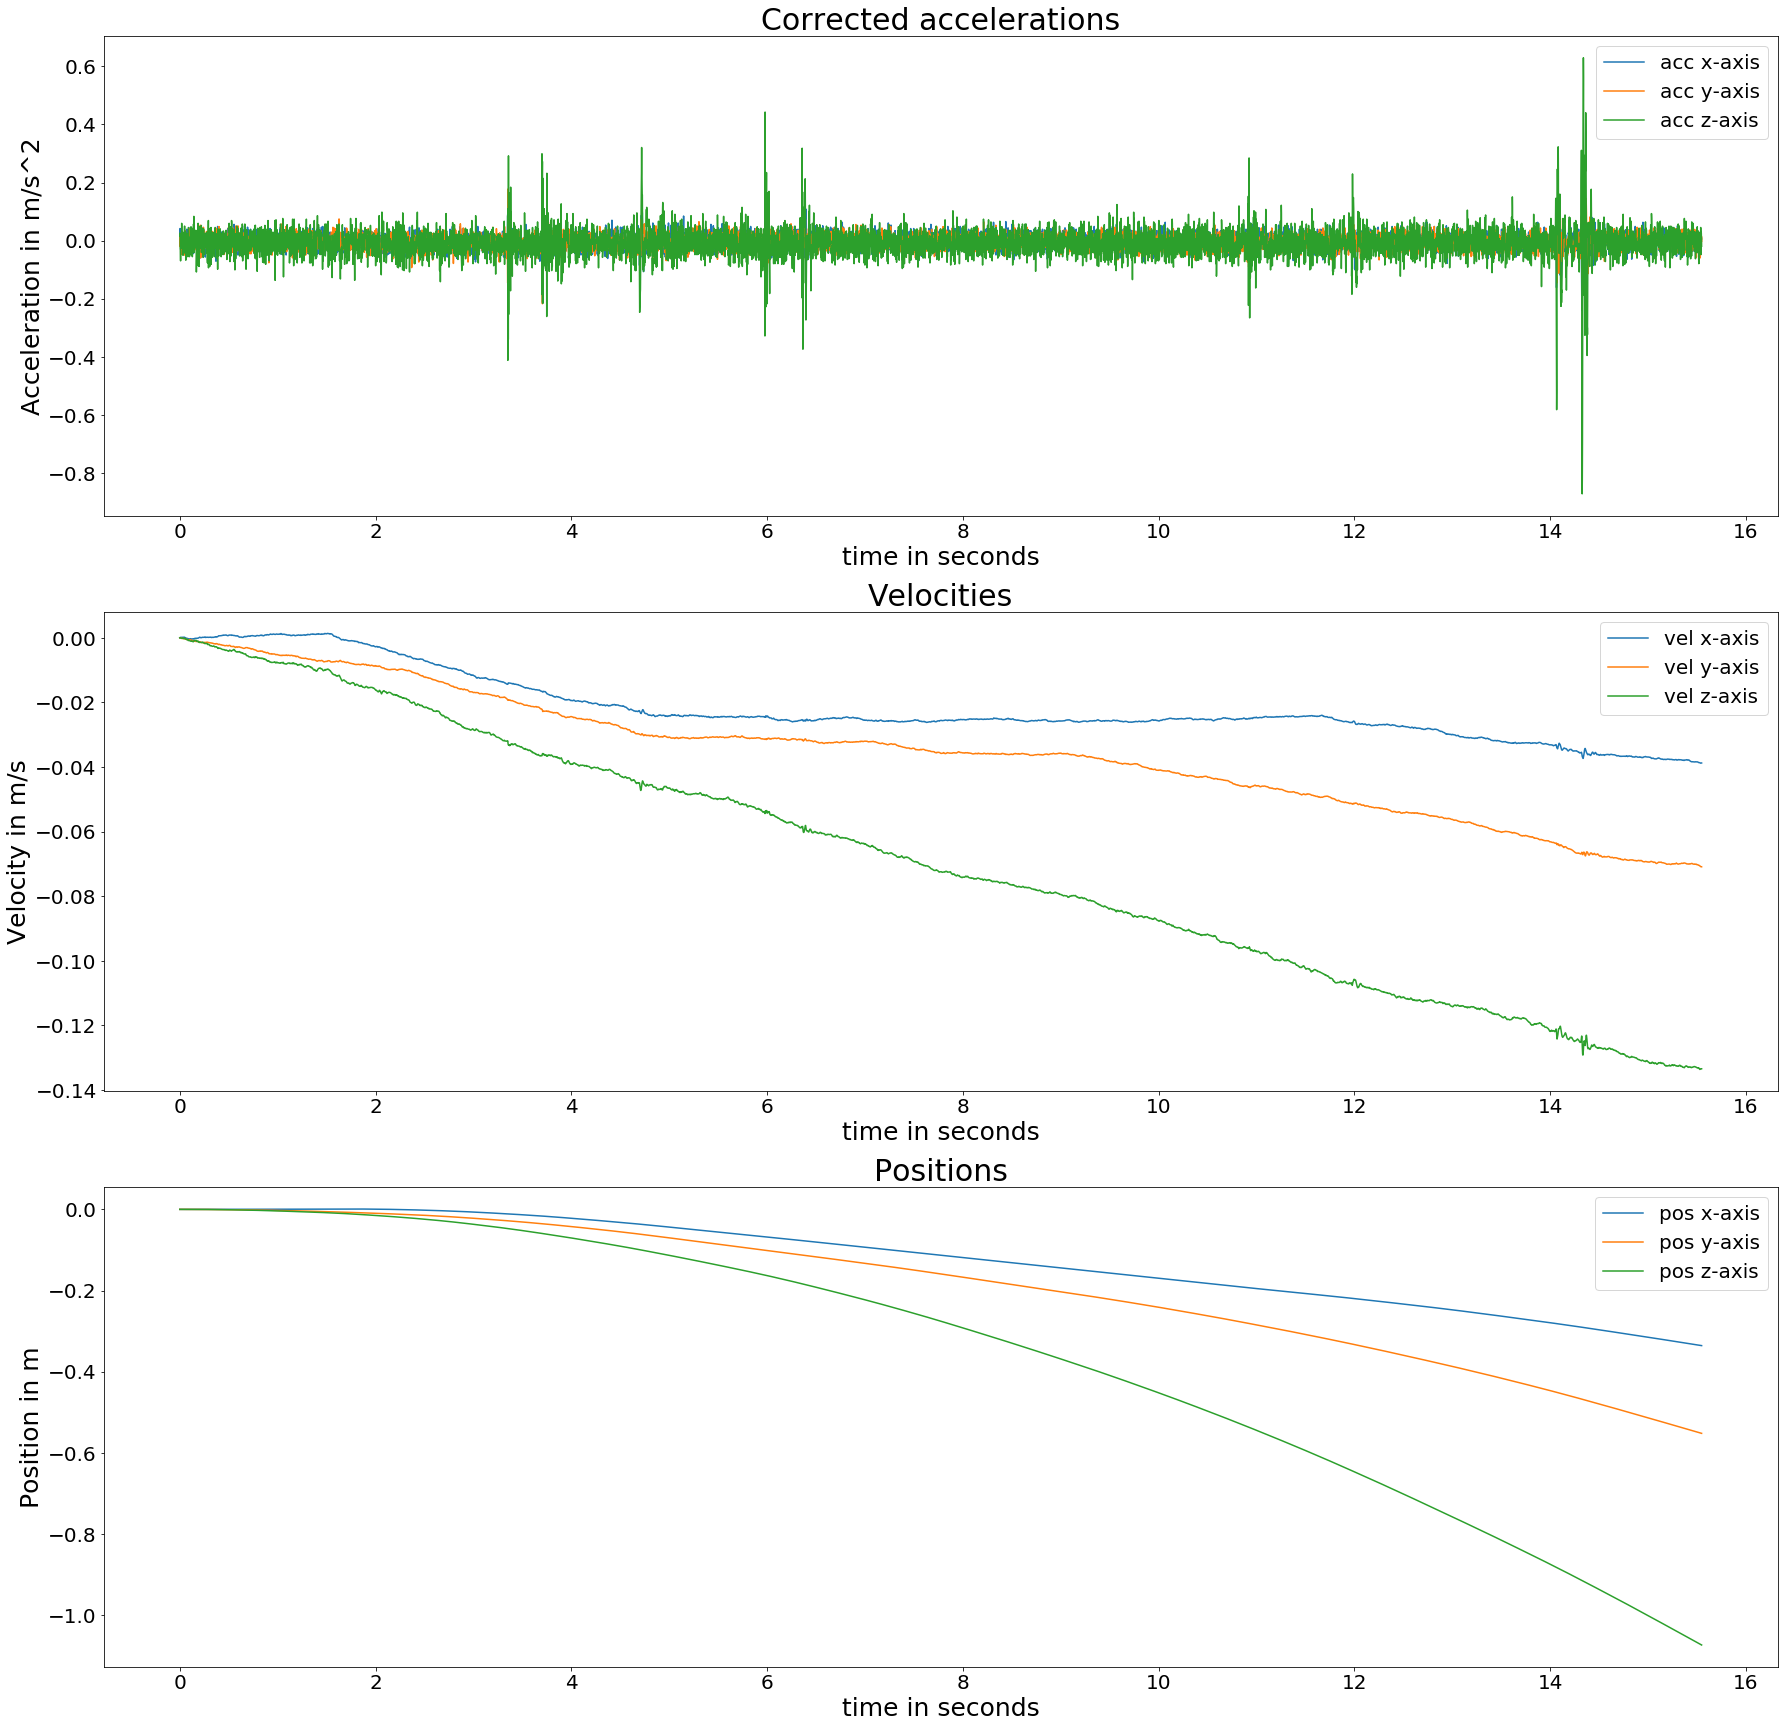

Run 2


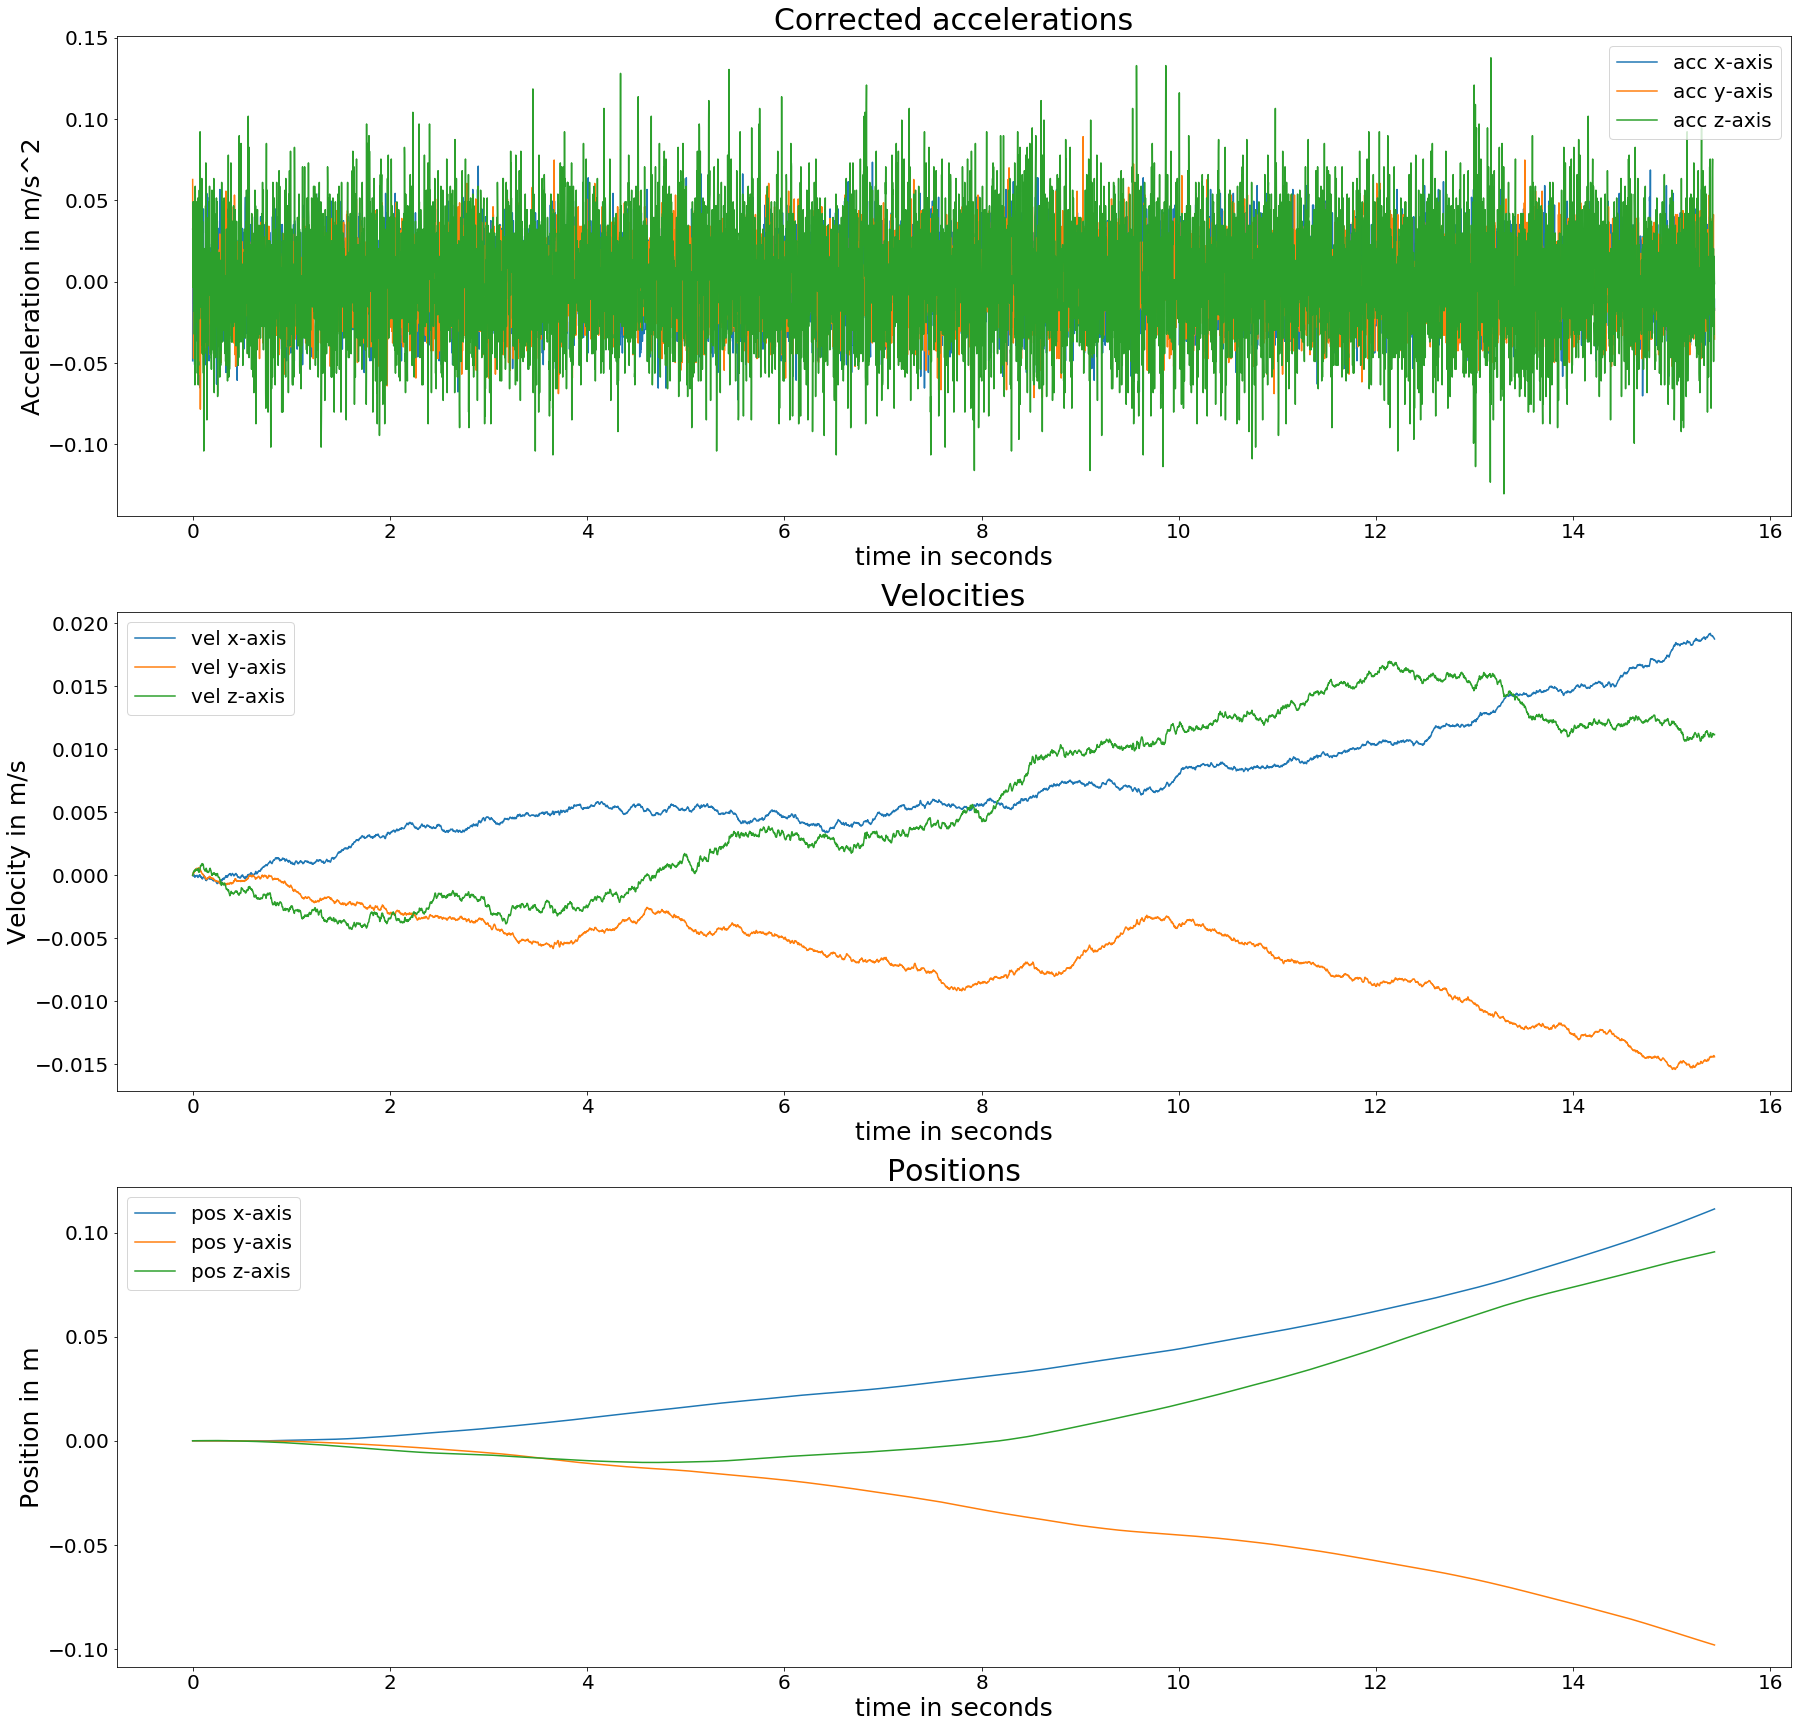

Run 3


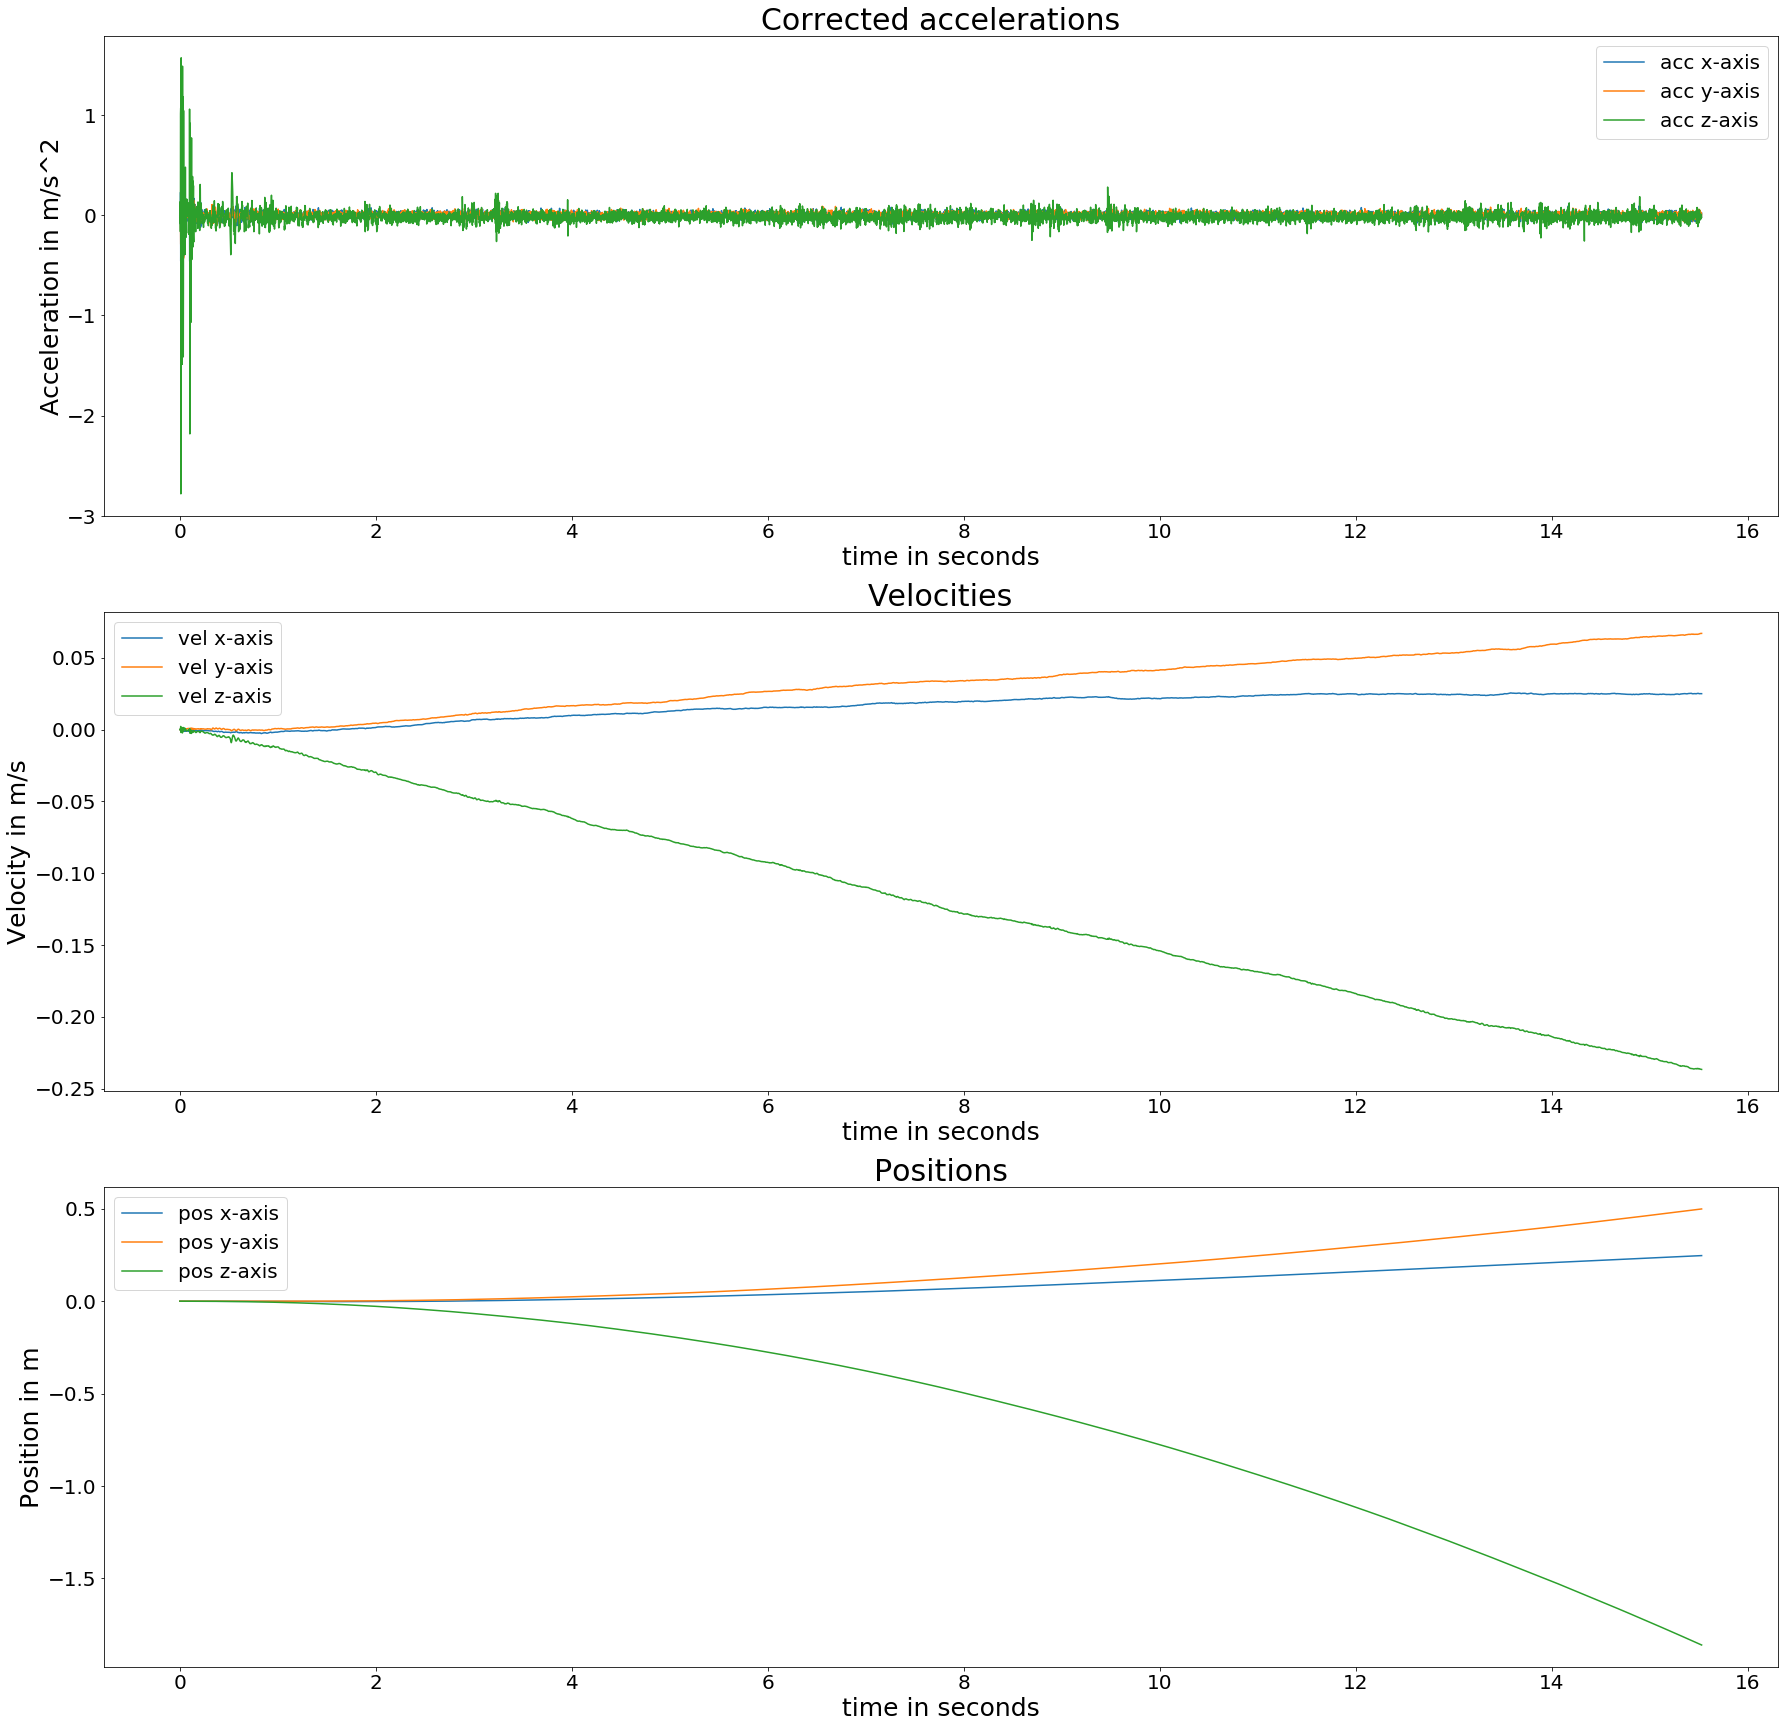

Run 4


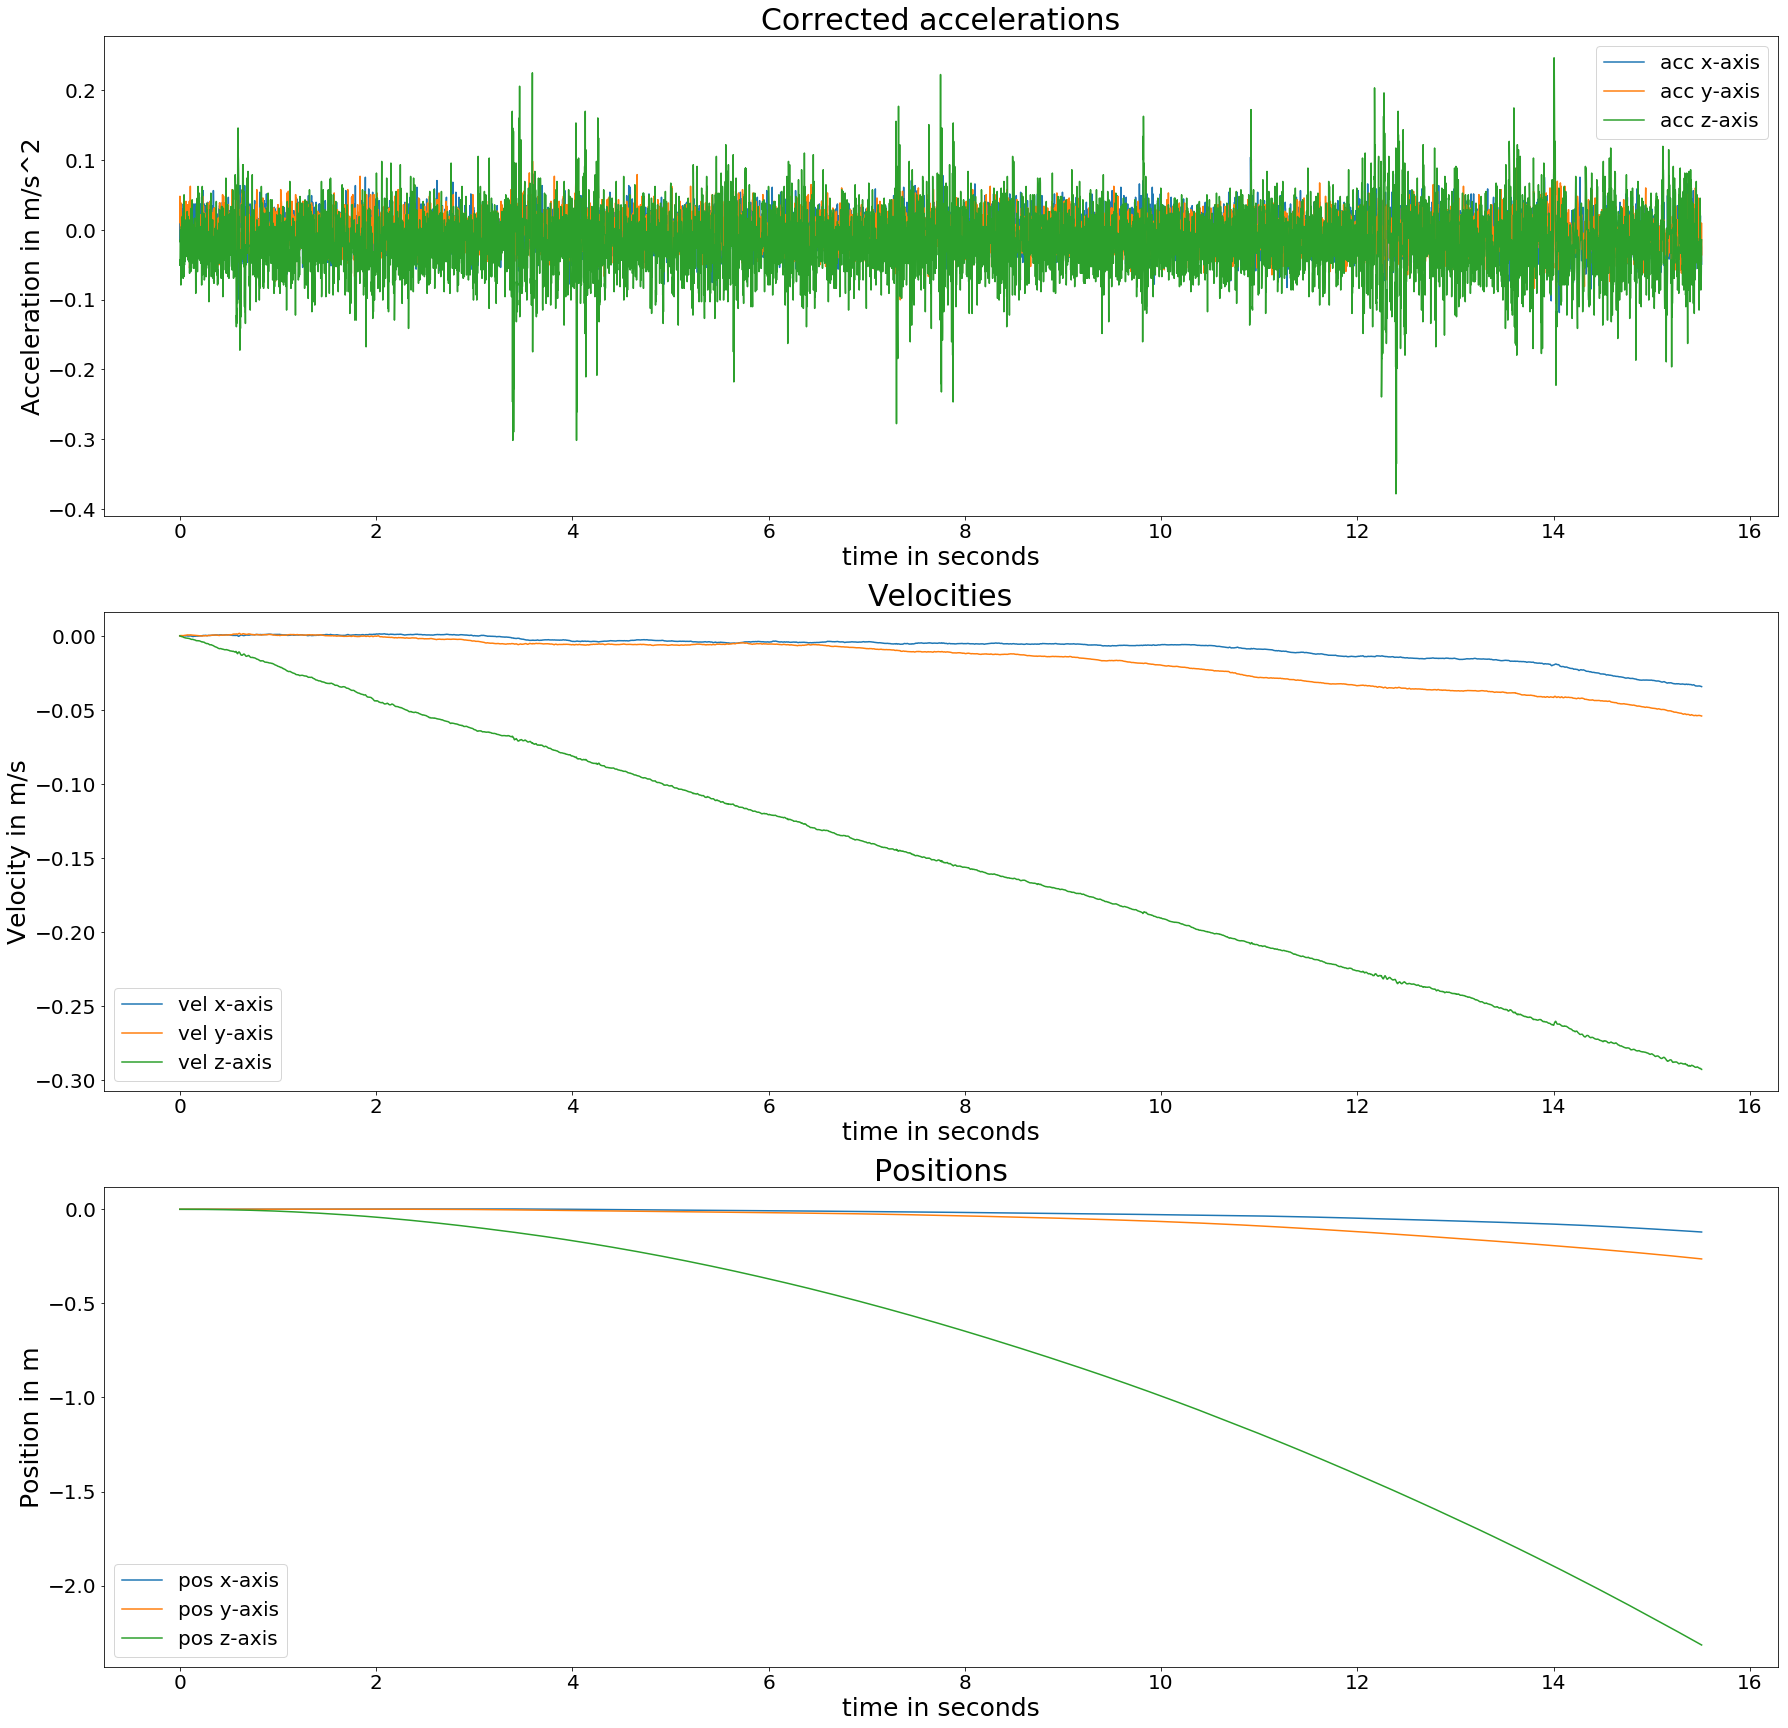

Run 5


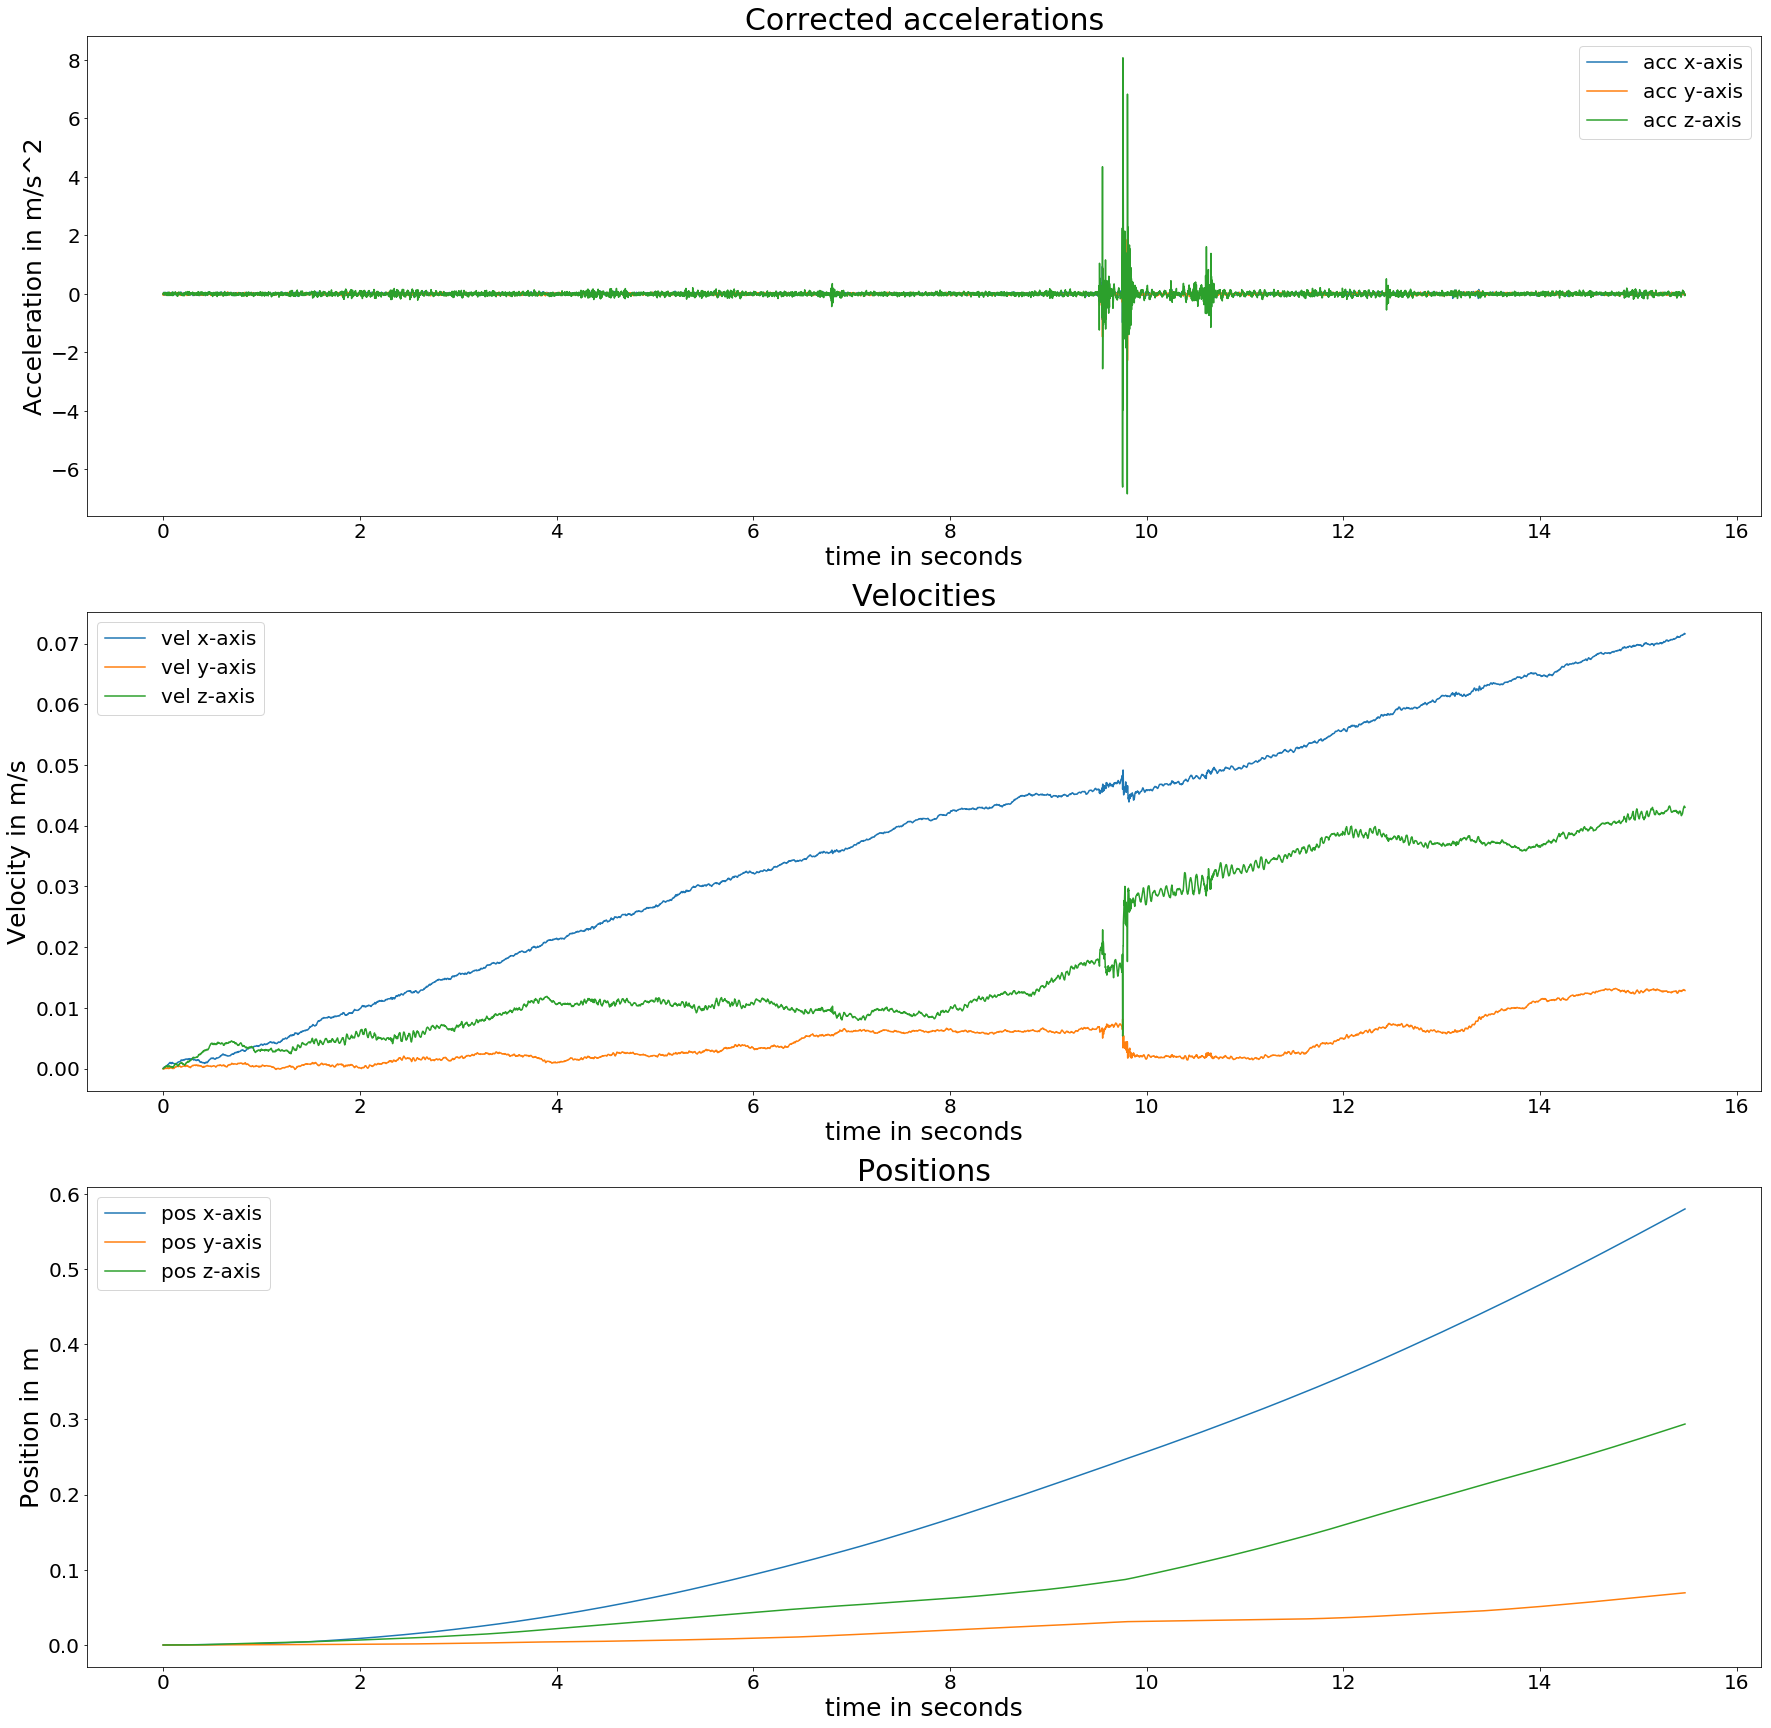

Avg. acceleration deviation: 0.025867 m/s^2
Avg. velocity deviation: 0.074984 m/s
Avg. position deviation: 0.567415 m

Orientation 2
Run 1


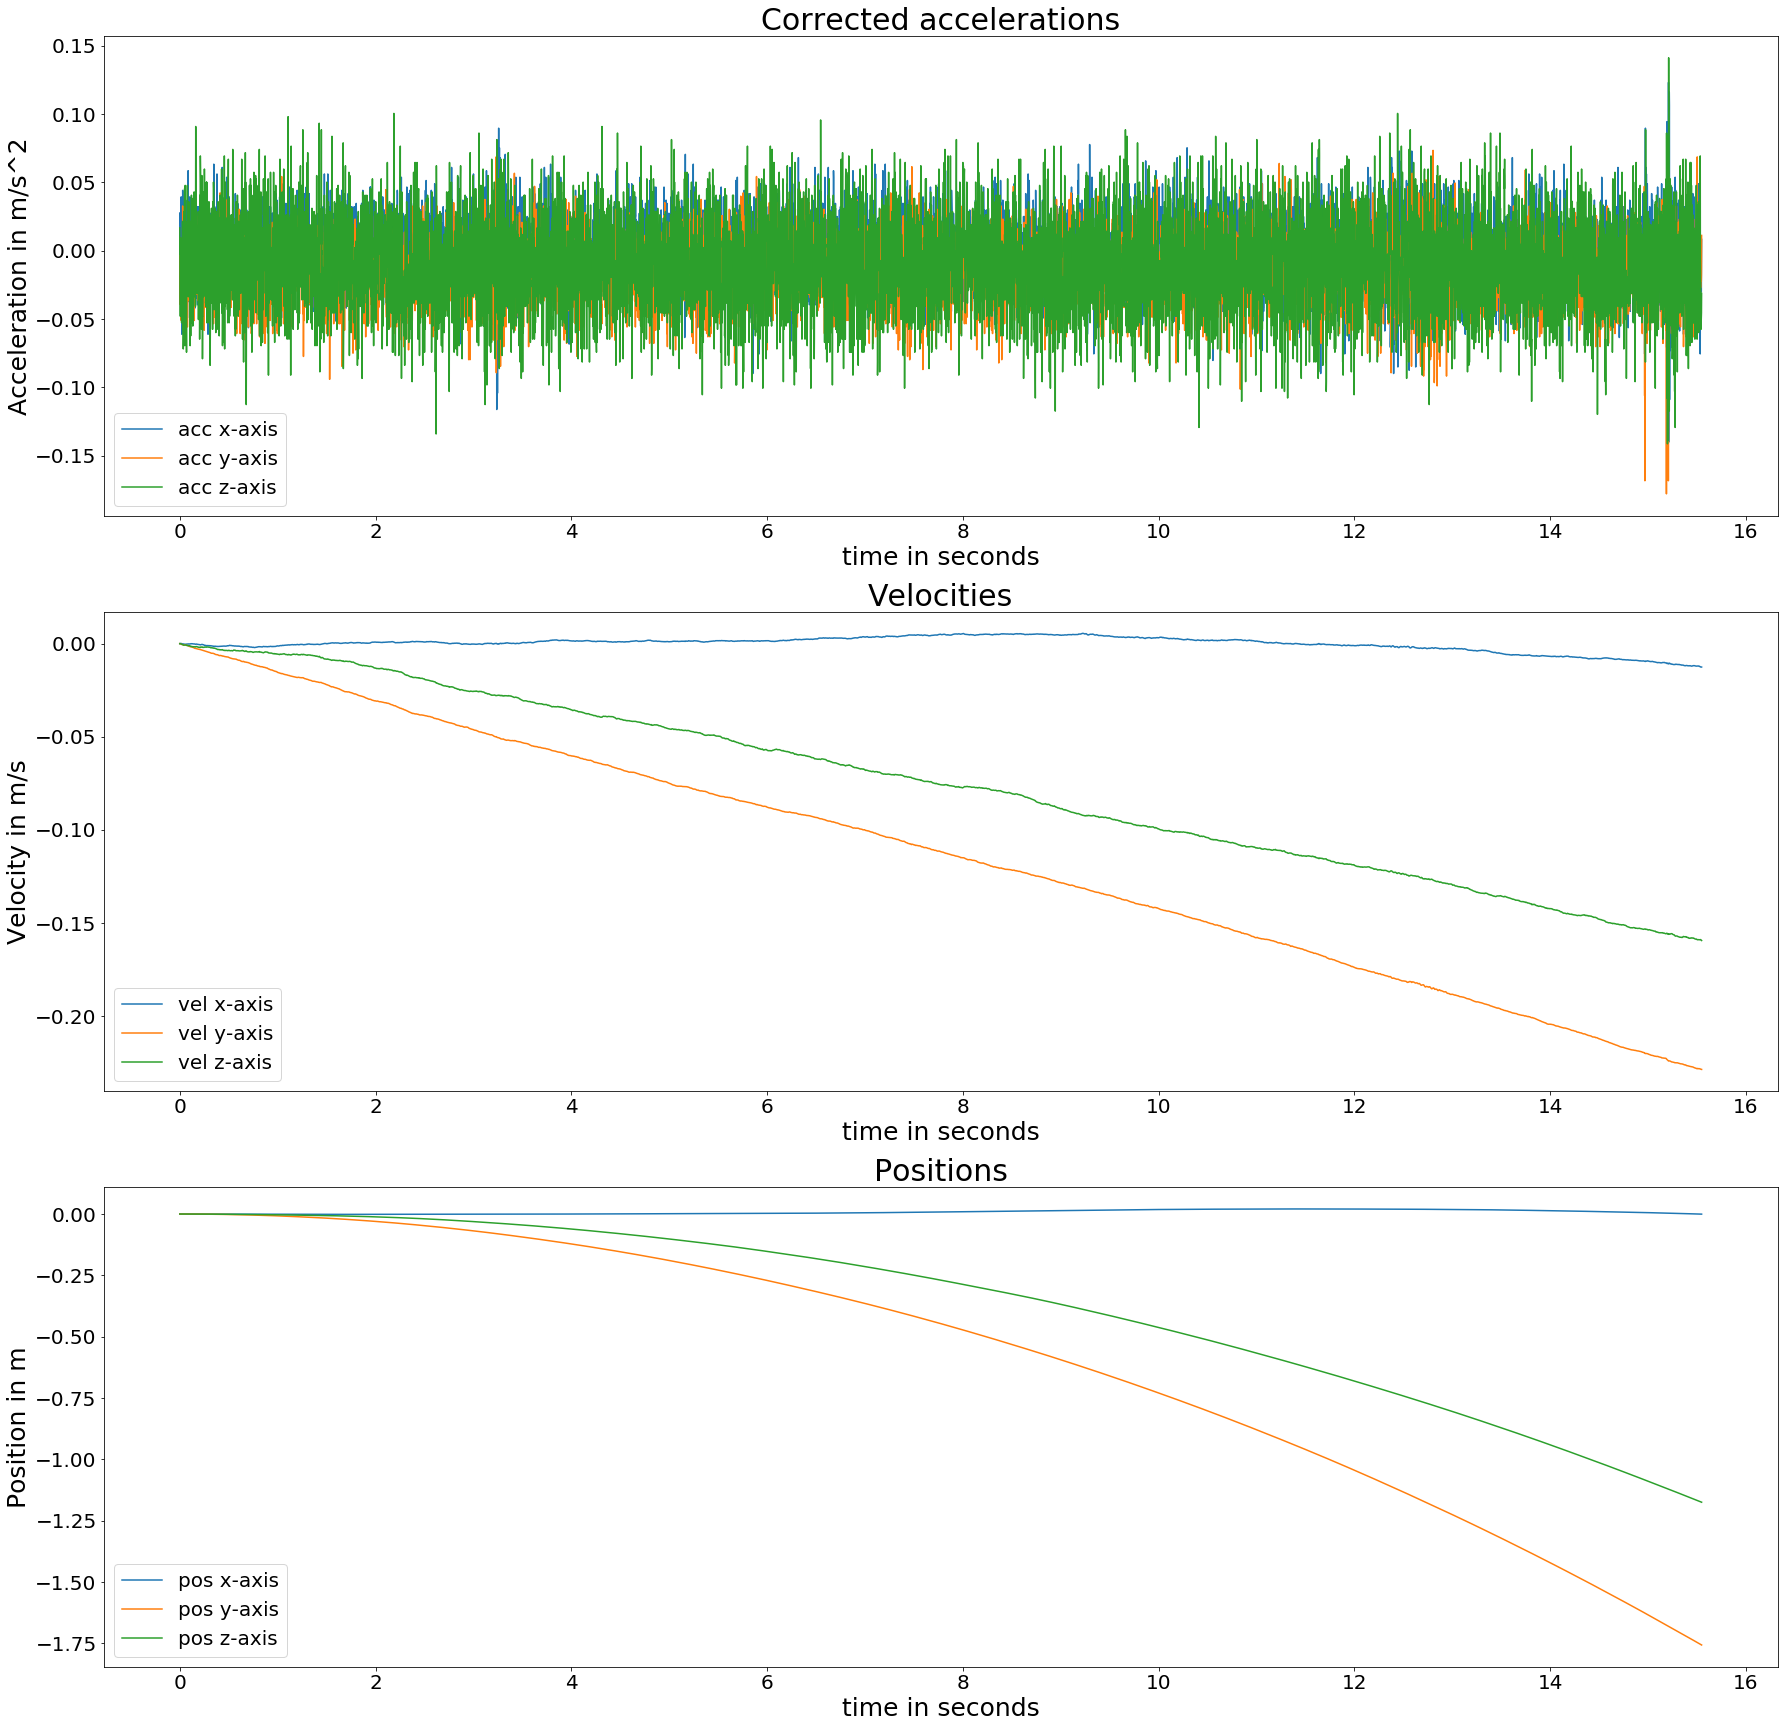

Run 2


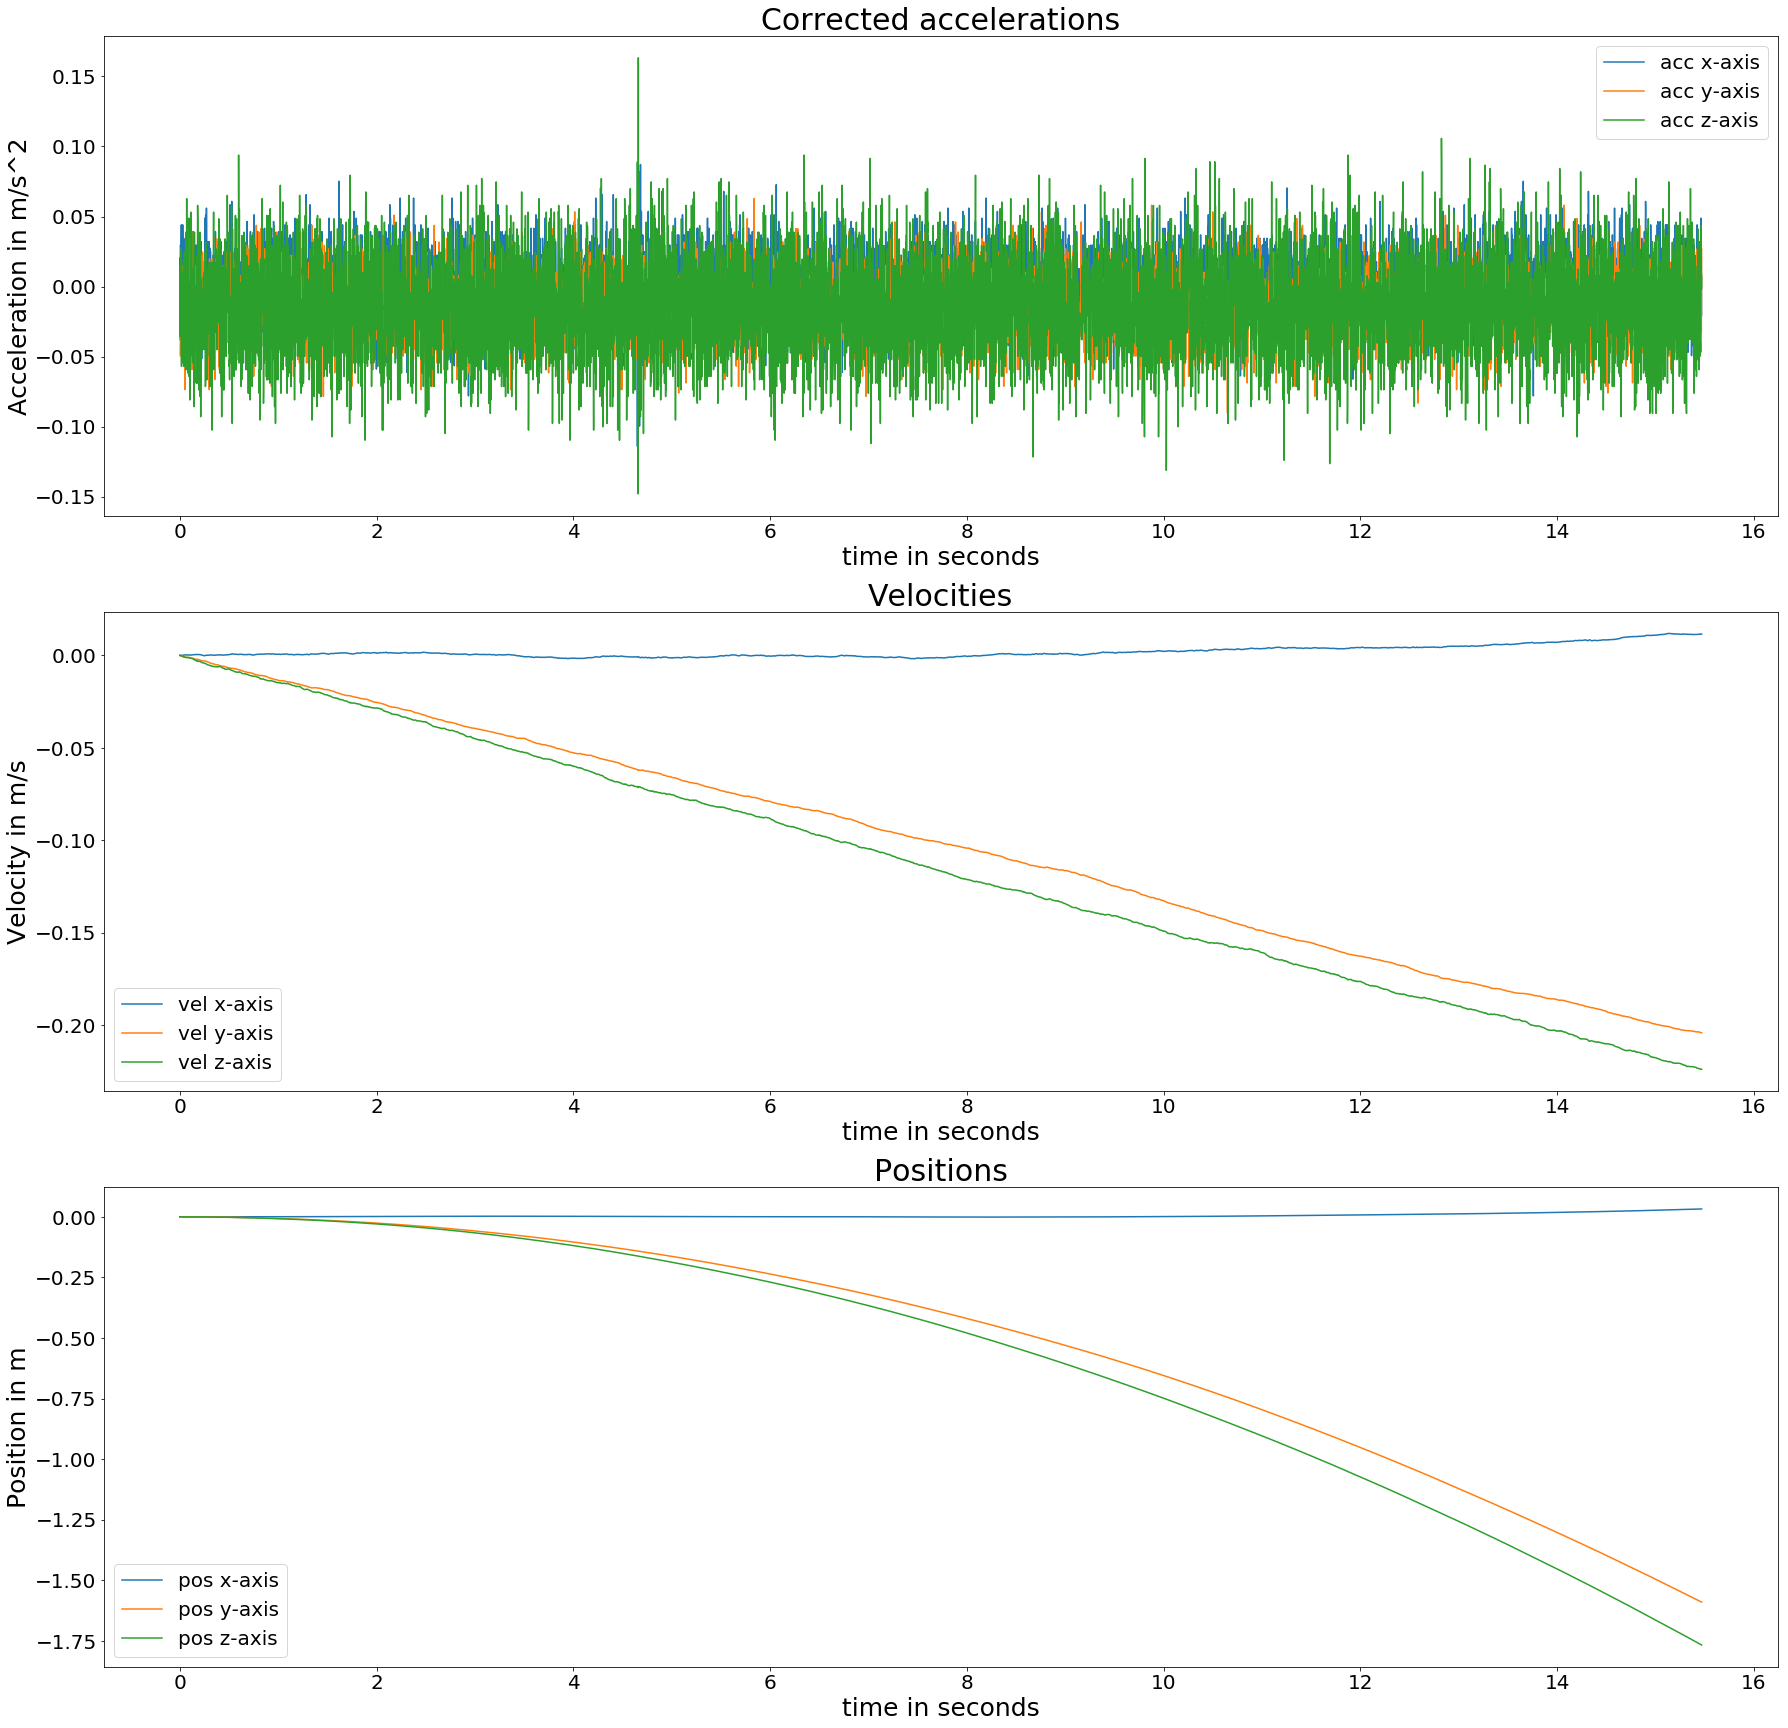

Run 3


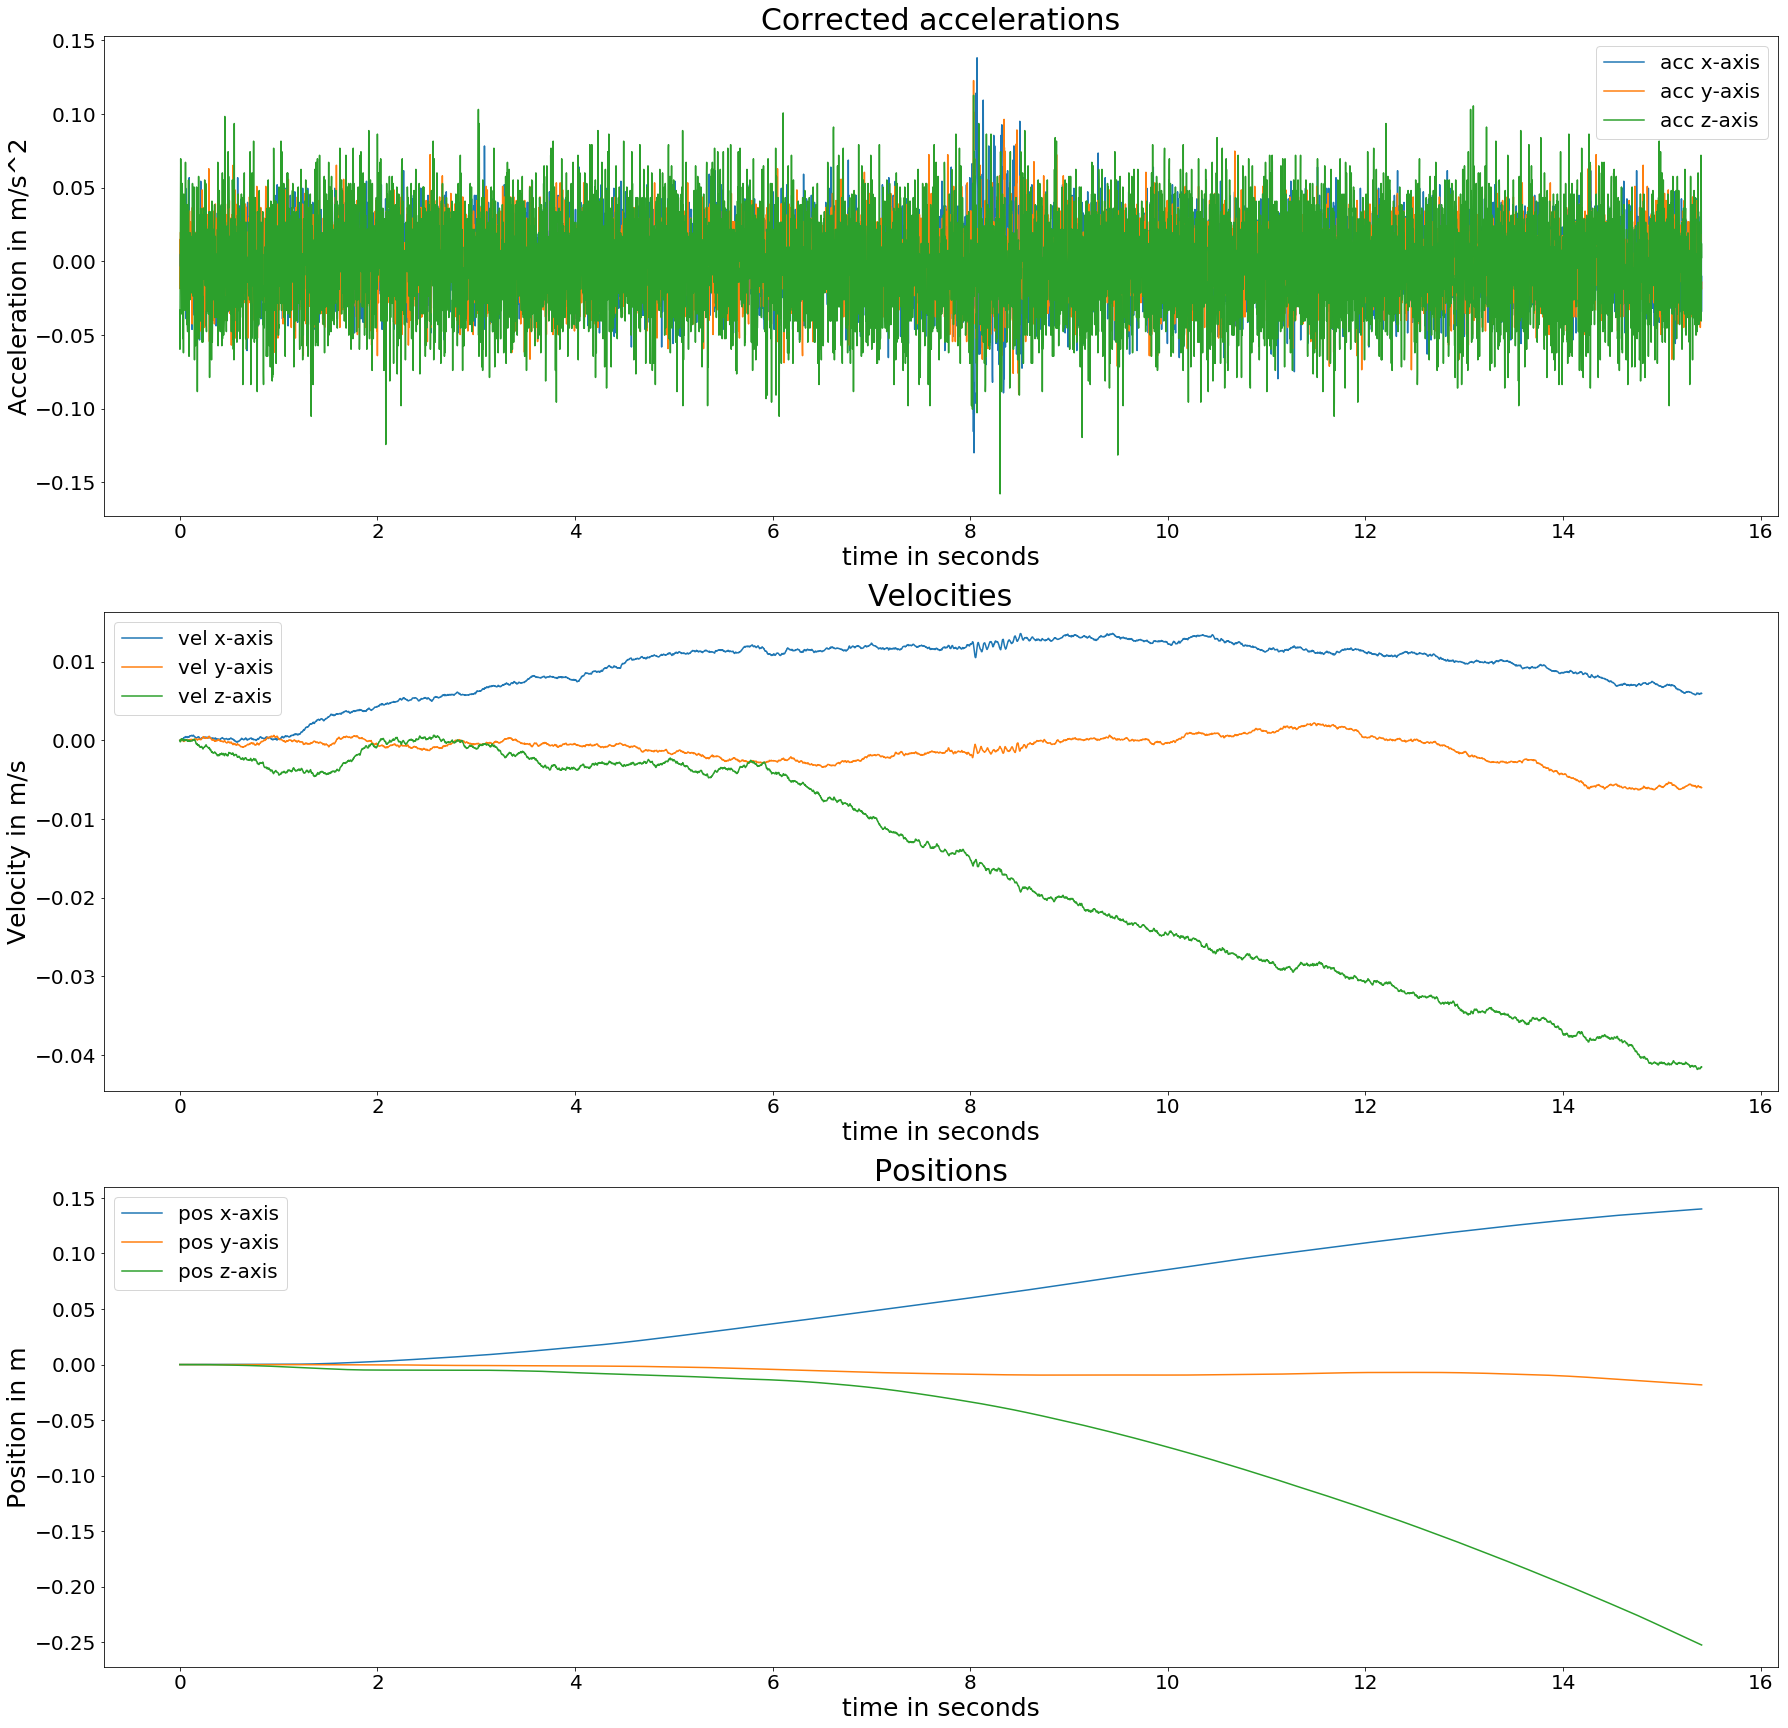

Run 4


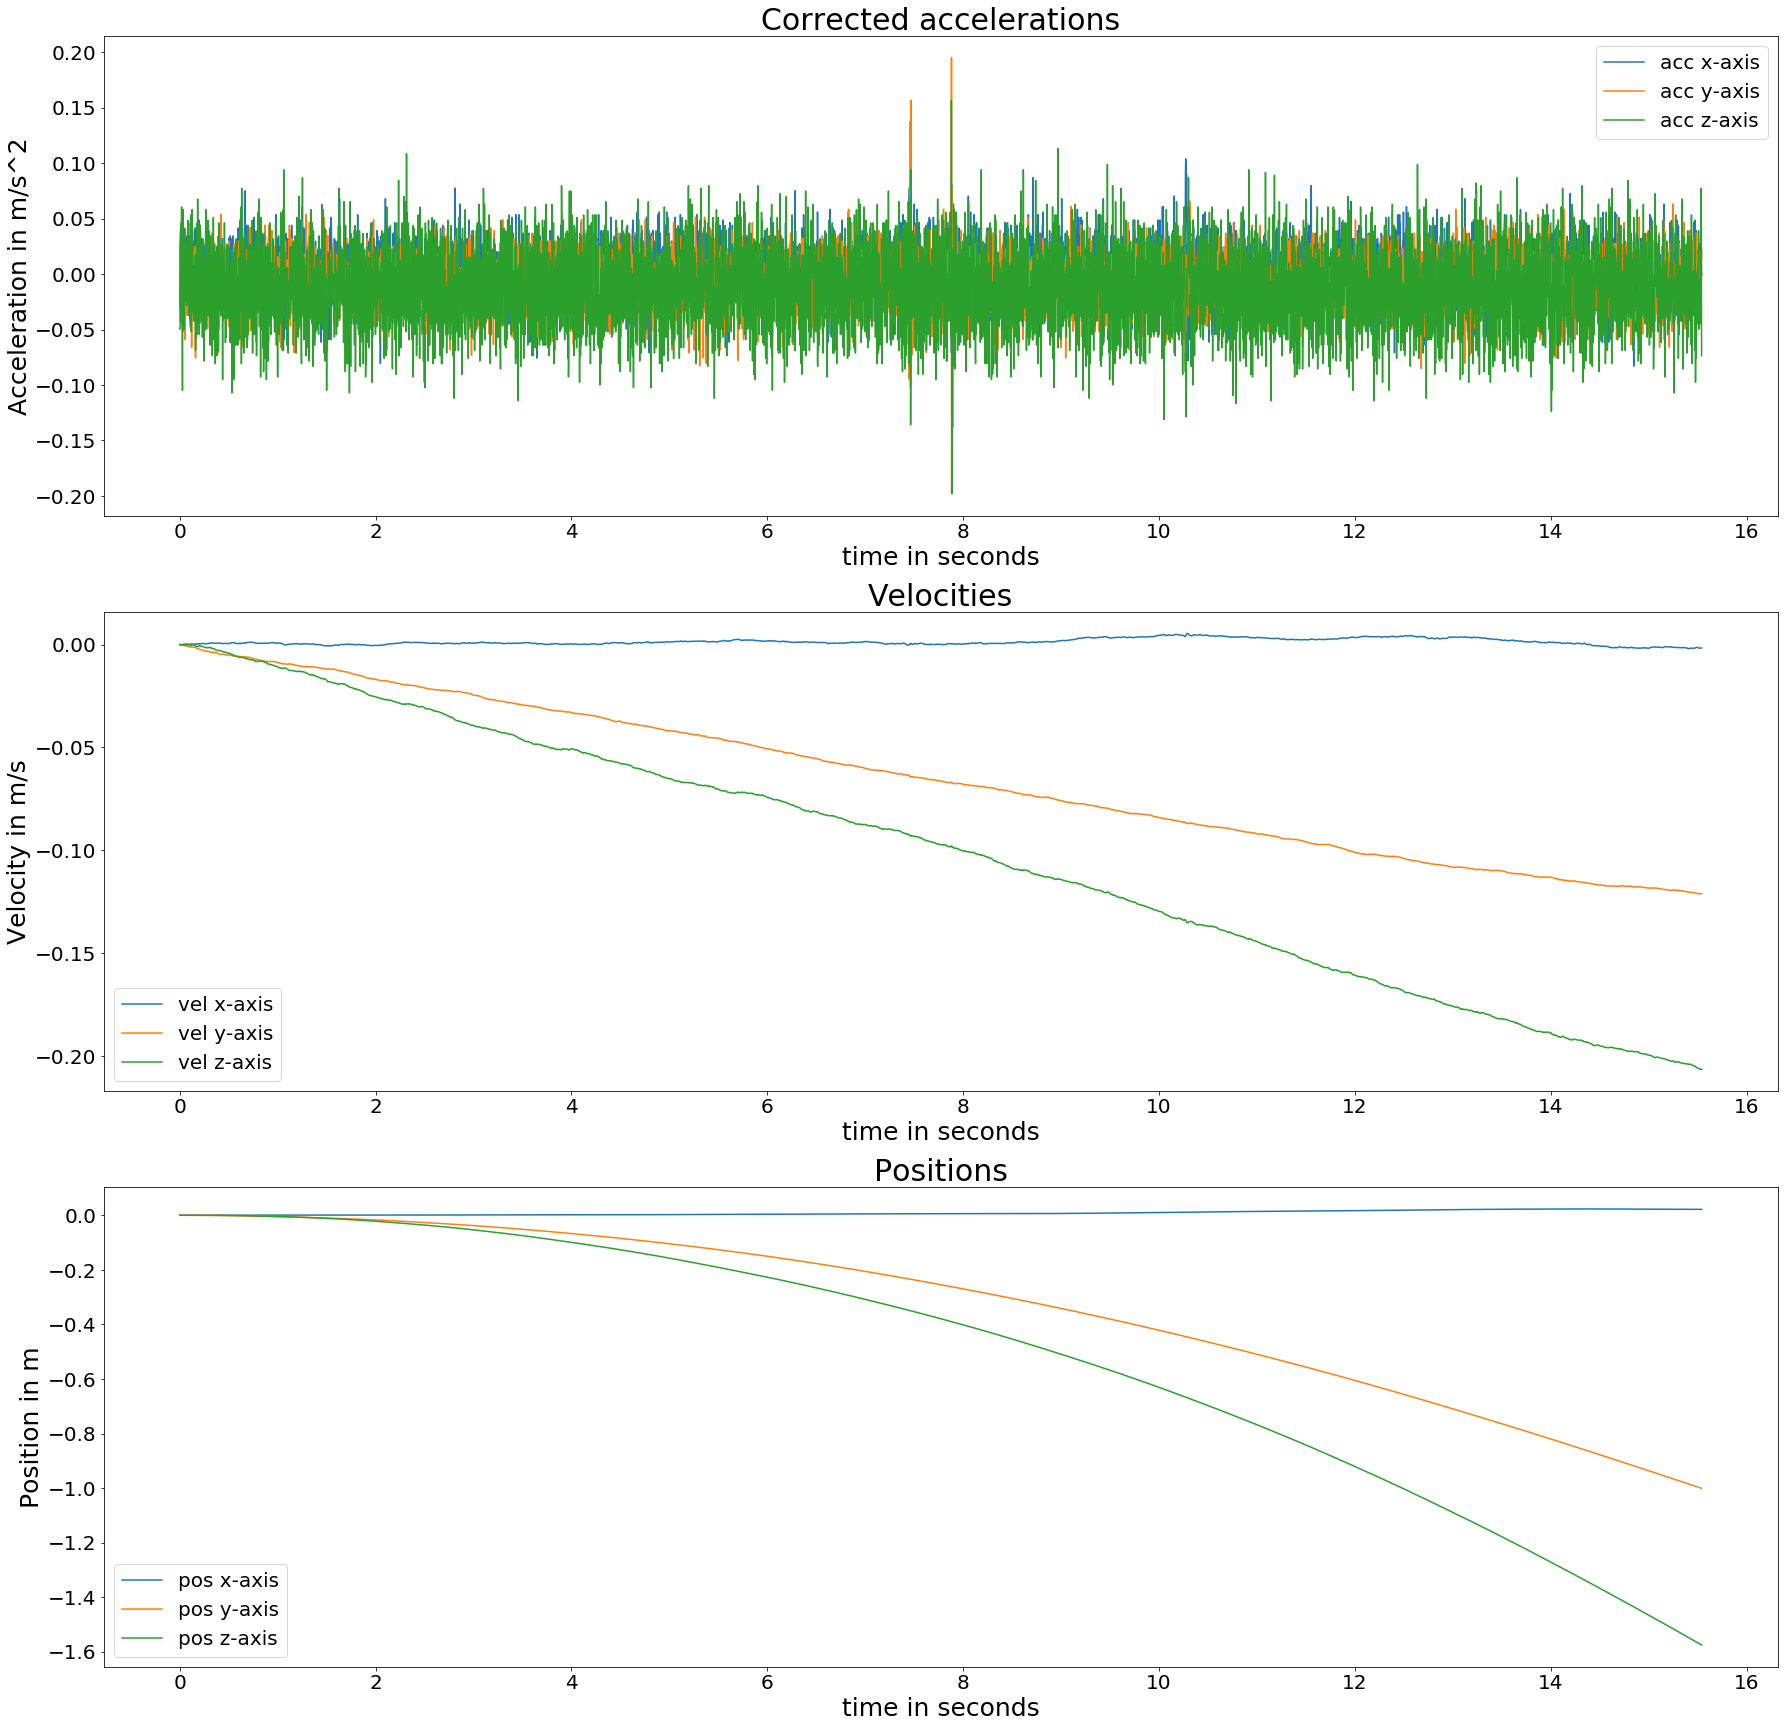

Run 5


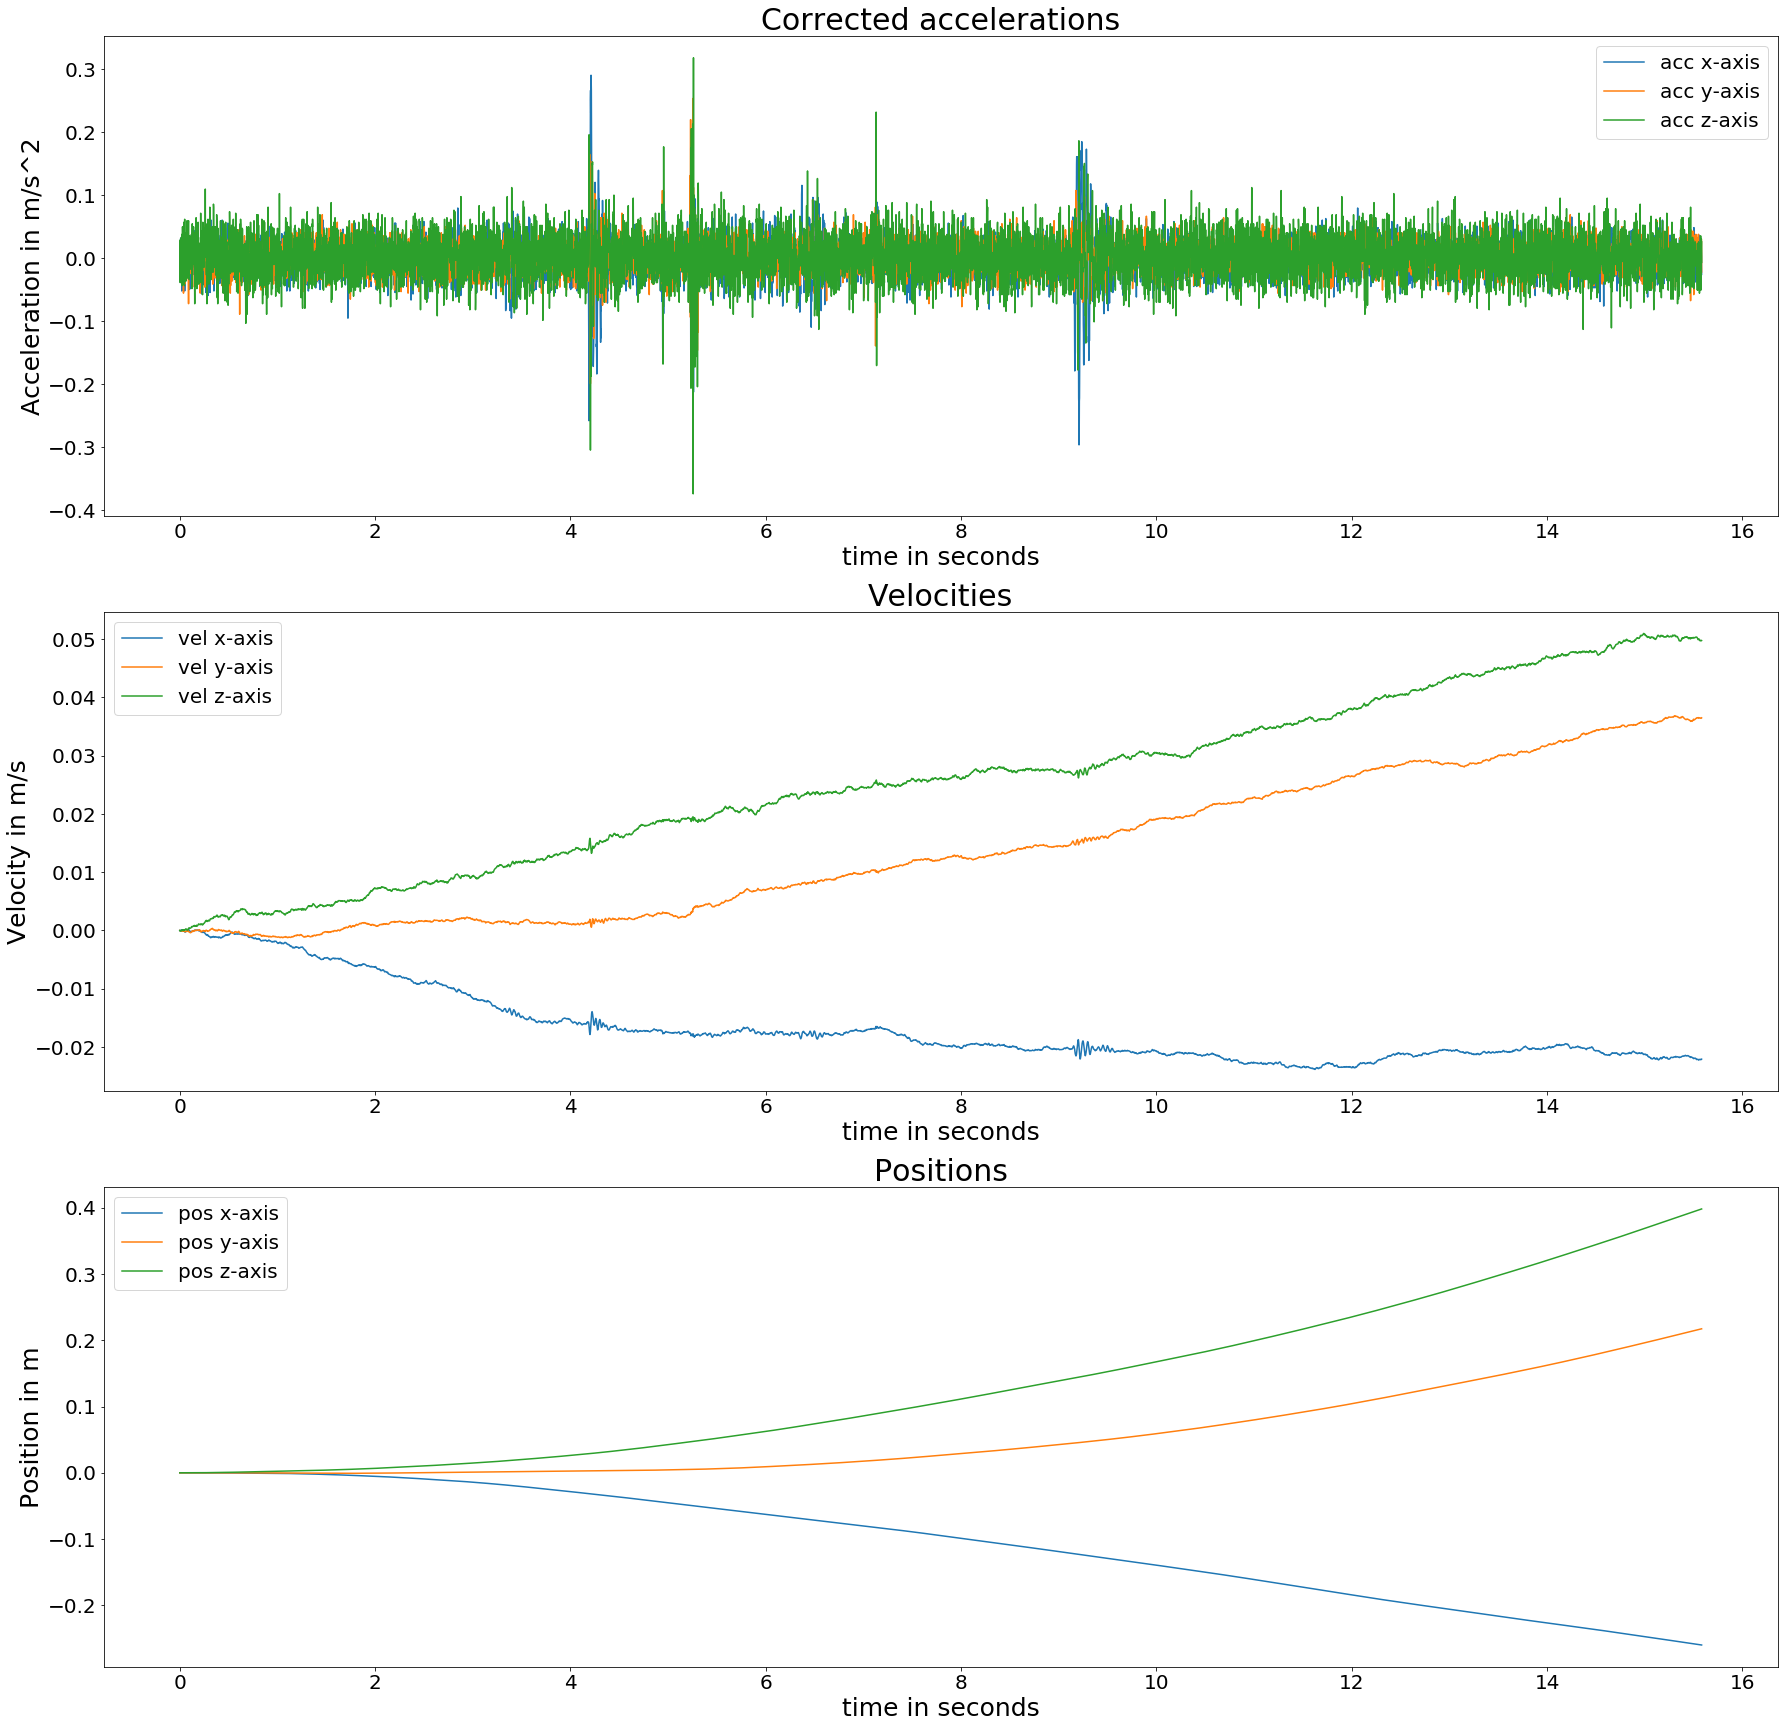

Avg. acceleration deviation: 0.021056 m/s^2
Avg. velocity deviation: 0.088757 m/s
Avg. position deviation: 0.680462 m

Orientation 3
Run 1


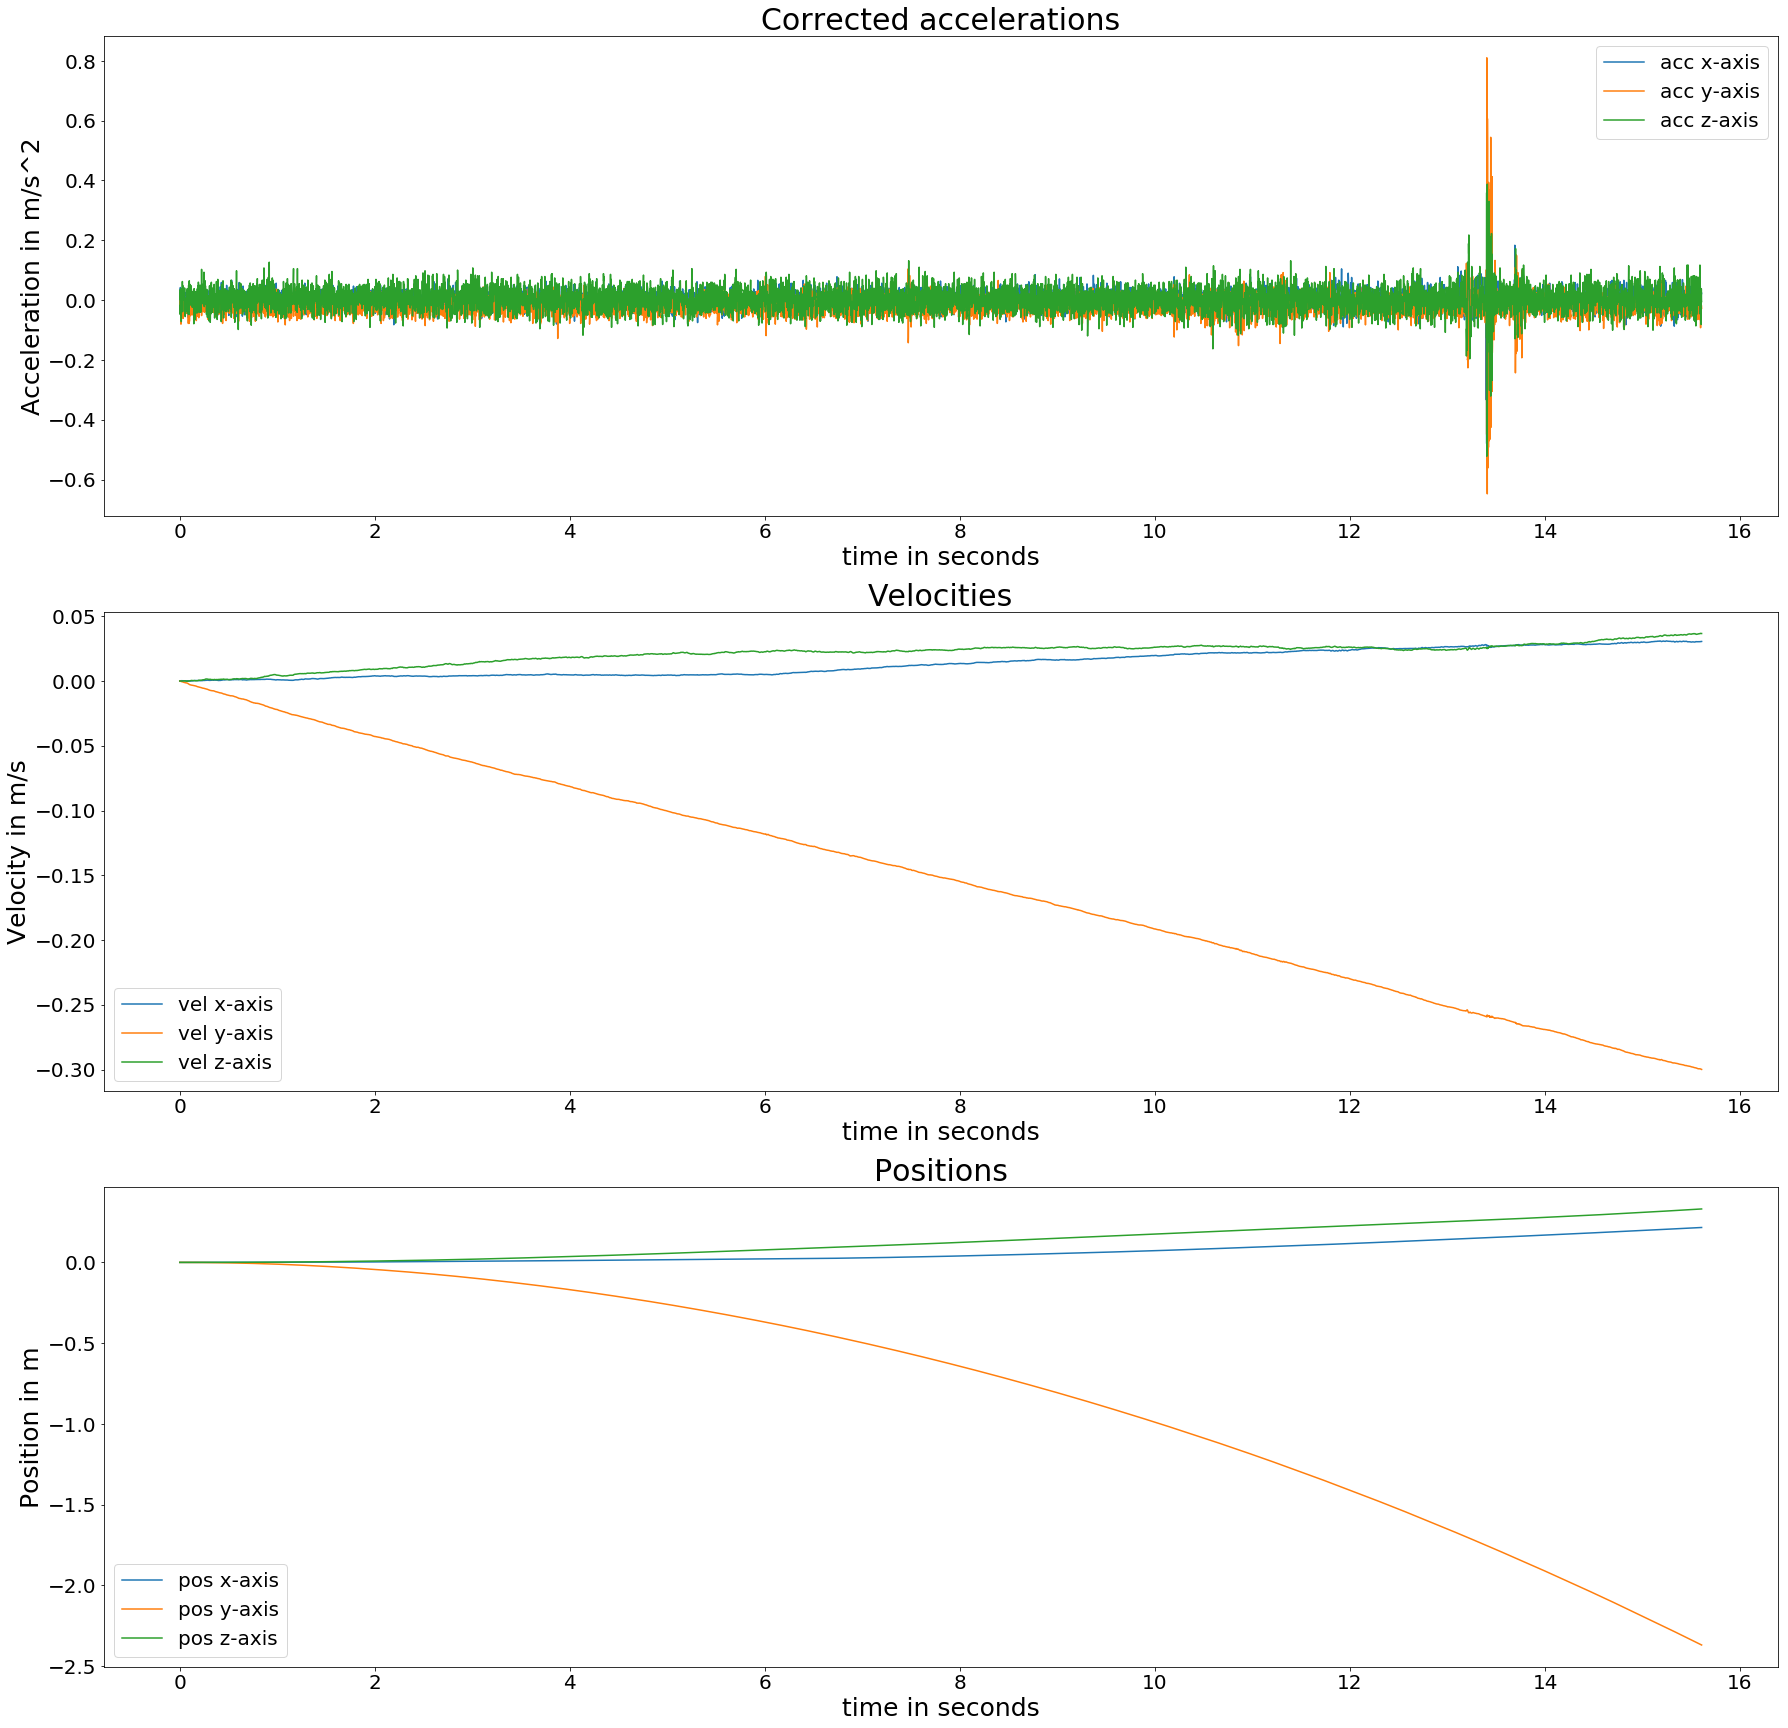

Run 2


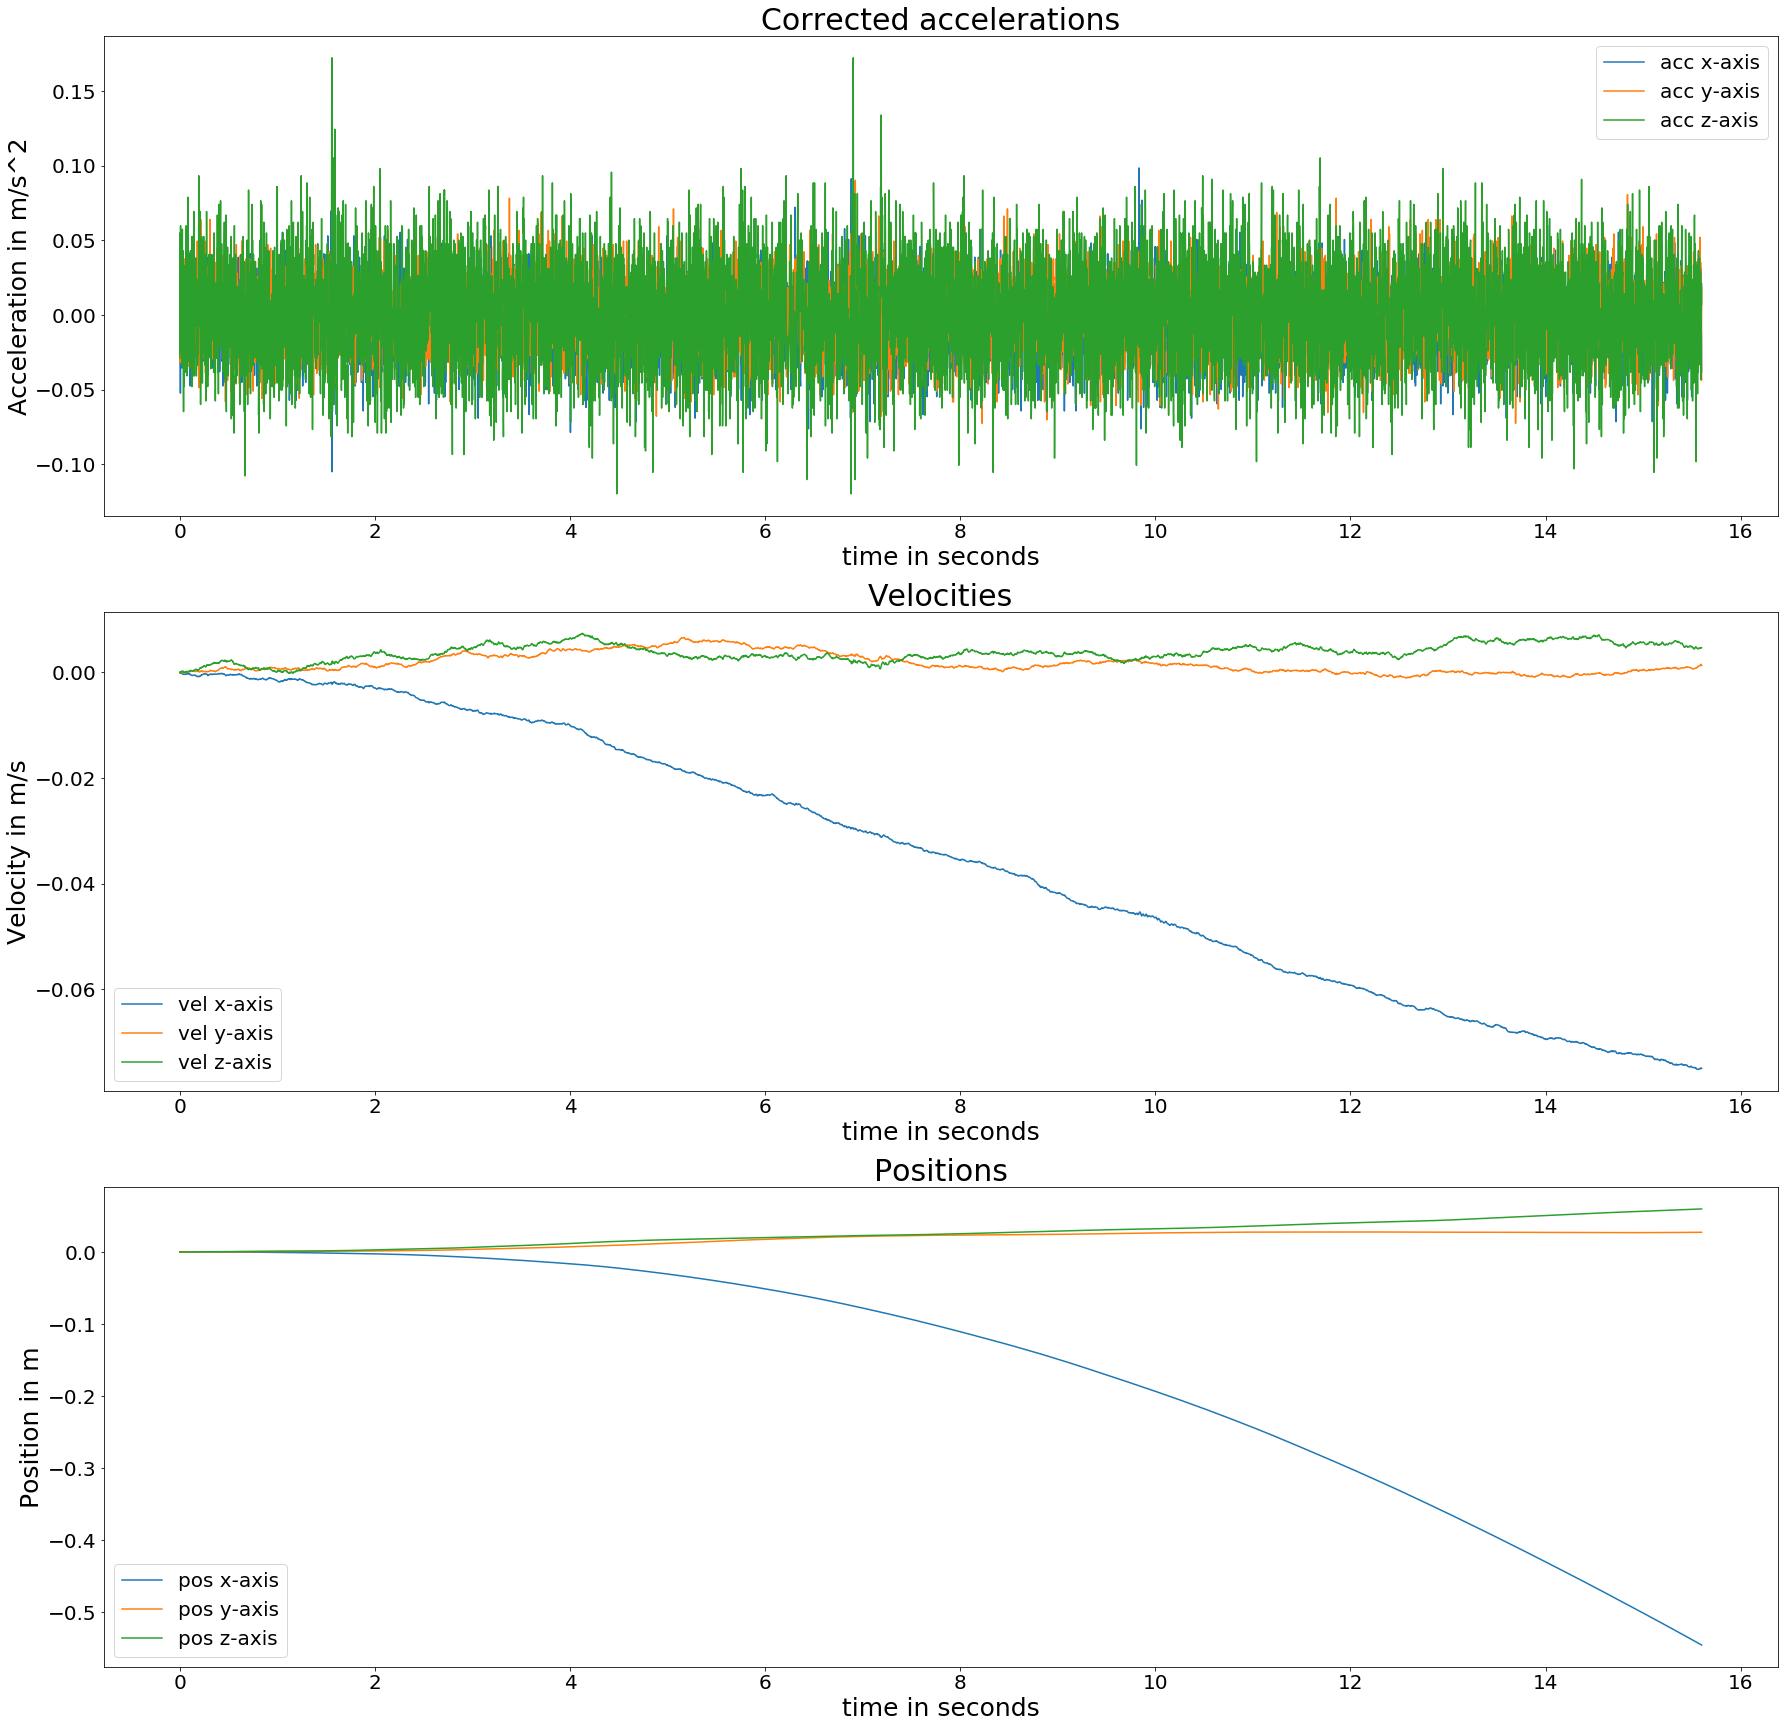

Run 3


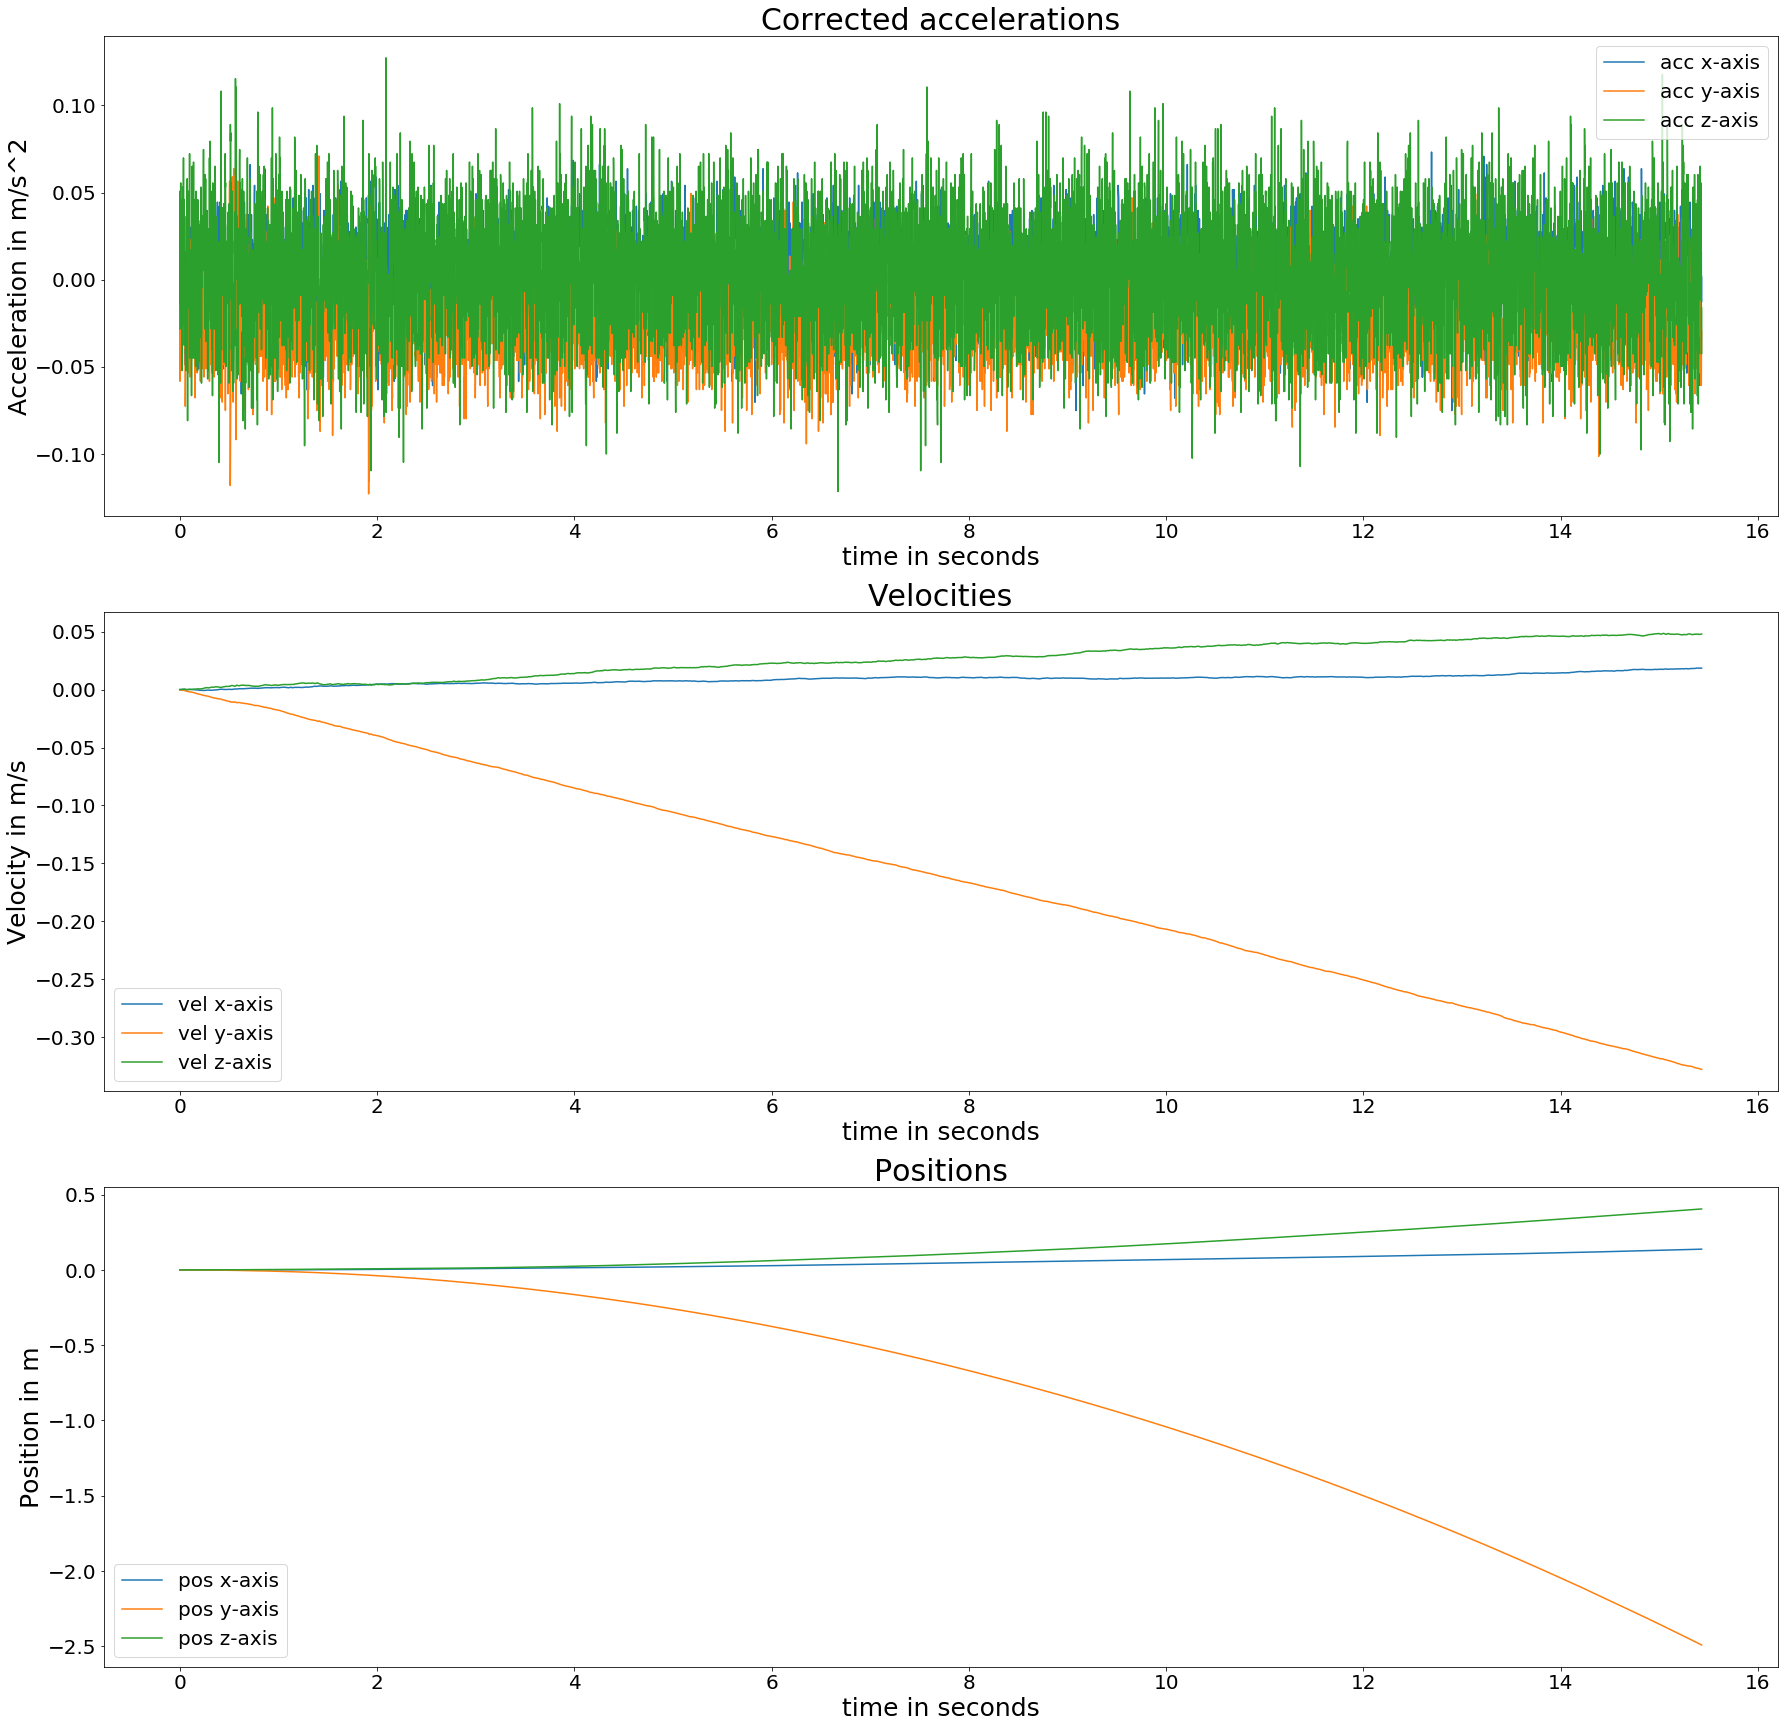

Run 4


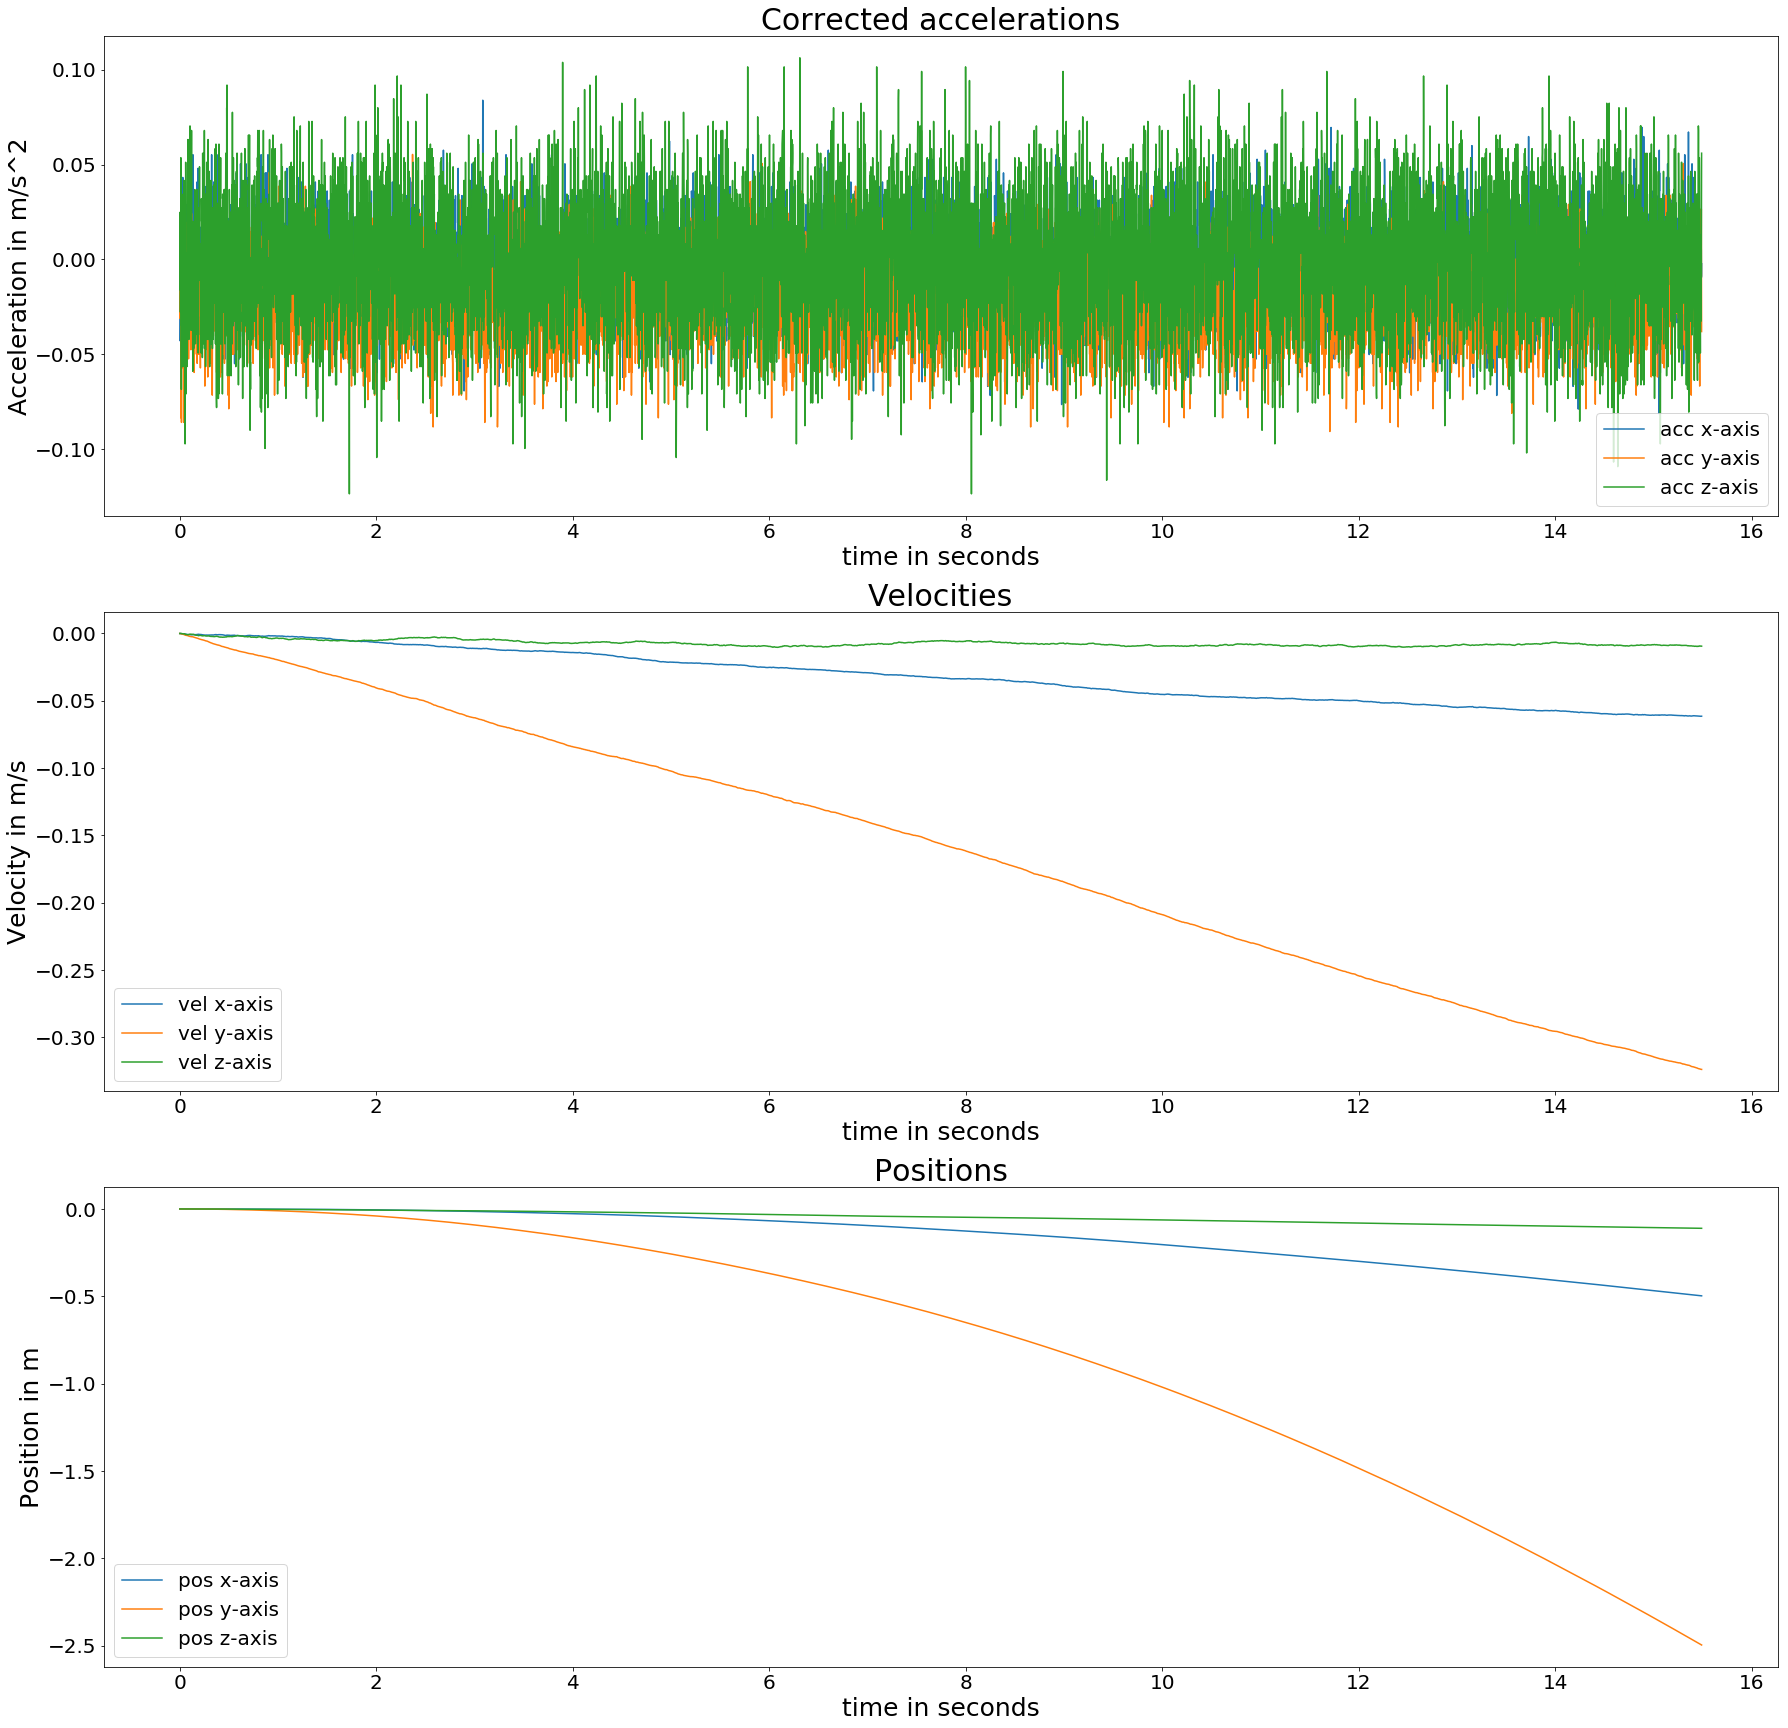

Run 5


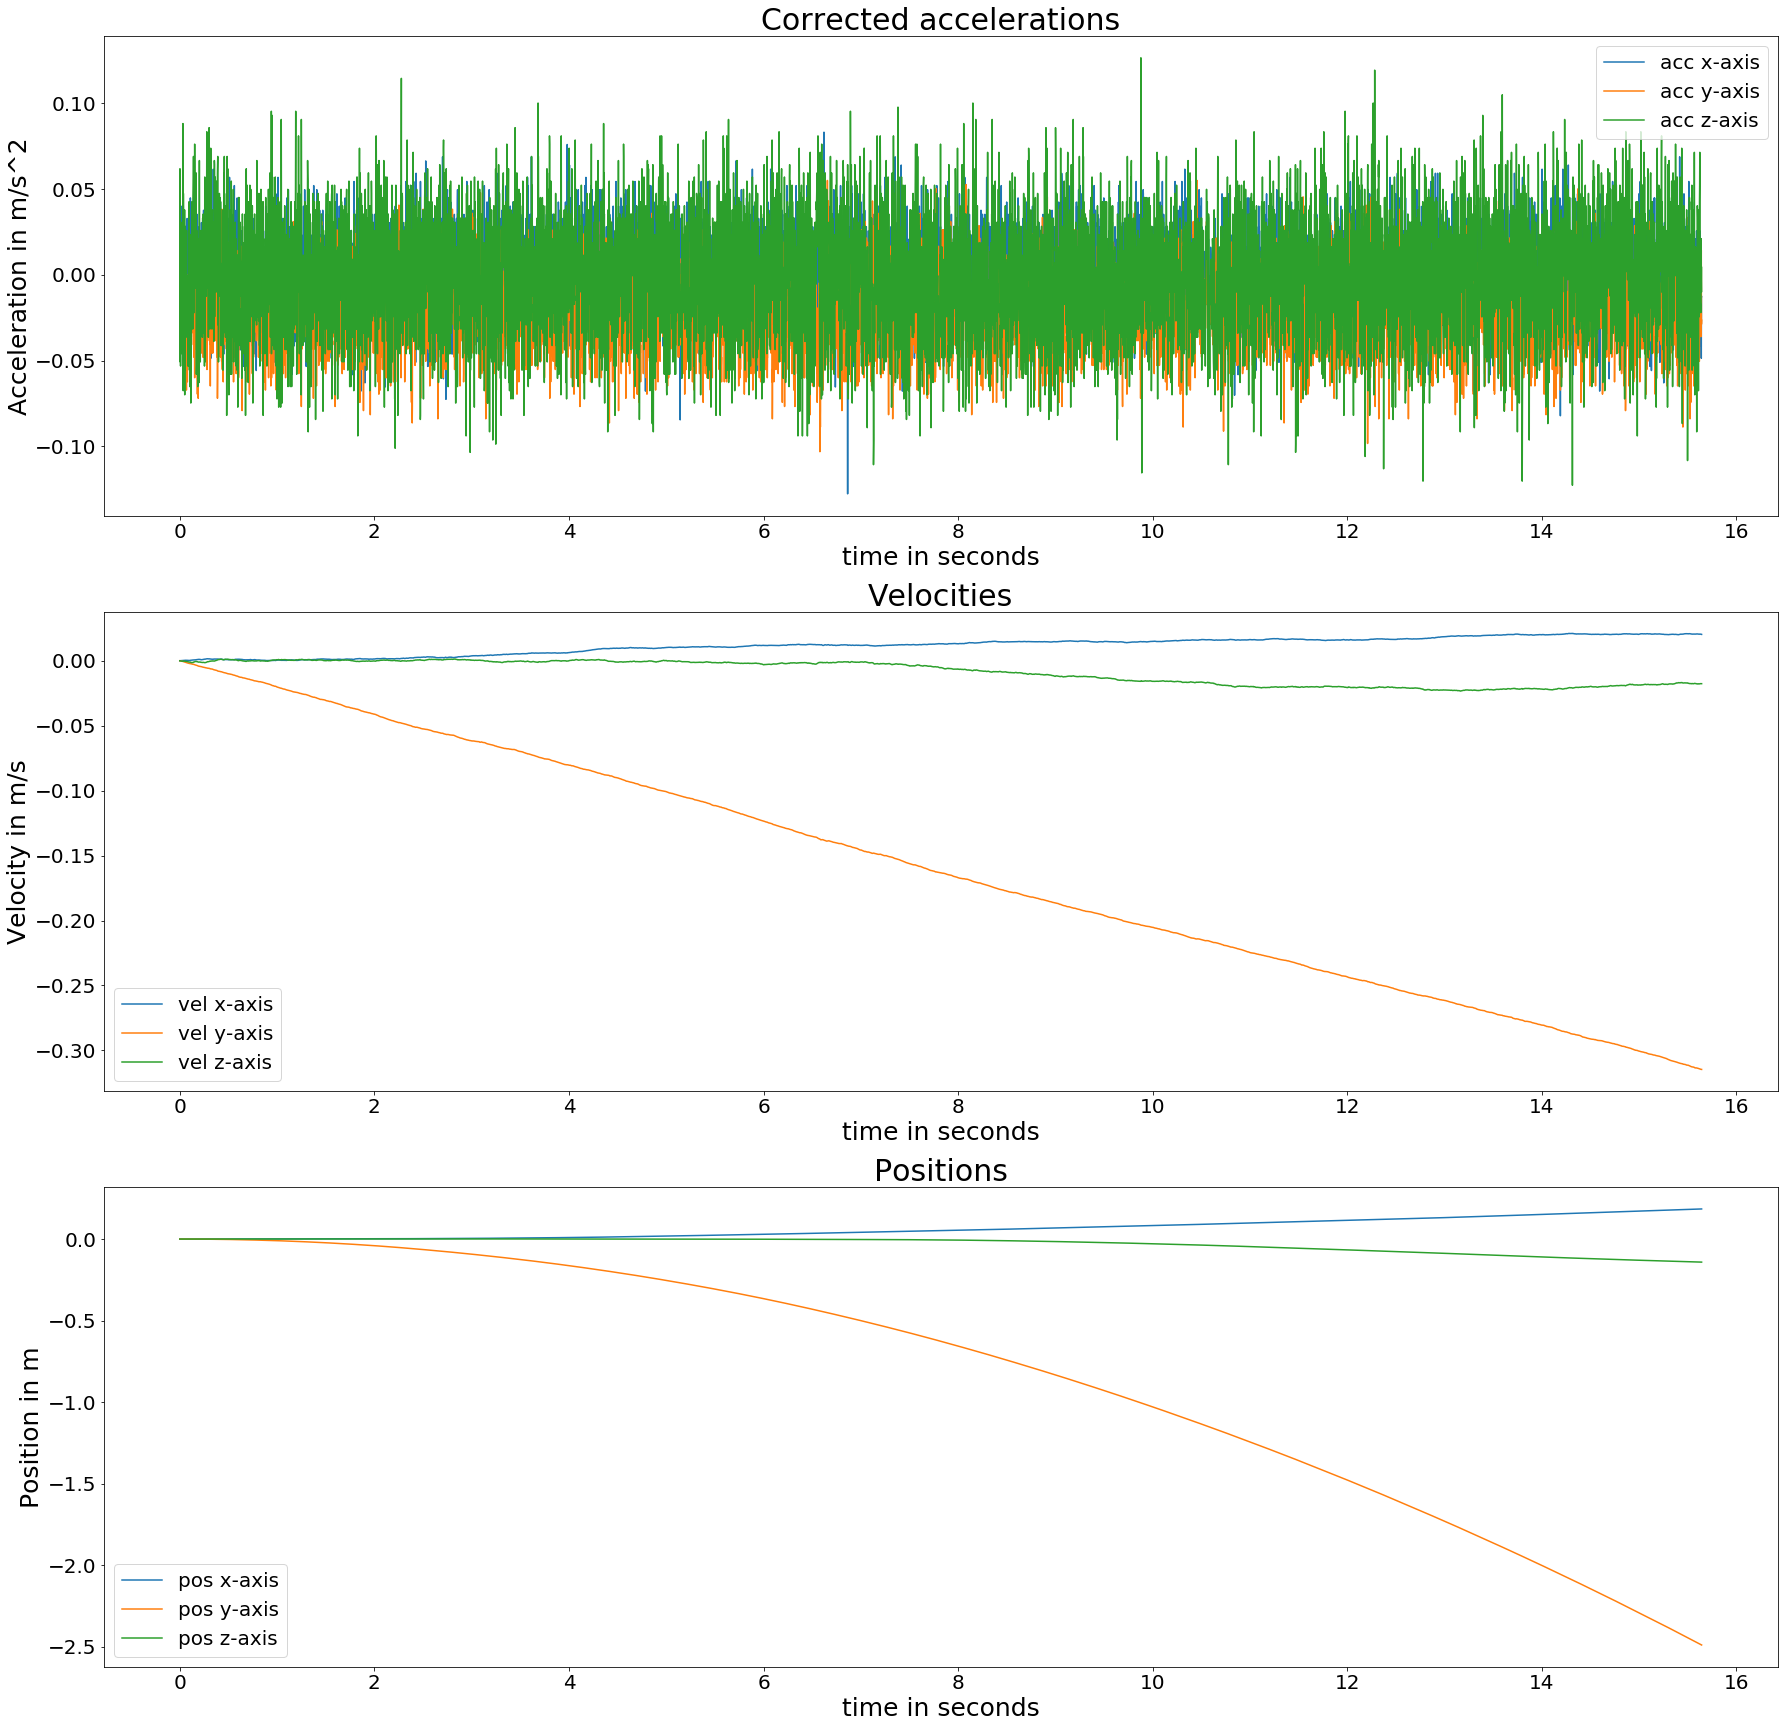

Avg. acceleration deviation: 0.022135 m/s^2
Avg. velocity deviation: 0.106003 m/s
Avg. position deviation: 0.833640 m

Orientation 4
Run 1


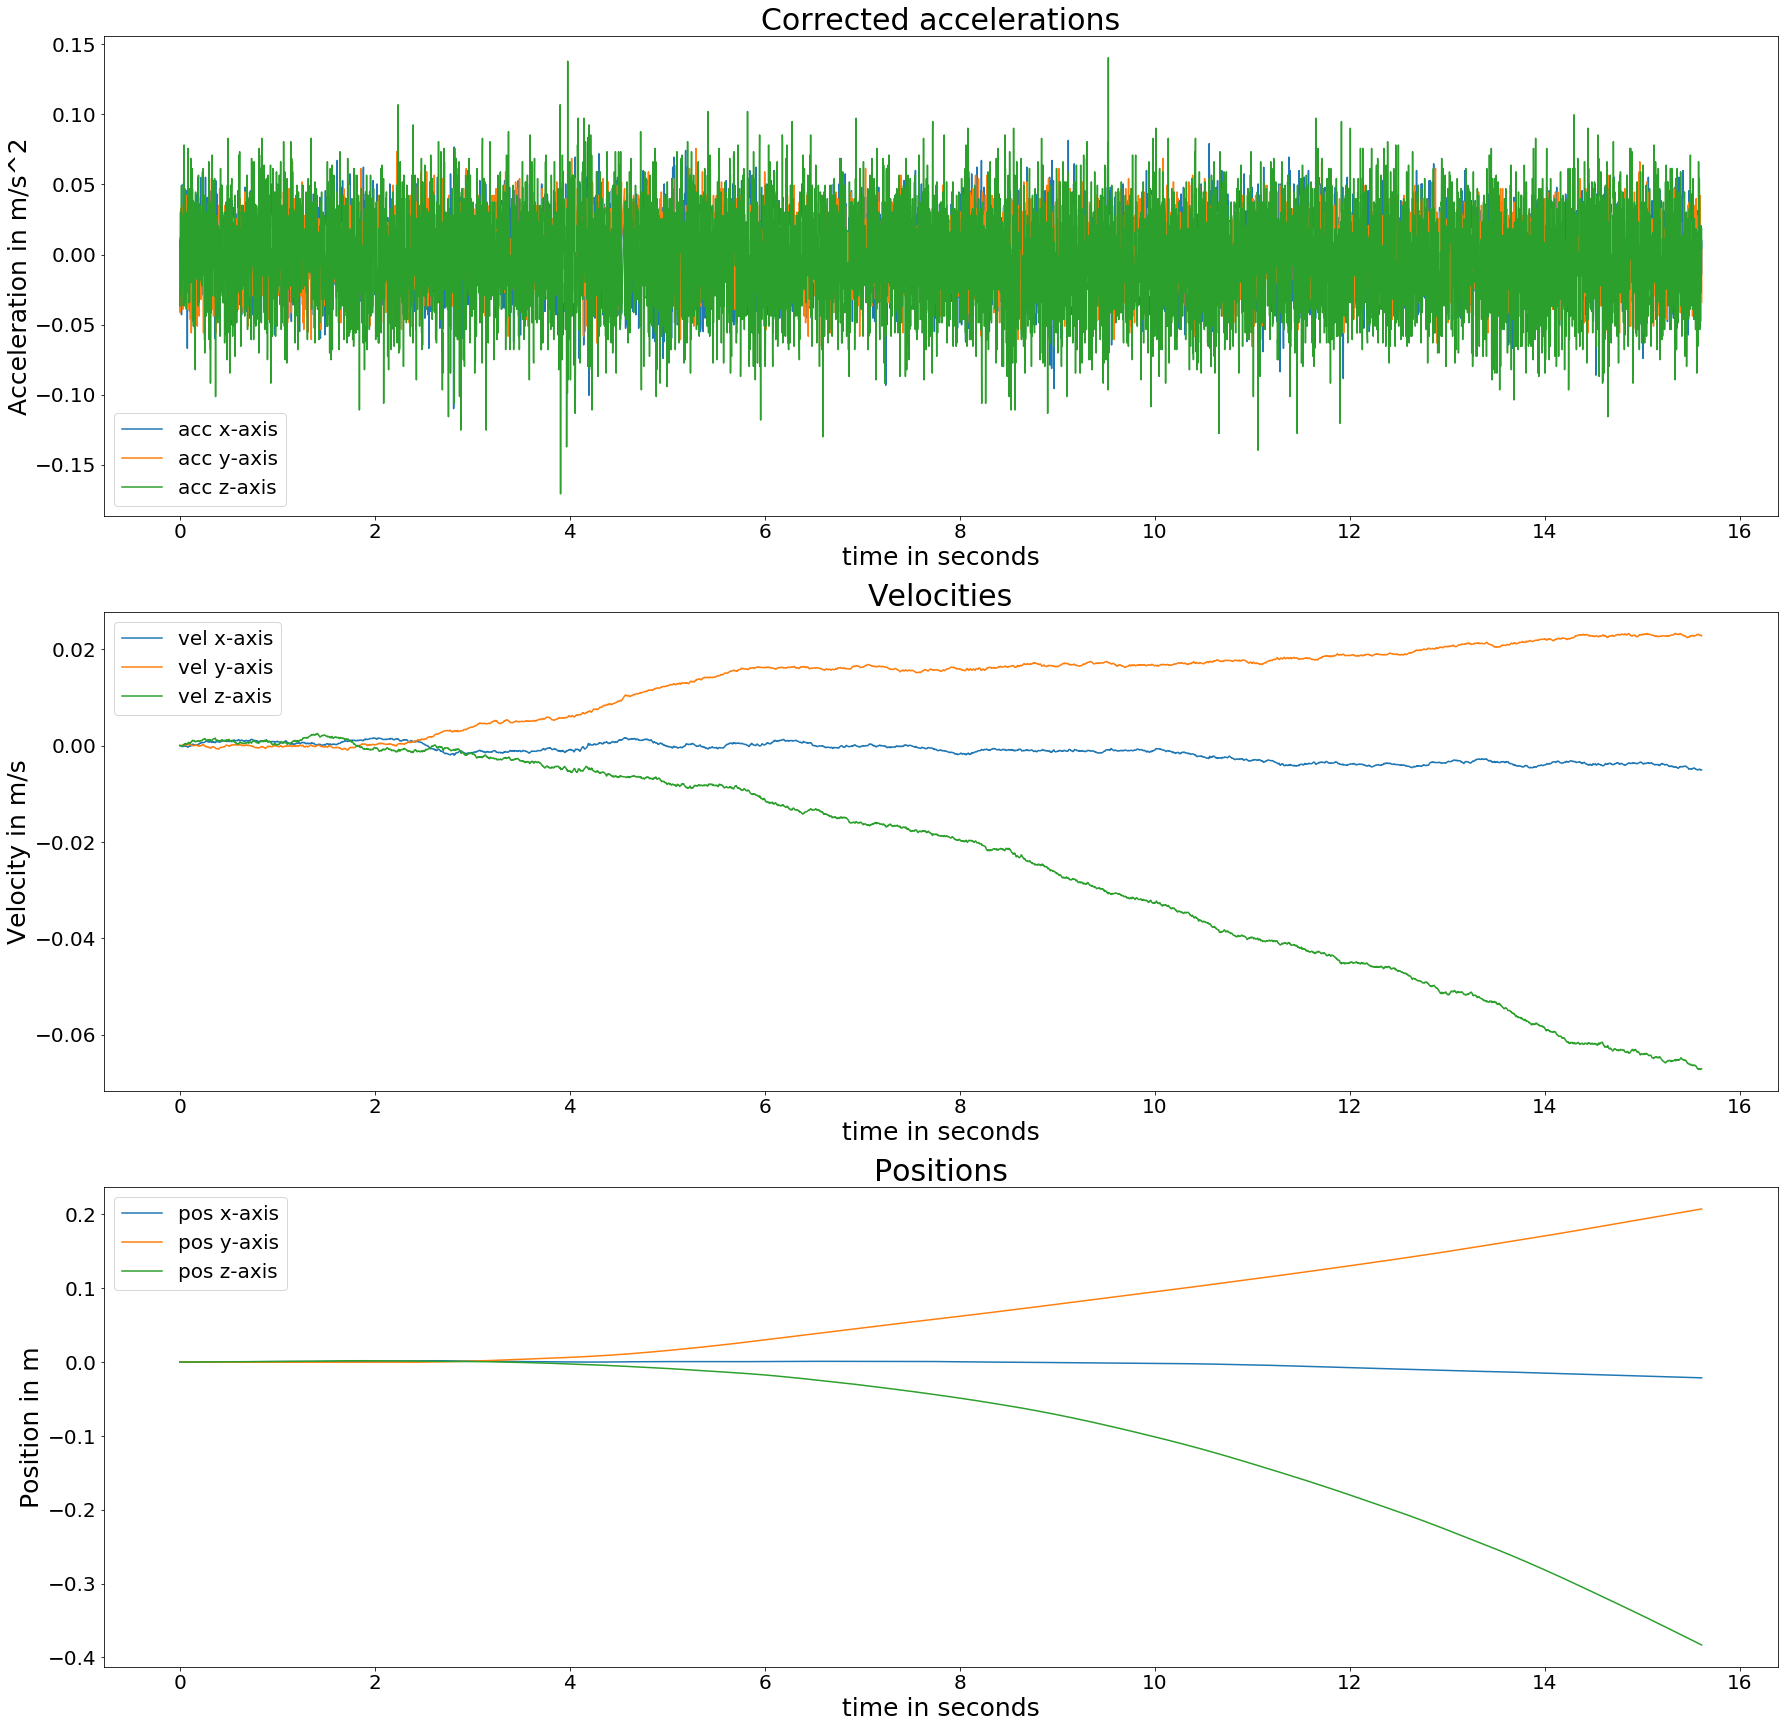

Run 2


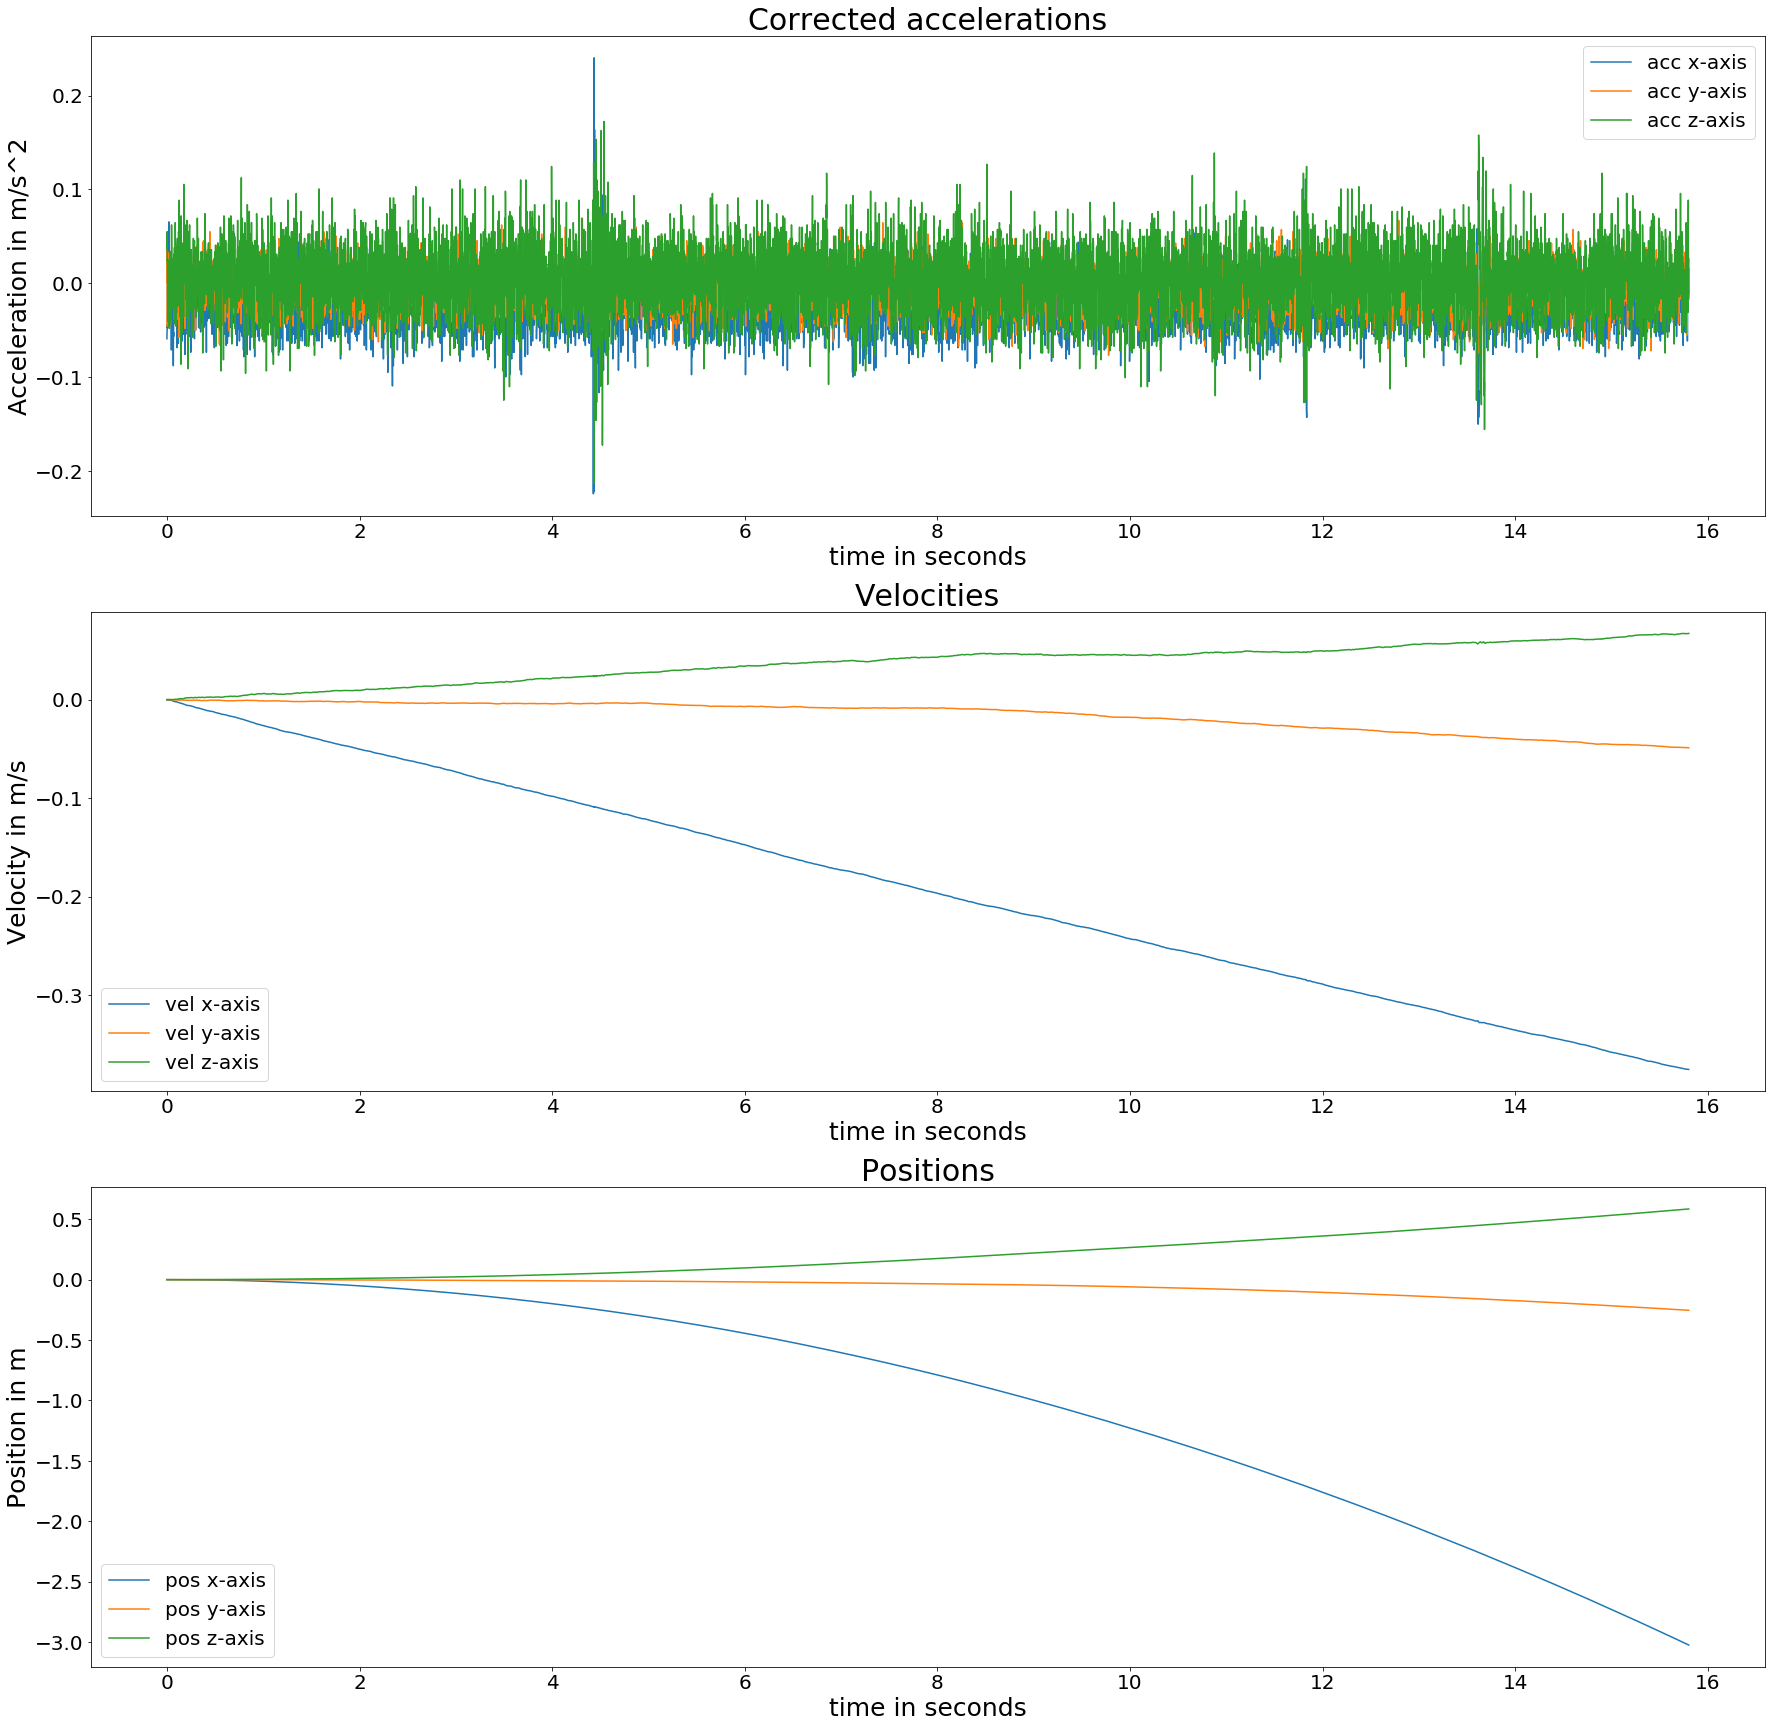

Run 3


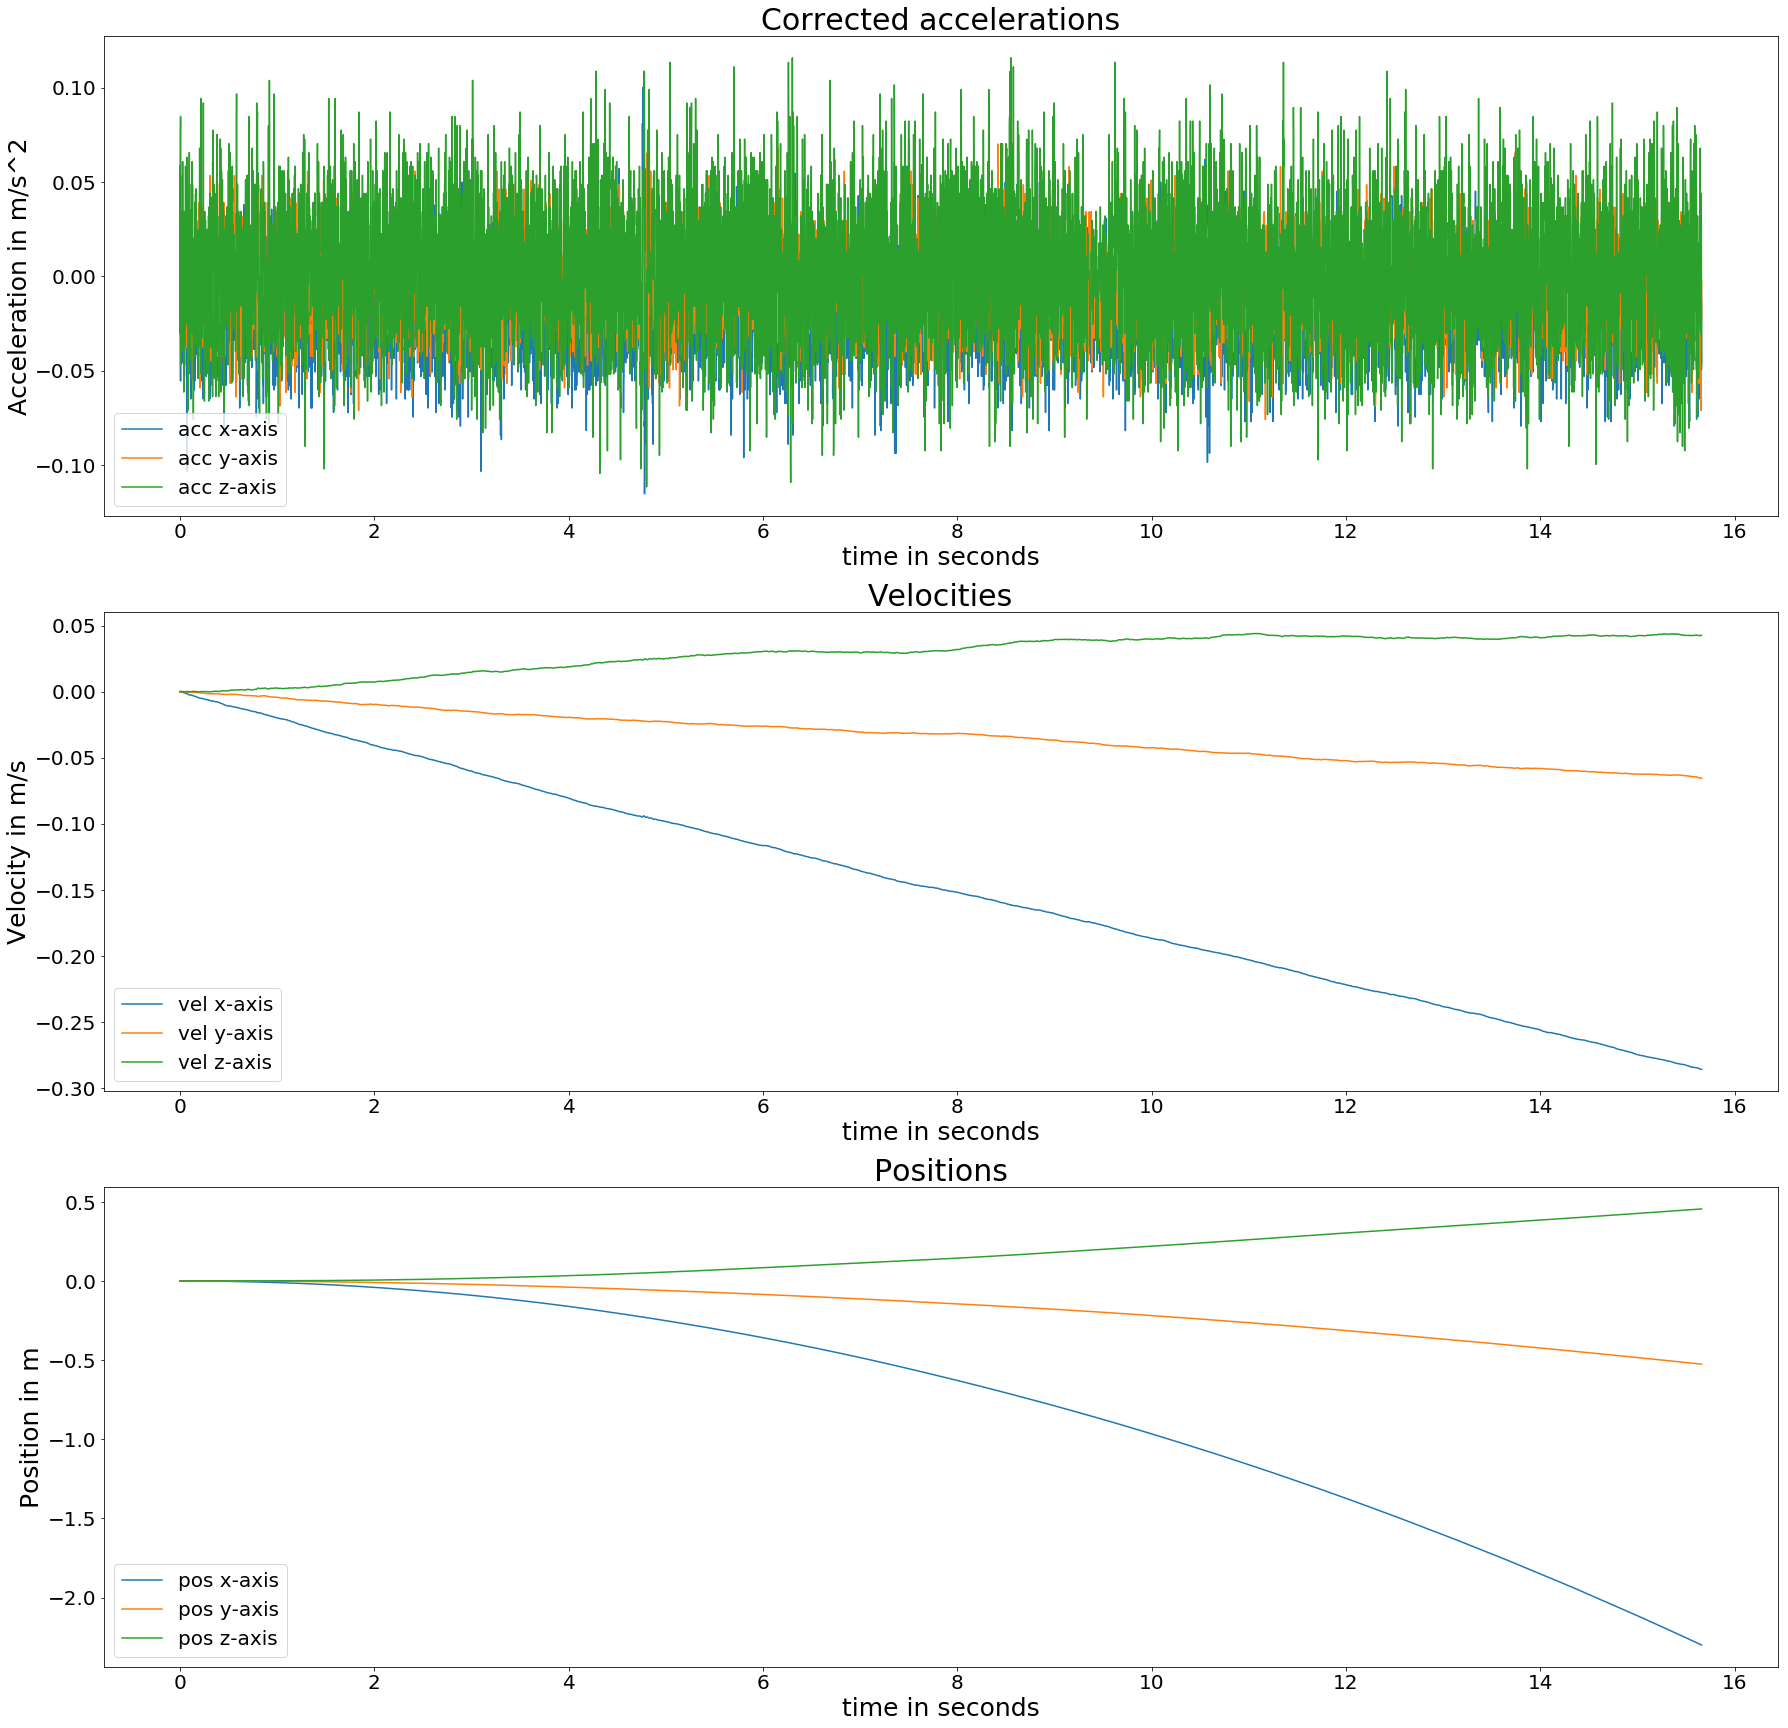

Run 4


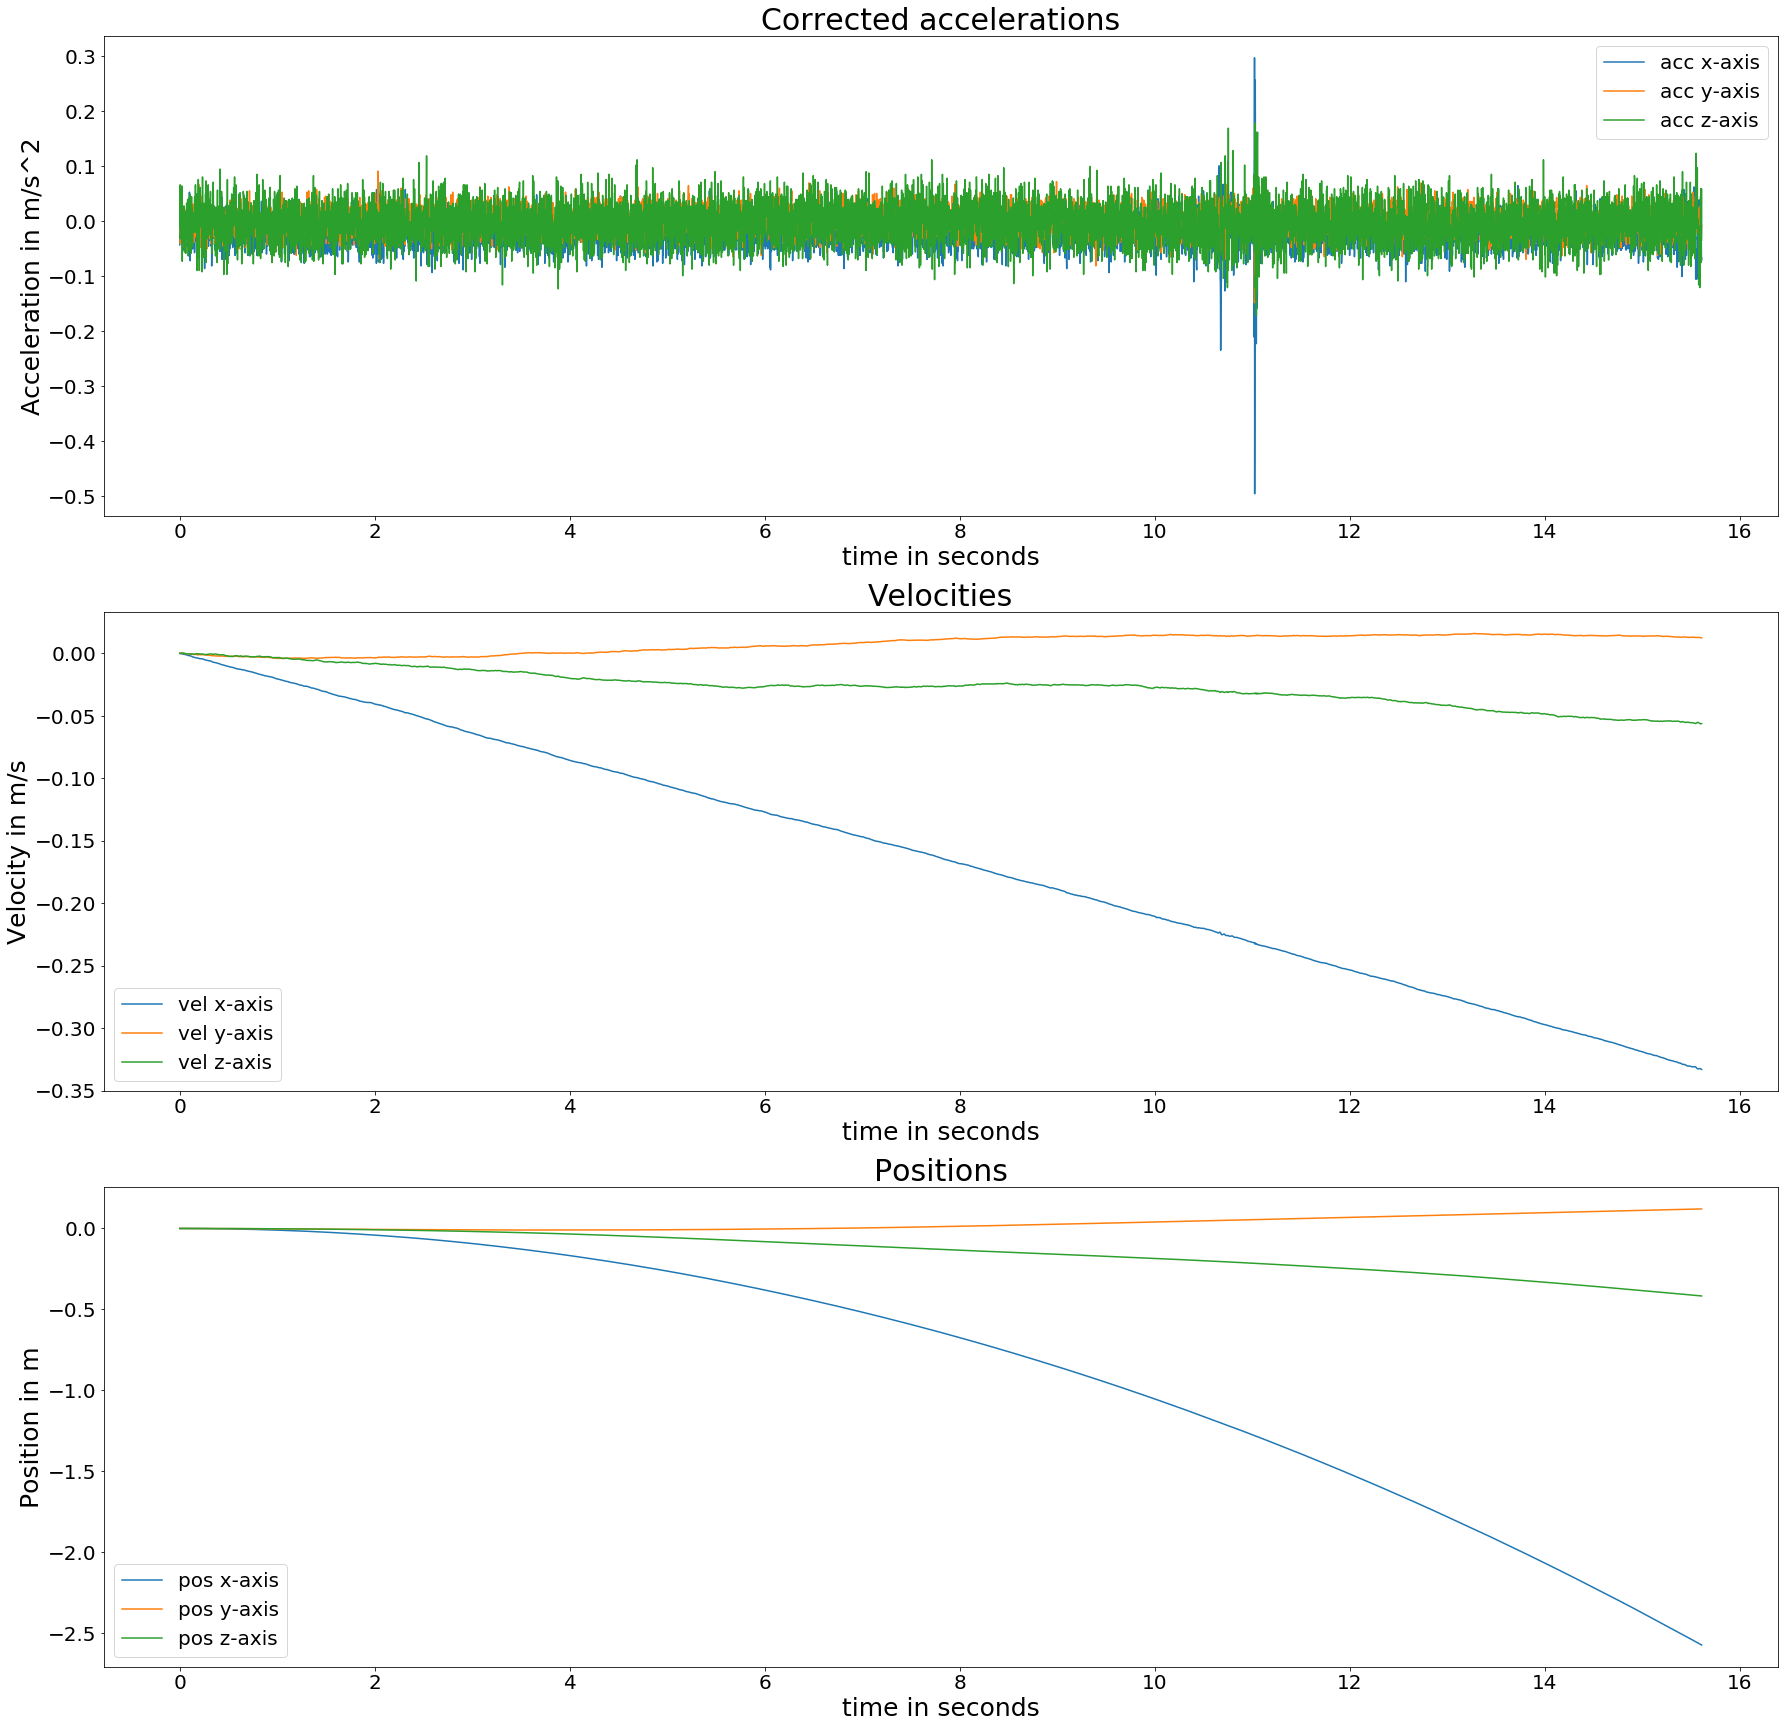

Run 5


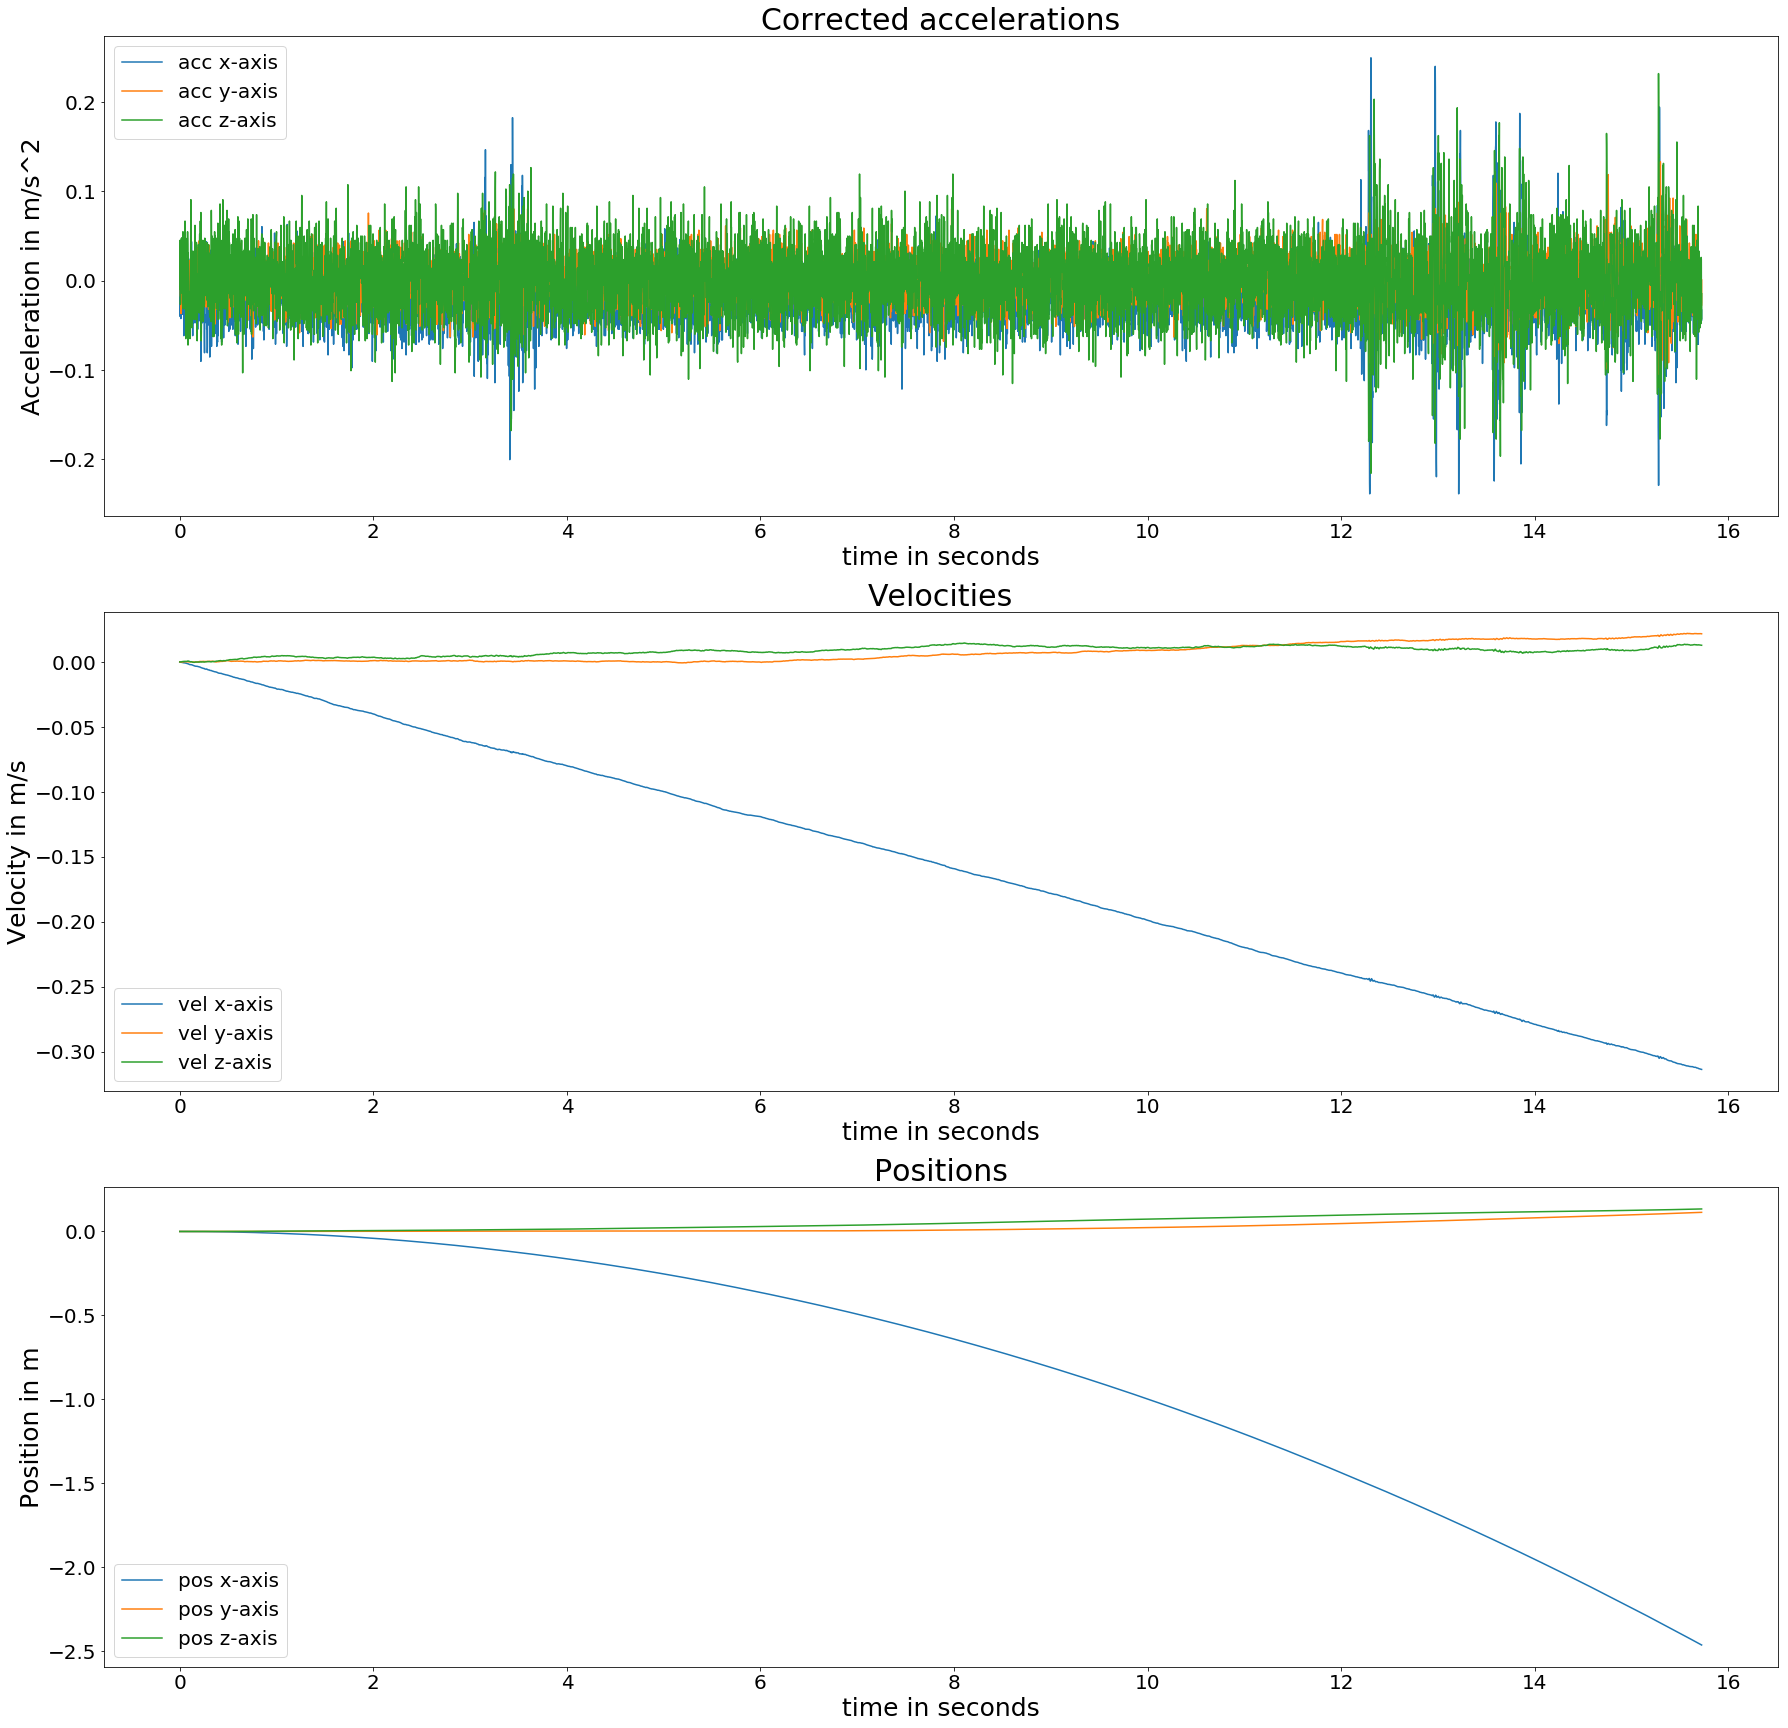

Avg. acceleration deviation: 0.022869 m/s^2
Avg. velocity deviation: 0.115358 m/s
Avg. position deviation: 0.905078 m

Orientation 5
Run 1


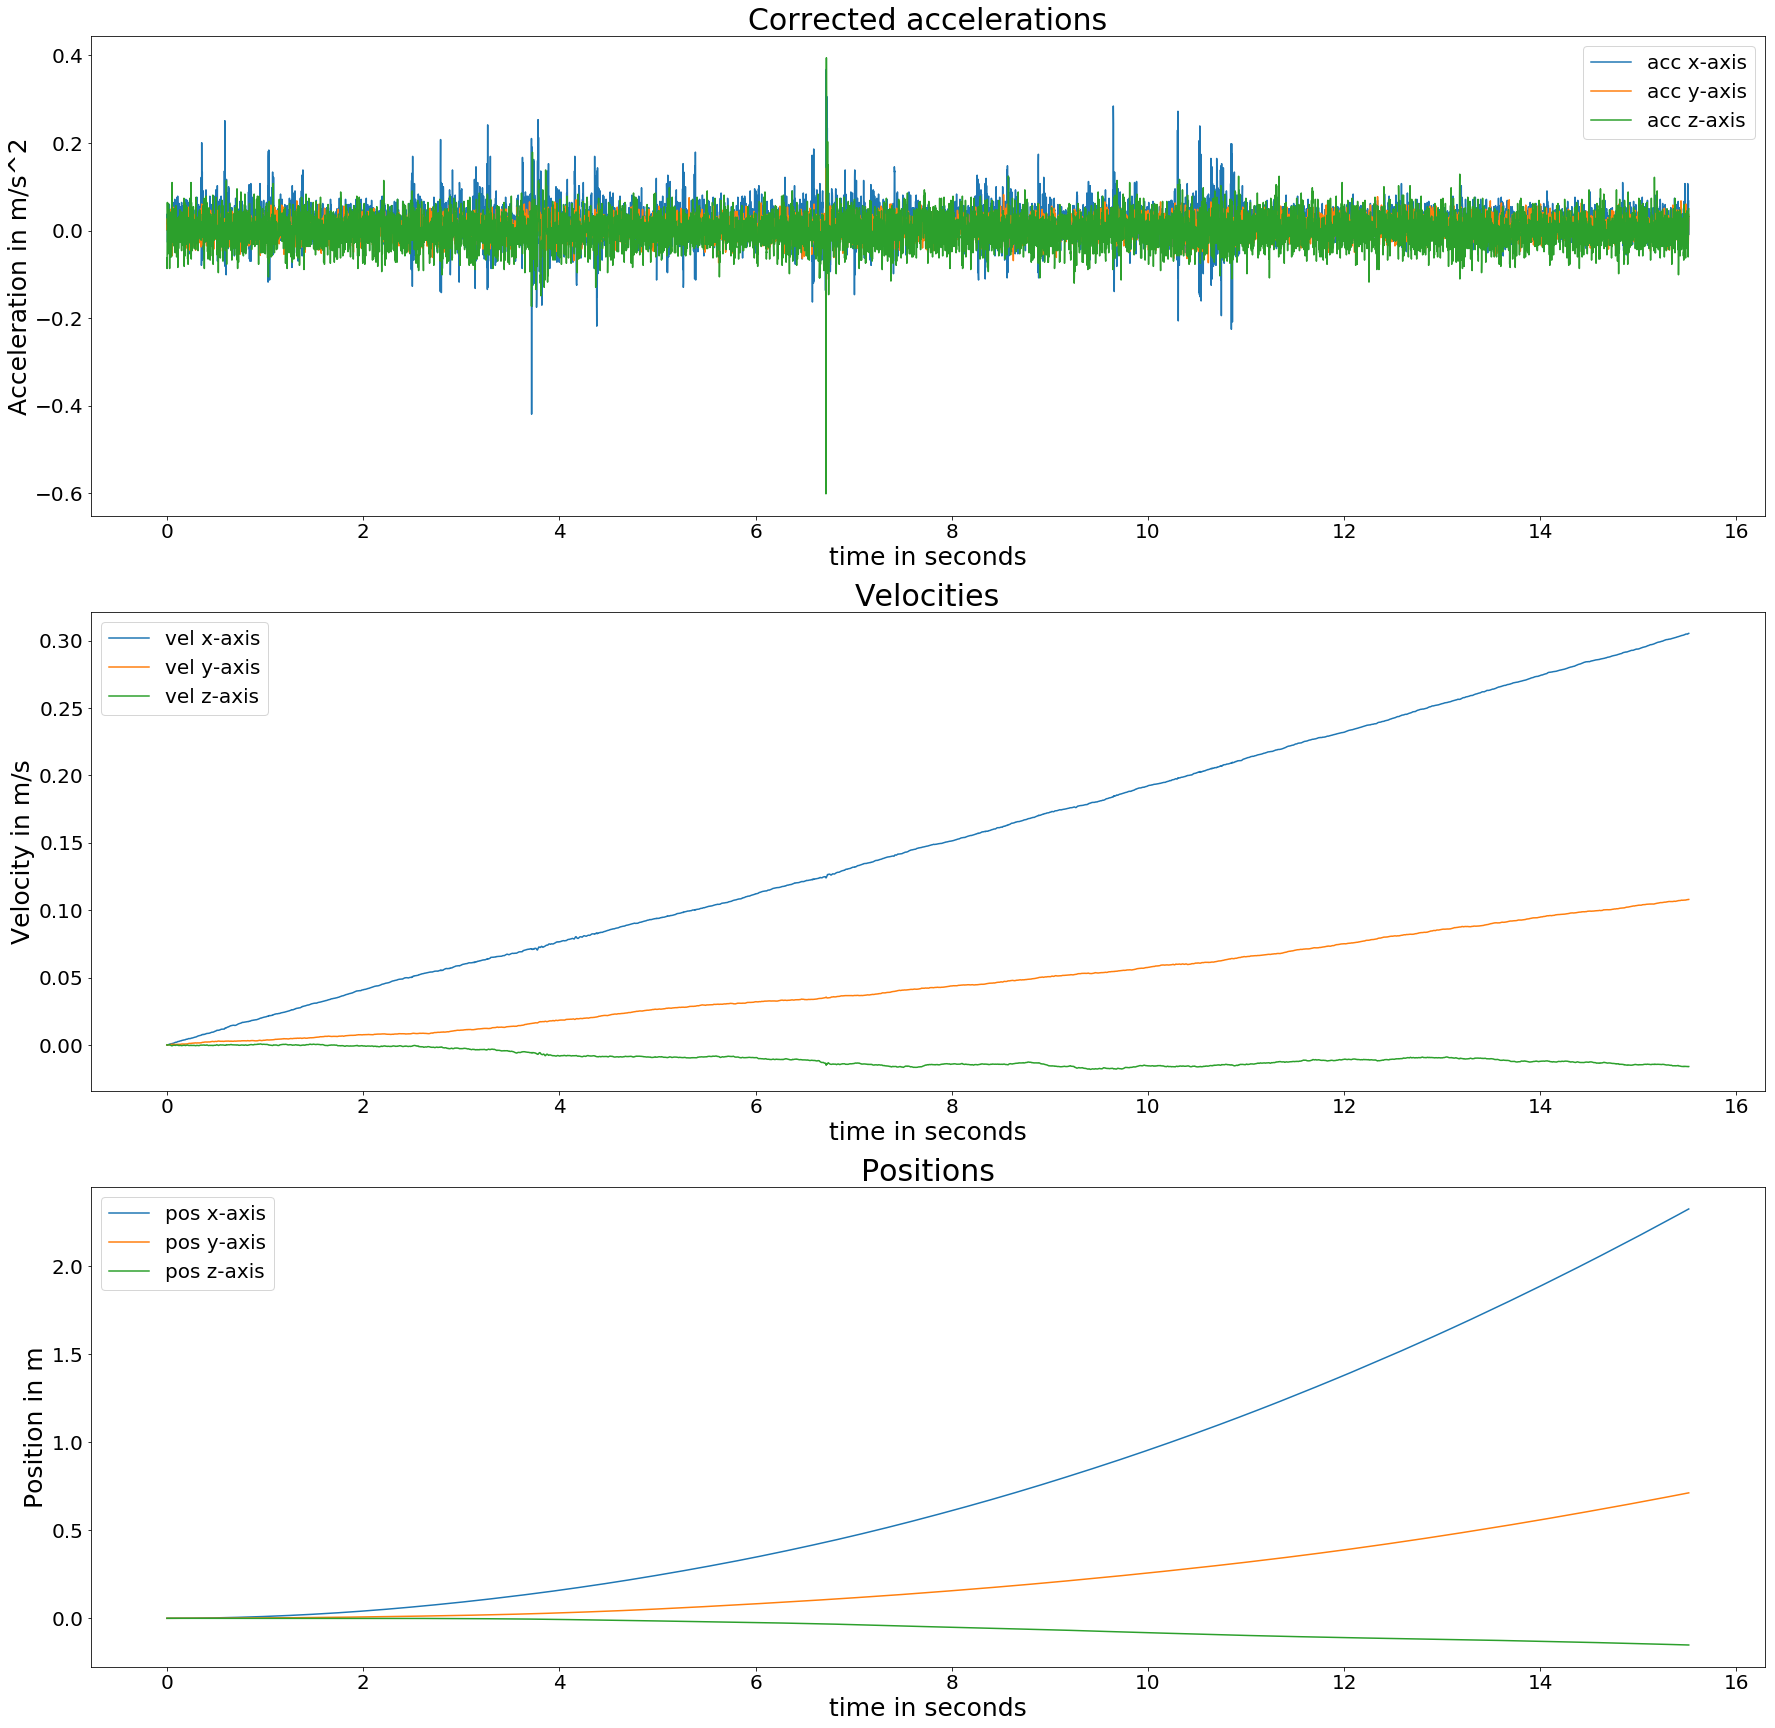

Run 2


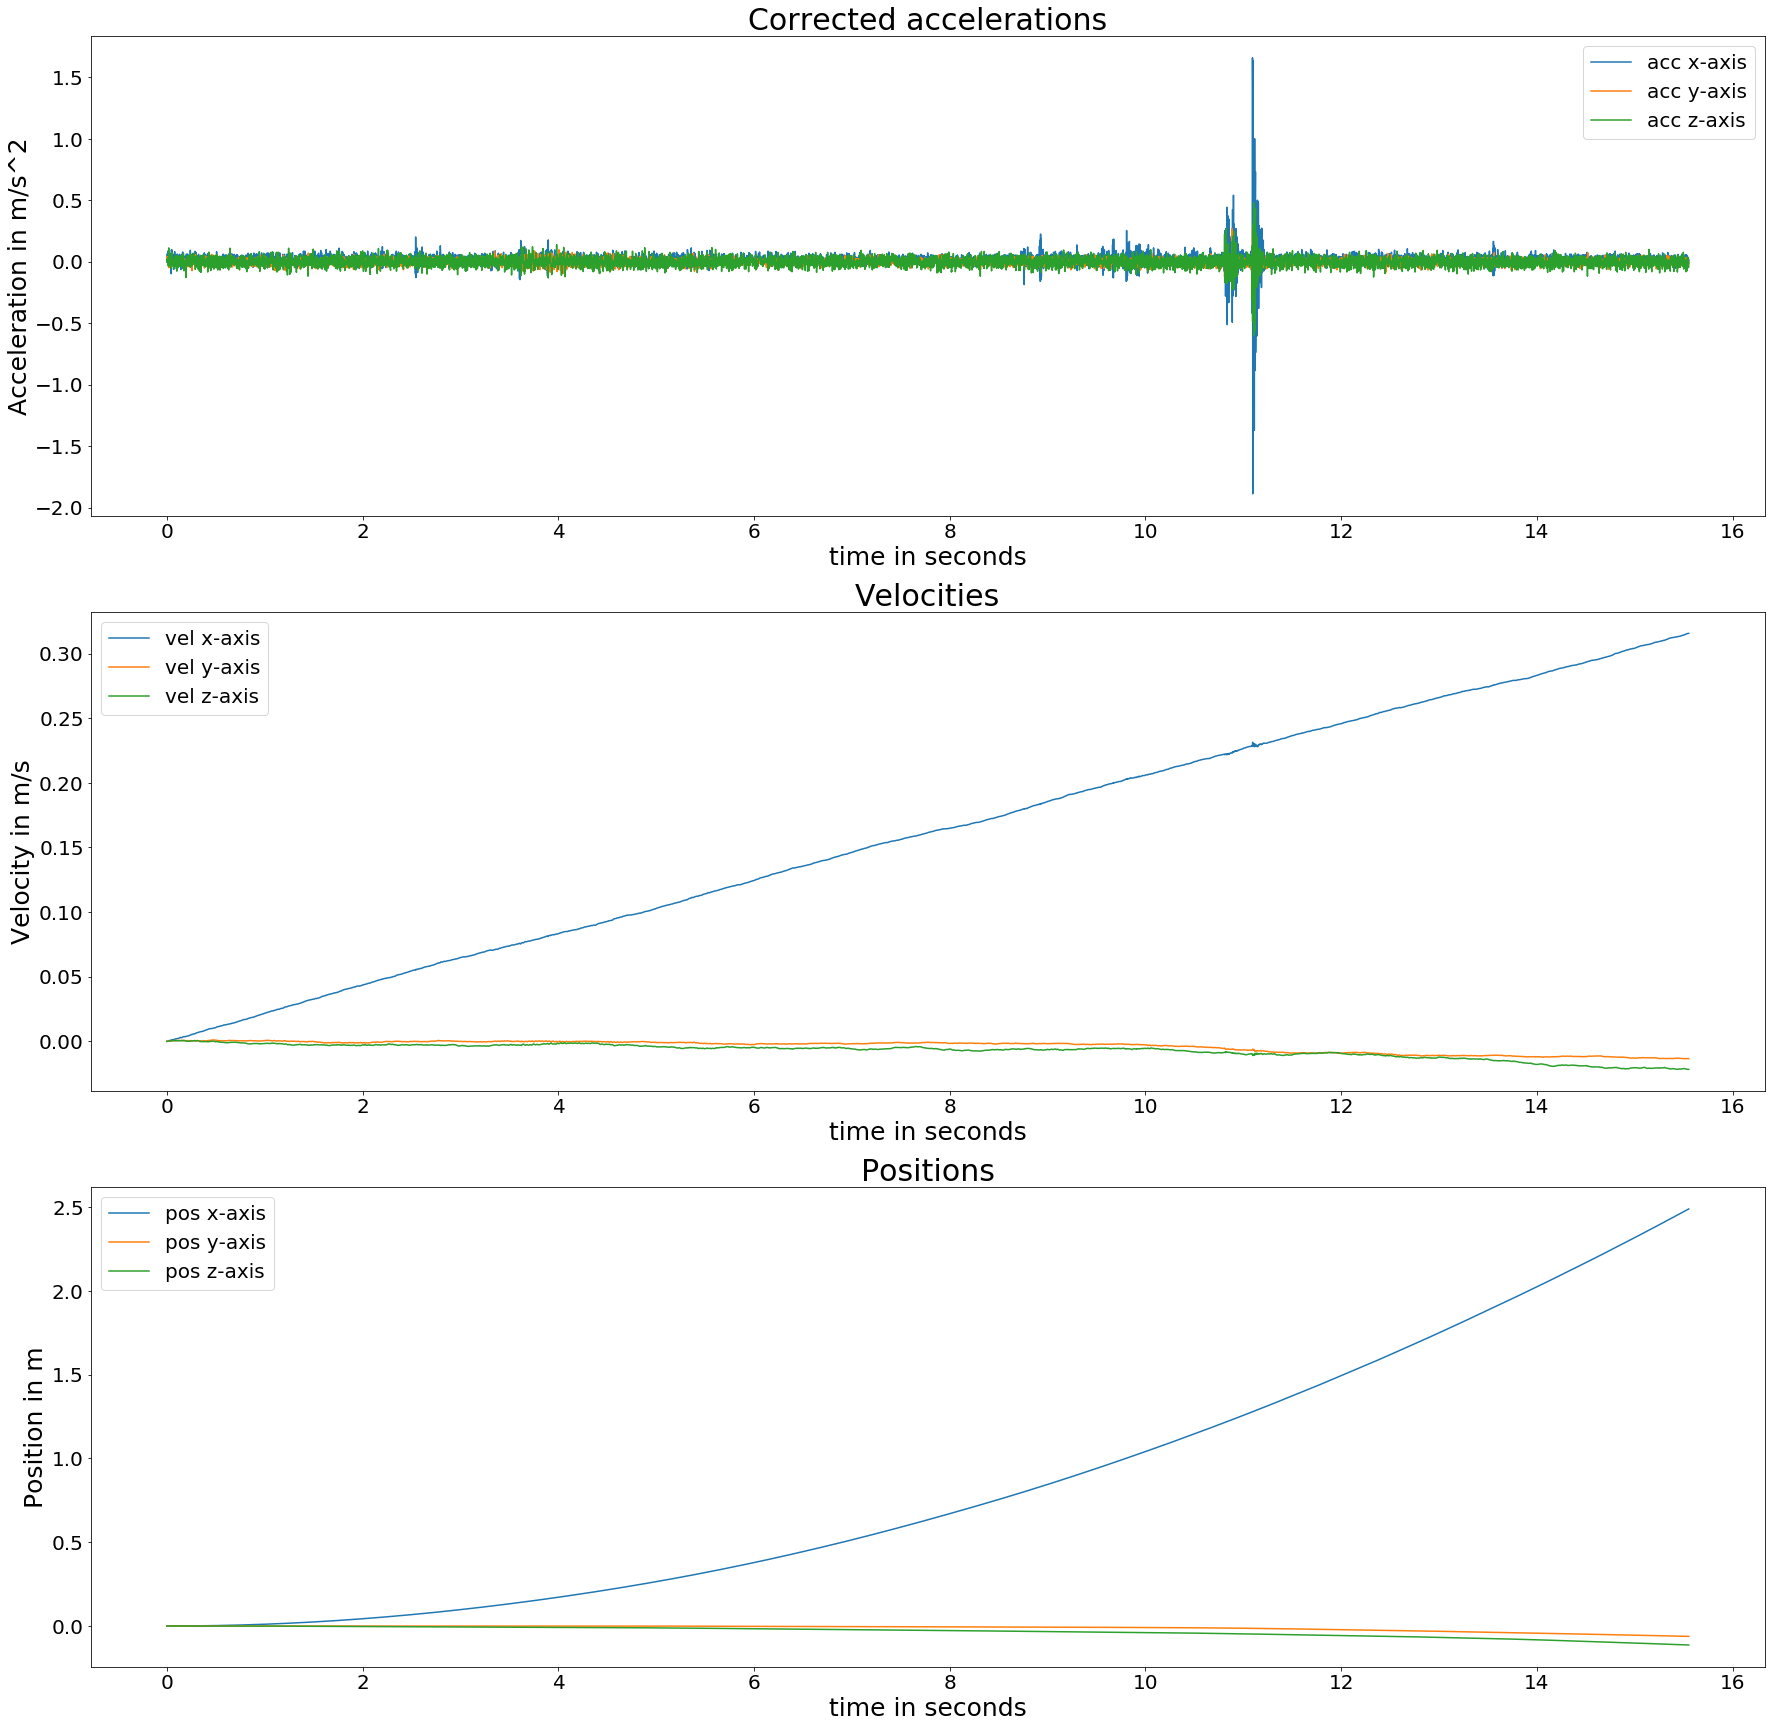

Run 3


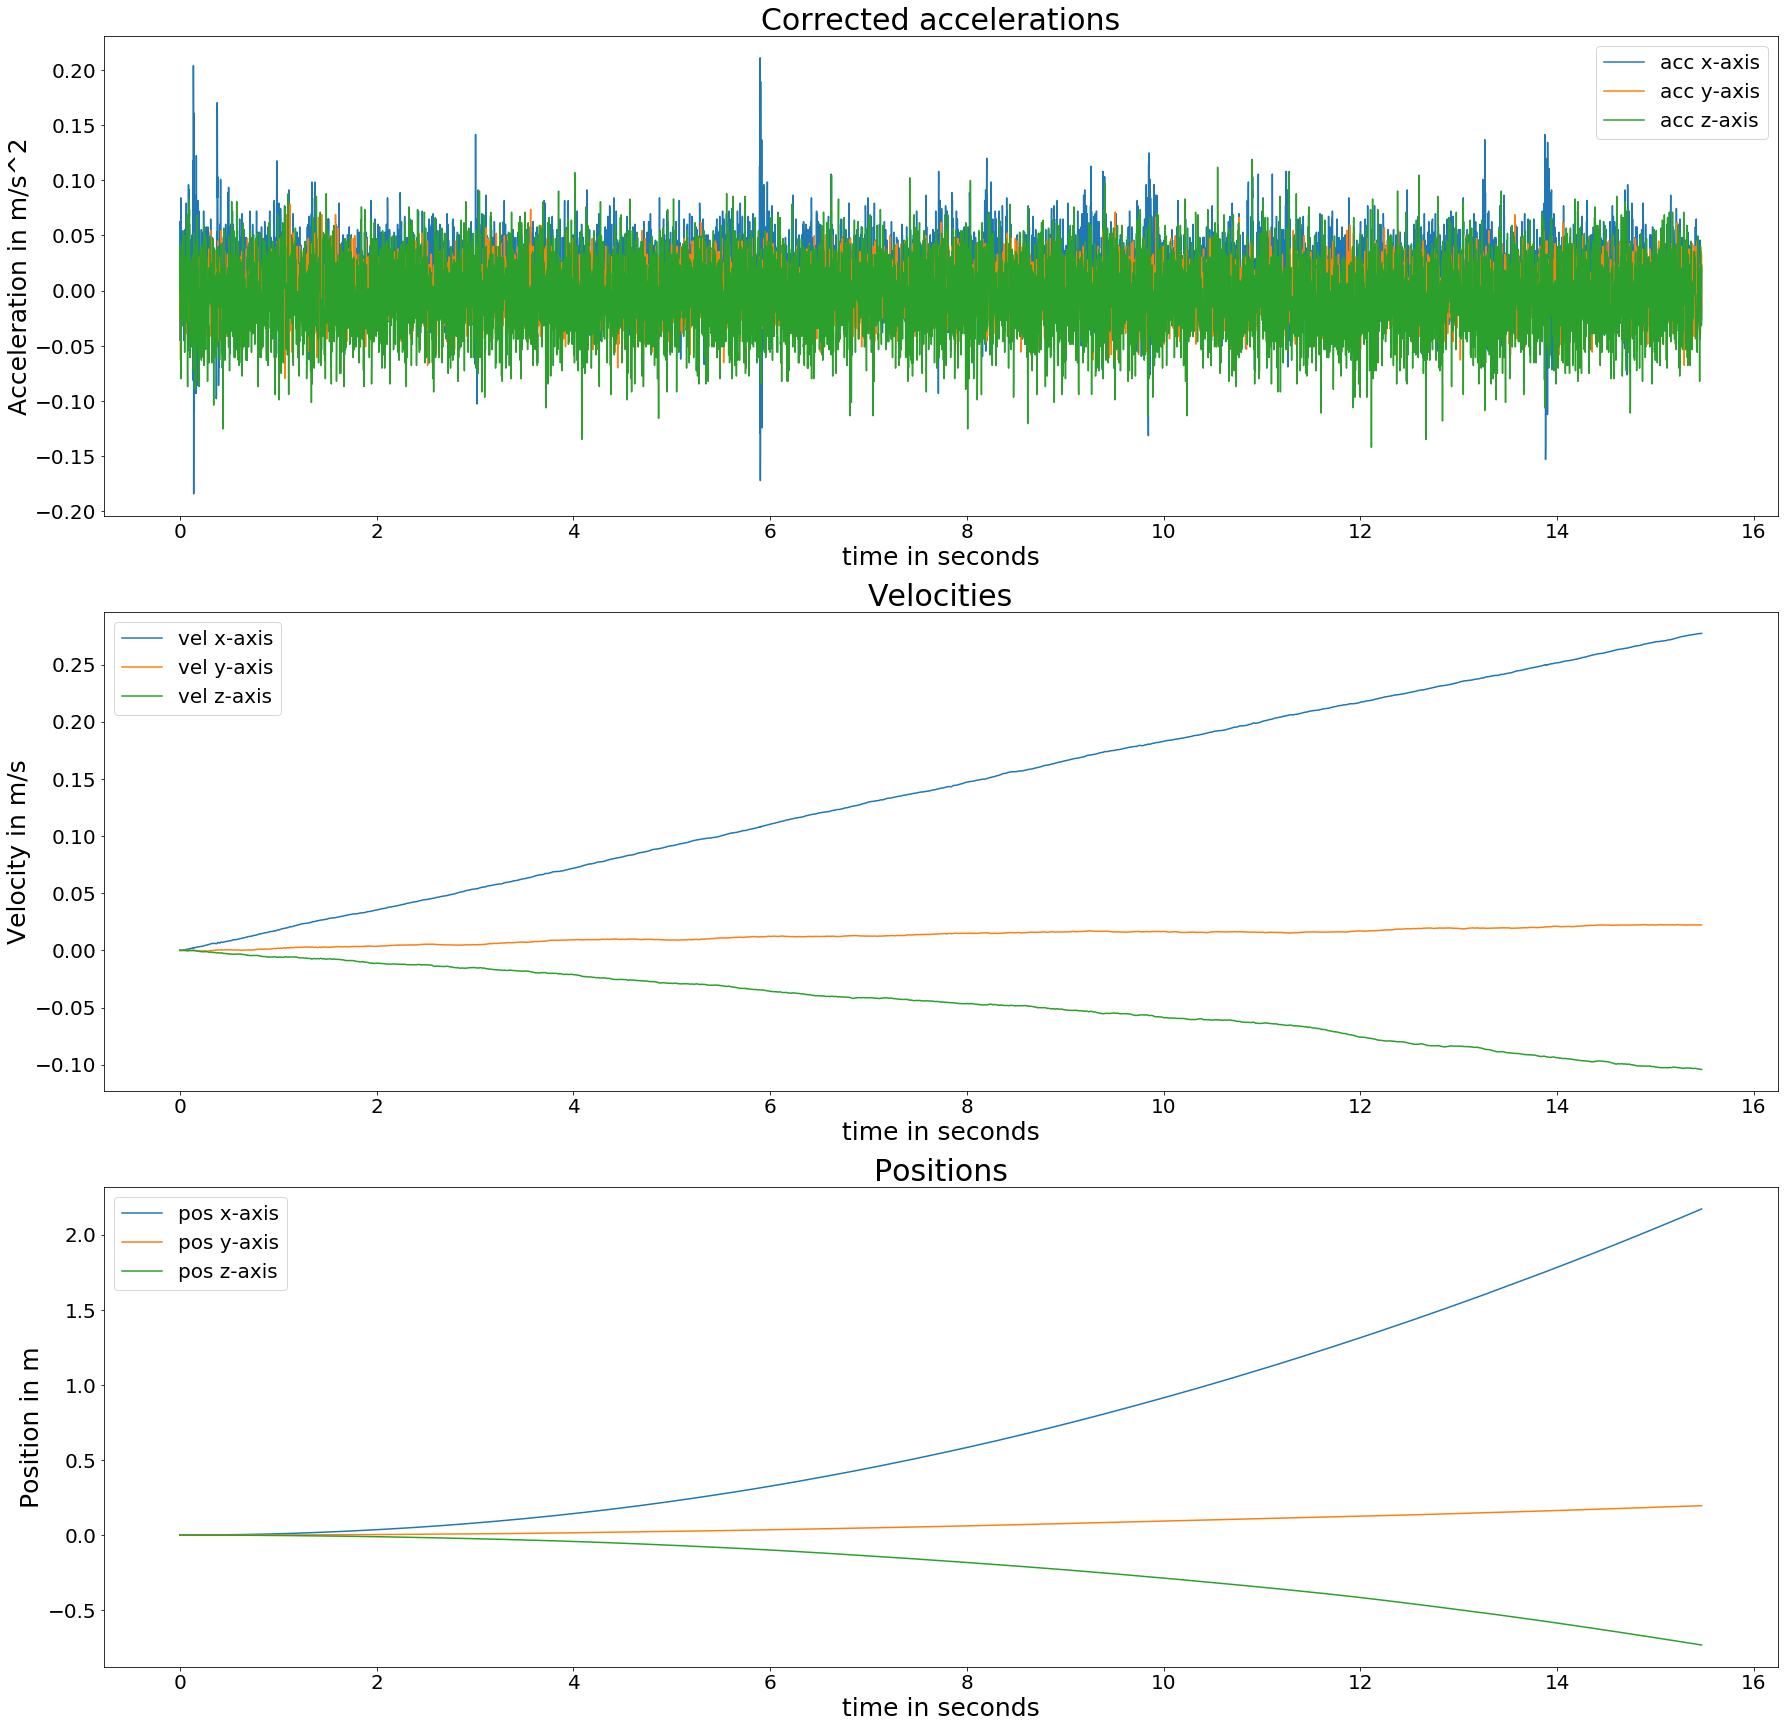

Run 4


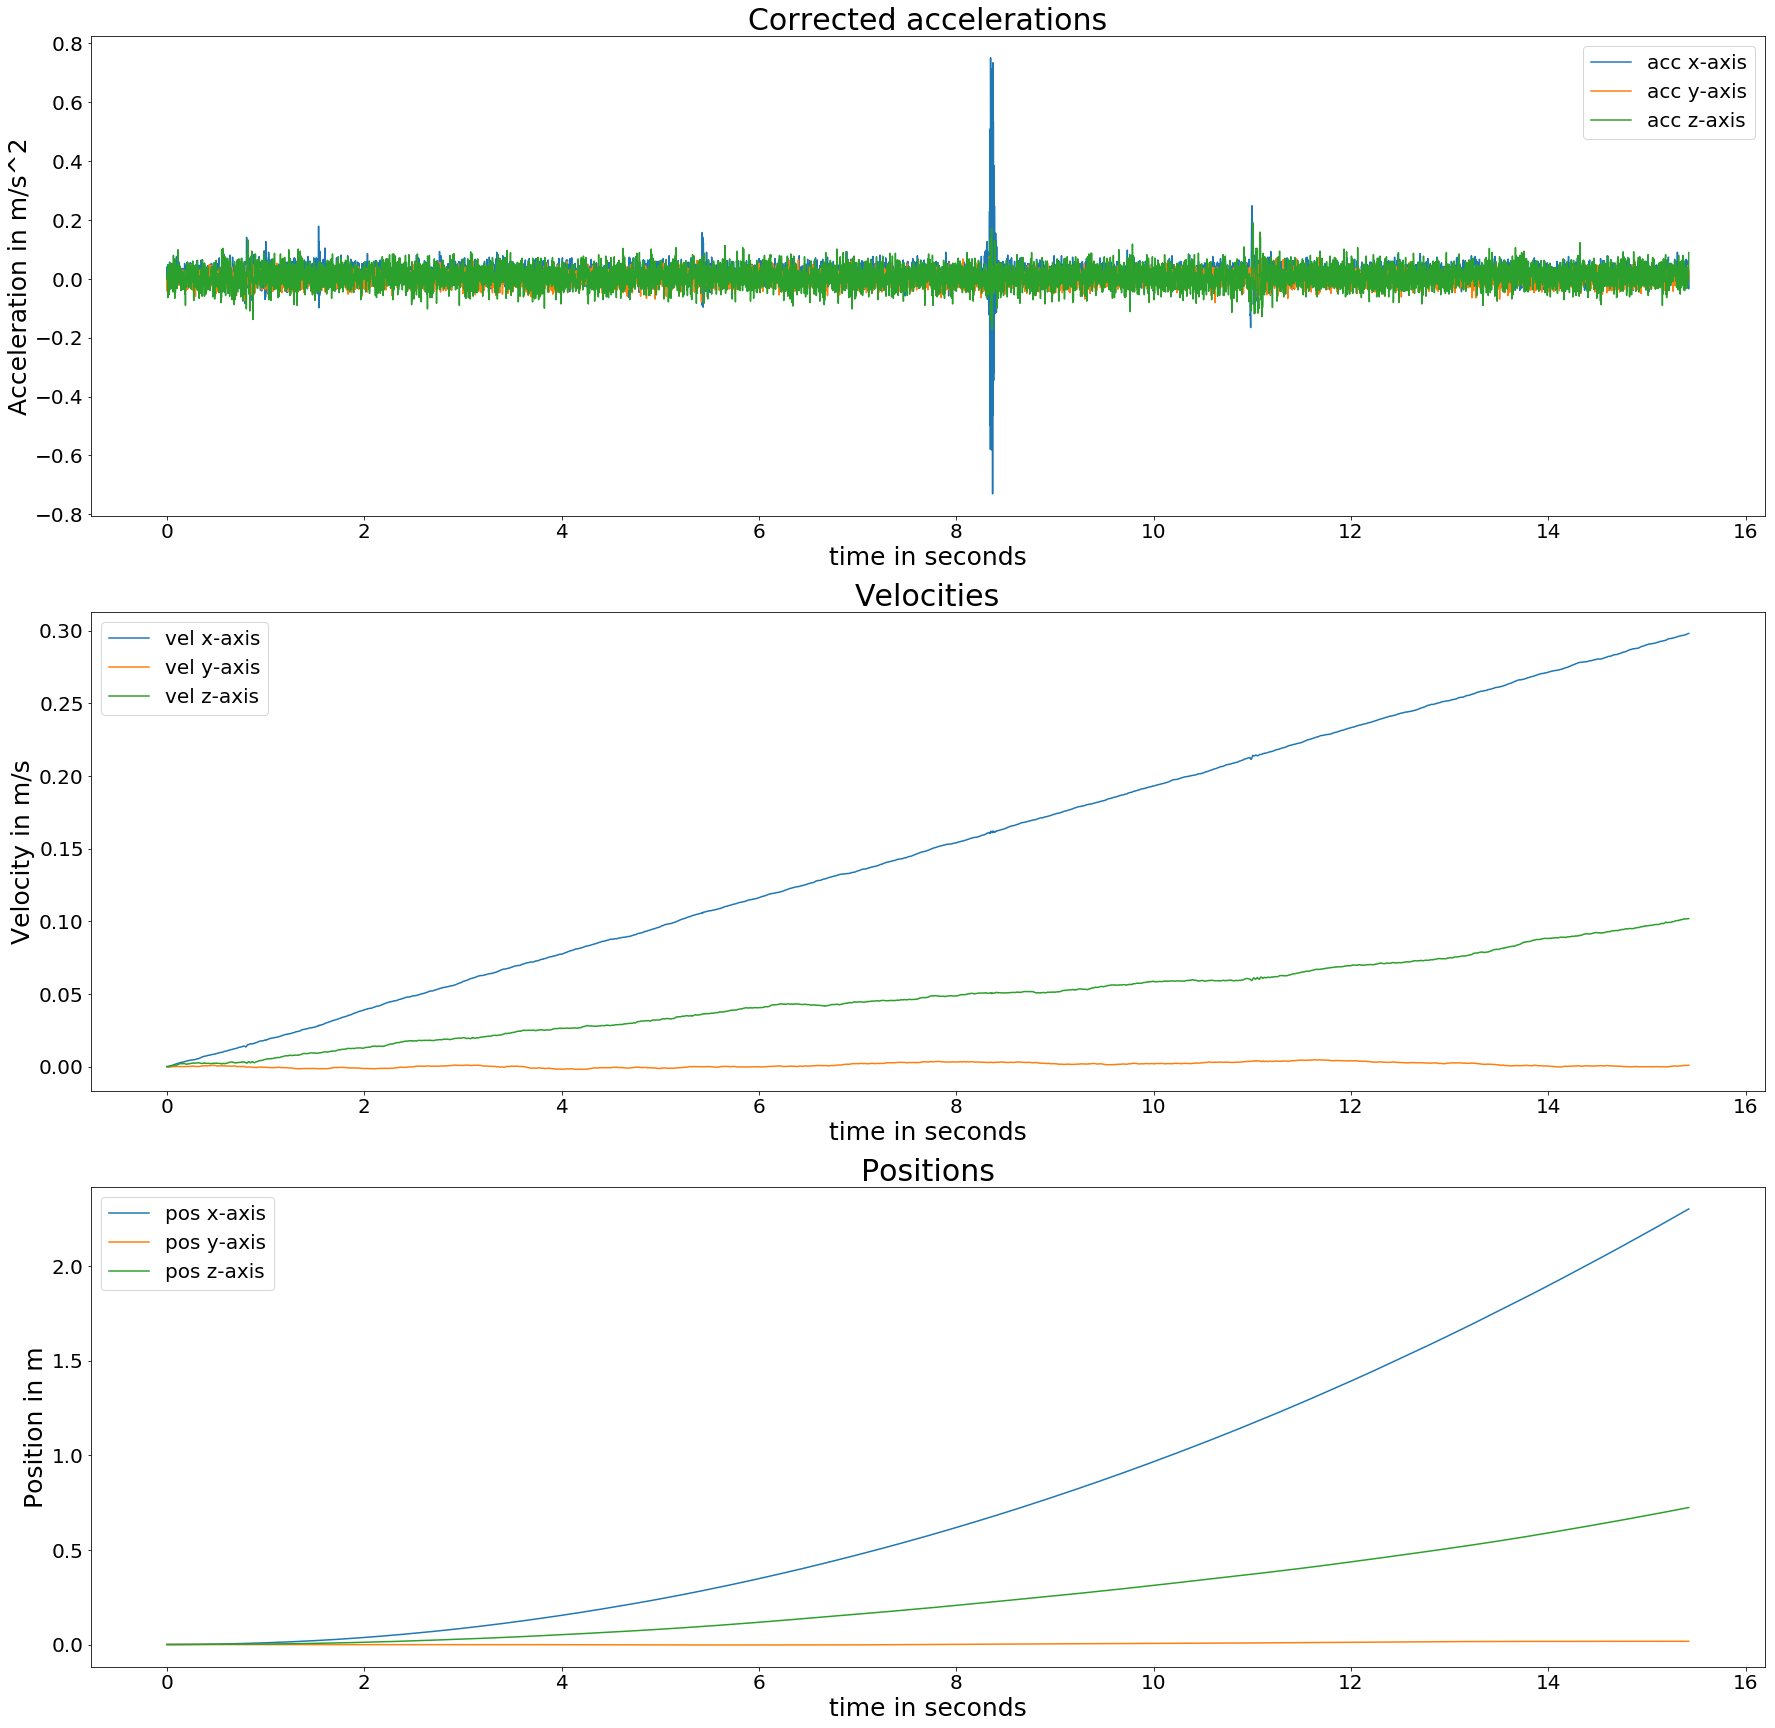

Run 5


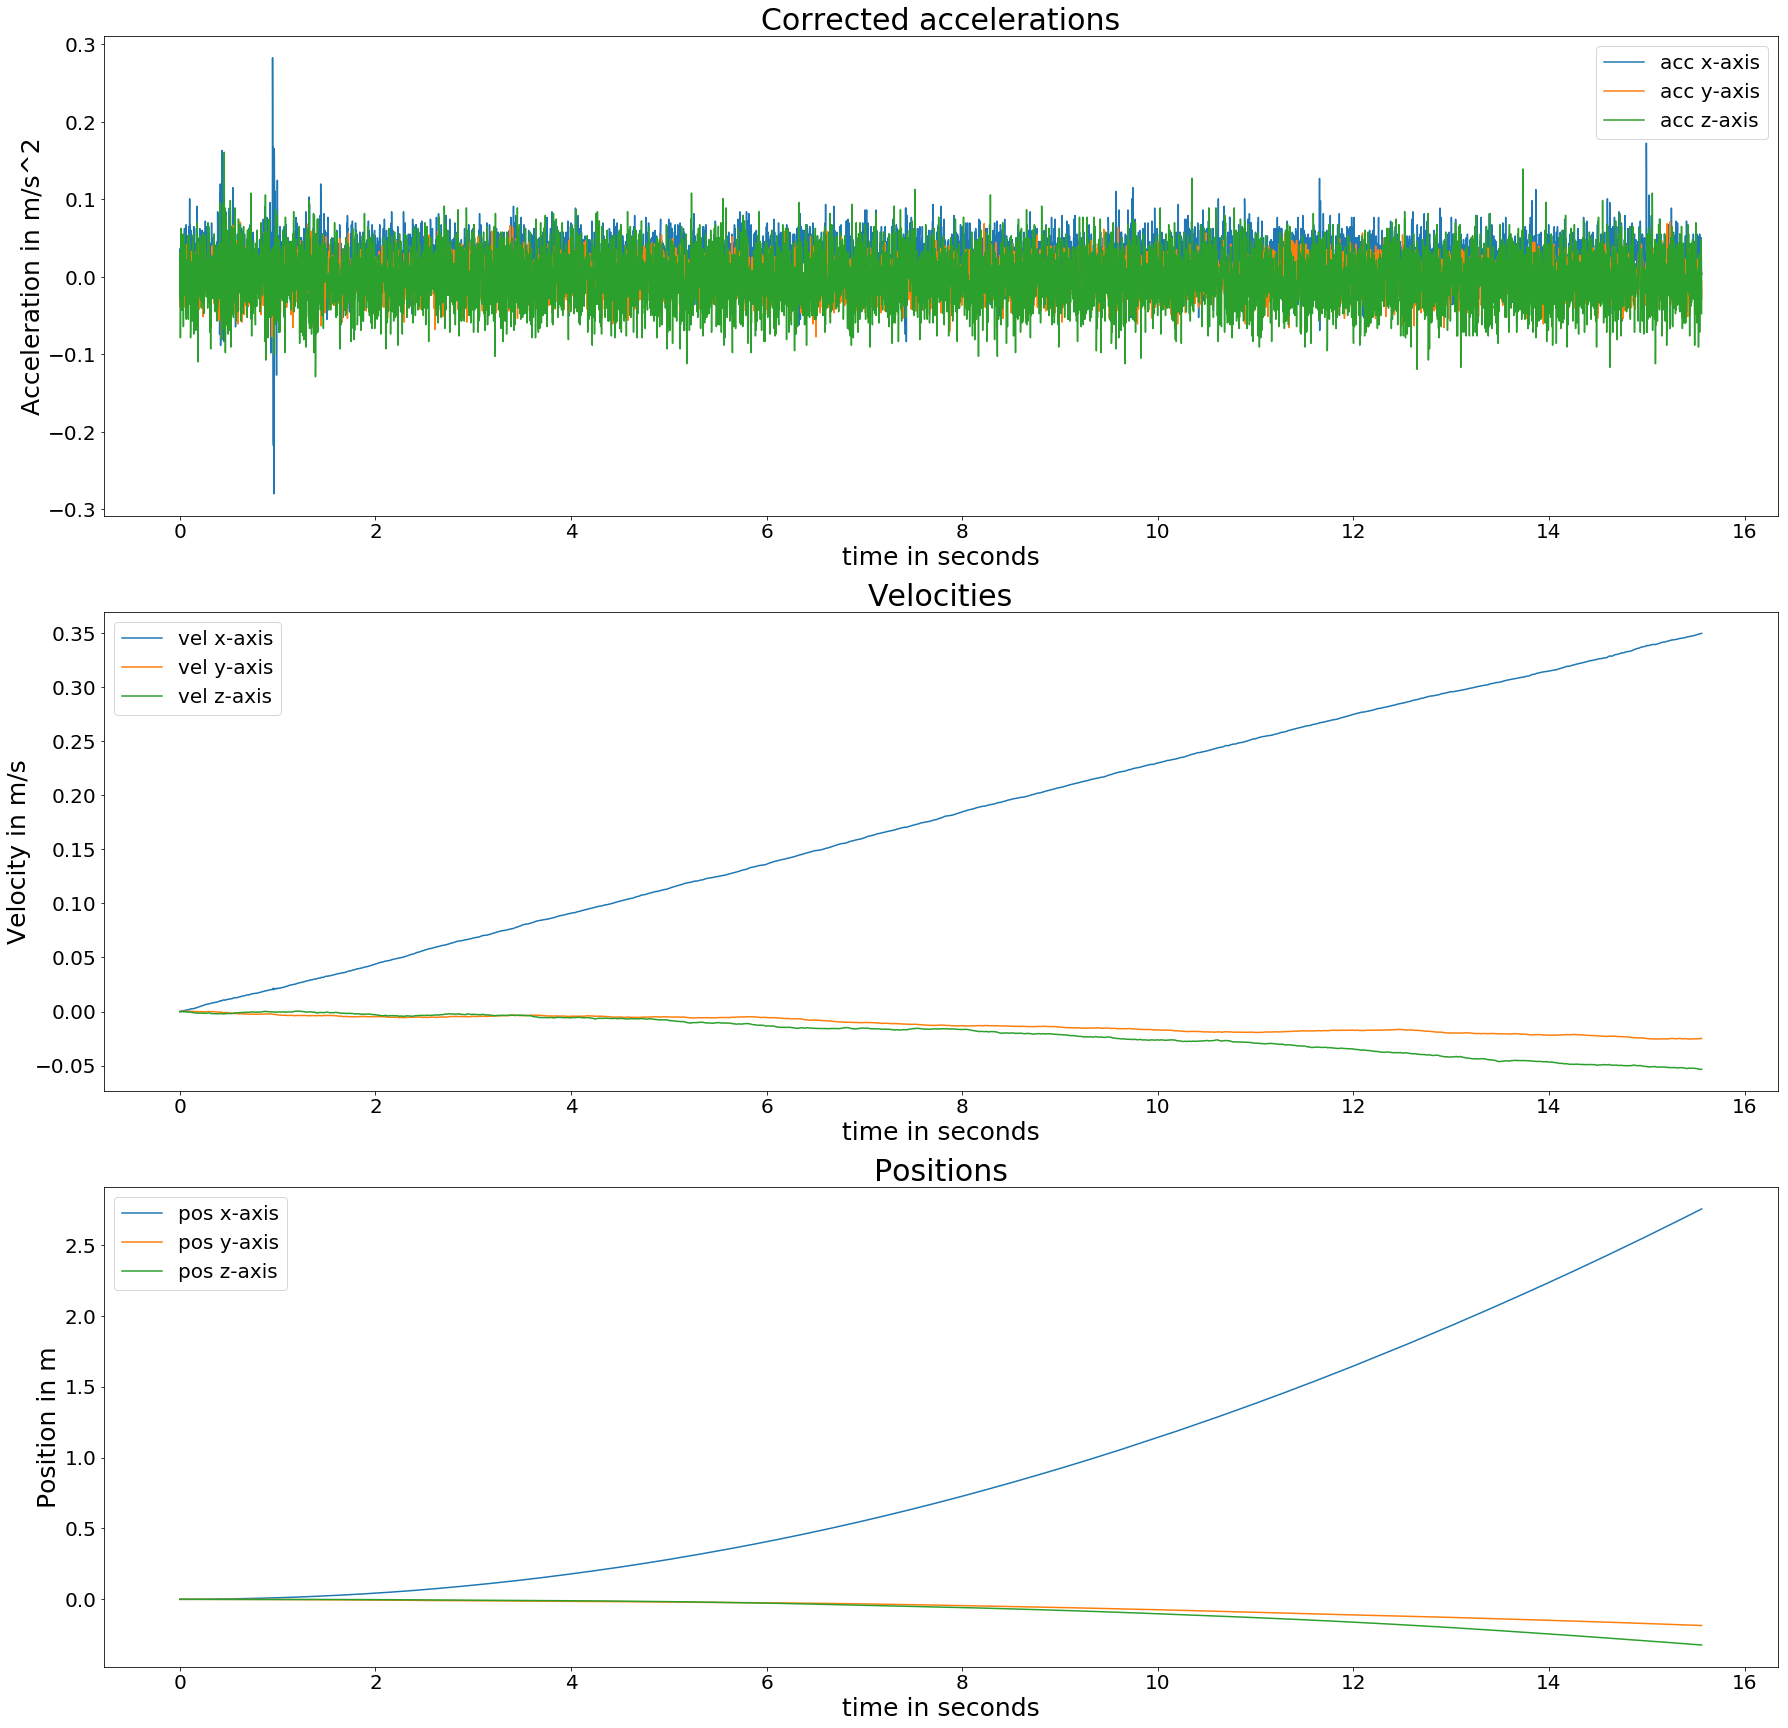

Avg. acceleration deviation: 0.023846 m/s^2
Avg. velocity deviation: 0.134164 m/s
Avg. position deviation: 1.016963 m


In [15]:
print("Plots data stationary")
for orientation in range(5):
    print()
    print("Orientation %d" % (orientation + 1))
    orientation_data = imu_data[orientation]
    avg_acc_ori = 0.0
    avg_vel_ori = 0.0
    avg_pos_ori = 0.0
    for run in range(5):
        run_dict = orientation_data[run]
        print("Run %d" % (run + 1))
        avg_acc, avg_vel, avg_pos = plot_run_data(run_dict, False)
        
        avg_acc_ori += avg_acc
        avg_vel_ori += avg_vel
        avg_pos_ori += avg_pos
        
    avg_acc_ori = avg_acc_ori/5
    print("Avg. acceleration deviation: %f m/s^2" % avg_acc_ori)
    avg_vel_ori = avg_vel_ori/5
    print("Avg. velocity deviation: %f m/s" % avg_vel_ori)
    avg_pos_ori = avg_pos_ori/5
    print("Avg. position deviation: %f m" % avg_pos_ori)